In [1]:
# mdp

import numpy as np
from utils import action_space, transition_function, probabilistic_transition_function, state_consistency_check

def mdp(env, goal, gamma = 0.99):
    """
    env is the grid enviroment
    goal is the goal state
    gamma: convergence hyperparamter
    
    output:
    G: Optimal cost-to-go
    """
    
    return G


def policy_mdp(env,V):
    """
    env is the grid enviroment
    V: optimal value function
    
    output:
    policy: a map from each state x to the greedy best action a to execcute
    """
    
    return policy


In [2]:
# utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# this are the set of possible actions admitted in this problem
action_space = []
action_space.append((-1,0))
action_space.append((0,-1))
action_space.append((1,0))
action_space.append((0,1))

def plot_enviroment(env, x, goal):
    """
    env is the grid enviroment
    x is the state 
    """
    dims = env.shape    
    current_env = np.copy(env)
    # plot agent
    current_env[x] = 1.0 #yellow
    # plot goal
    current_env[goal] = 0.3
    return current_env


def state_consistency_check(env,x):
    """Checks wether or not the proposed state is a valid state, i.e. is in colision or out of bounds"""
    # check for collision
    if x[0] < 0 or x[1] < 0 or x[0] >= env.shape[0] or x[1] >= env.shape[1] :
        #print('out of bonds')
        return False
    if env[x] >= 1.0-1e-4:
        #print('Obstacle')
        return False
    return True


def transition_function(env,x,u):
    """Transition function for states in this problem
    x: current state, this is a tuple (i,j)
    u: current action, this is a tuple (i,j)
    env: enviroment
    
    Output:
    new state
    True if correctly propagated
    False if this action can't be executed
    """
    xnew = np.array(x) + np.array(u)
    xnew = tuple(xnew)
    #print('xnew',xnew)
    if state_consistency_check(env,xnew):
        return xnew, True
    return x, False


def probabilistic_transition_function(env,x,u, epsilon = 0.6):
    """Probabilistic Transition function requires:
    x: current state, this is a tuple (i,j)
    u: current action, this is a tuple (i,j)
    env: enviroment
    epsilon (in [0,1]): This is the probability of carrying out the desired action, in the extreme, 1 indicates a perfect action execution.
    
    Output:
    state_propagated_list: list of propagated states
    prob_list: list of the corresponding state's prob, in the same order
    """
    state_propagated_list = []
    prob_list = []
    for action in action_space:
        xnew = np.array(x) + np.array(action)
        xnew = tuple(xnew)
        prob = (1-epsilon)/3
        if action == u:
            prob = epsilon
        state_propagated_list.append(xnew)
        prob_list.append(prob)
    # There is no state consistency, it should be done externally when asigning the reward
    return state_propagated_list, prob_list

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
action_space = []
action_space.append((-1,0))
action_space.append((0,-1))
action_space.append((1,0))
action_space.append((0,1))

# Task 1

## Subtask 1 A

In [5]:
action_dict = {}
for i in range(len(action_space)):
    action_dict[i] = action_space[i]
print("Enumeration of the action list looks like that:", action_dict)

Enumeration of the action list looks like that: {0: (-1, 0), 1: (0, -1), 2: (1, 0), 3: (0, 1)}


## Subtask 1 B

$$G^*_k(x) = \min_{u_k} \{l(x_k, u_k) + G^*_{k+1}(x_{k+1}) \}$$, where
$$x_{k+1} = f (x_k, u_k)$$

Convergence comes with:
$$G^*_{i-1}(x)=G^X_i(x), \forall x \in X$$

## Subtask 1 C

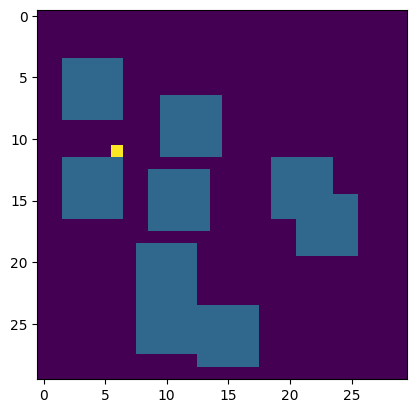

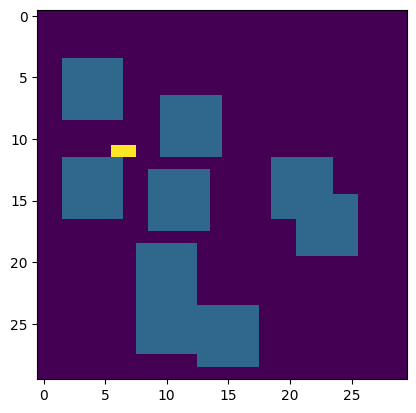

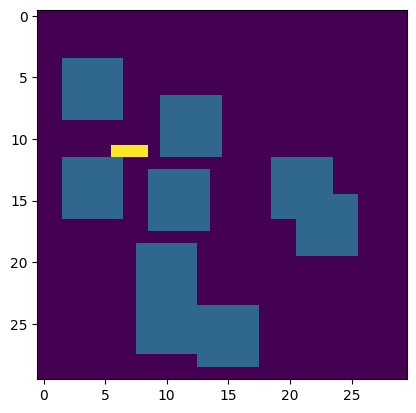

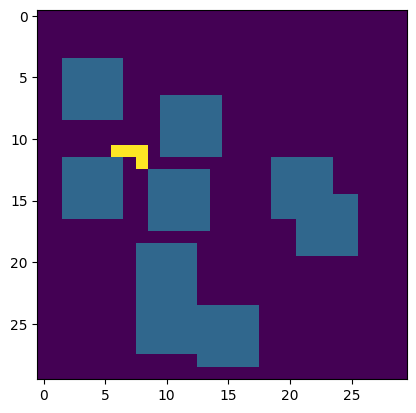

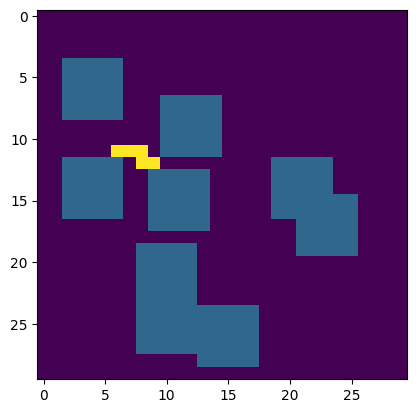

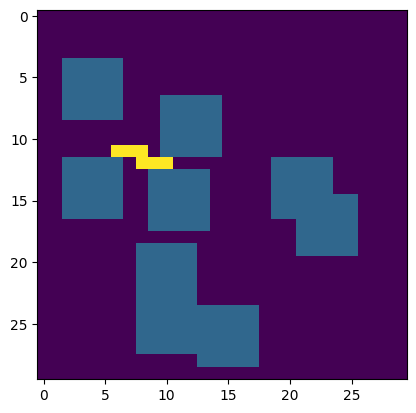

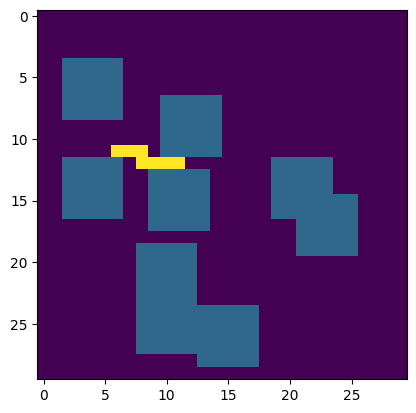

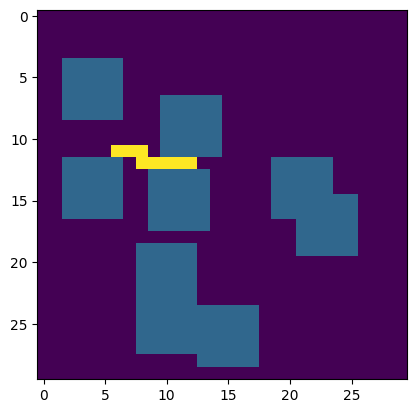

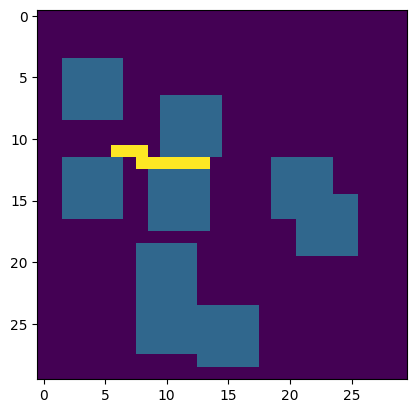

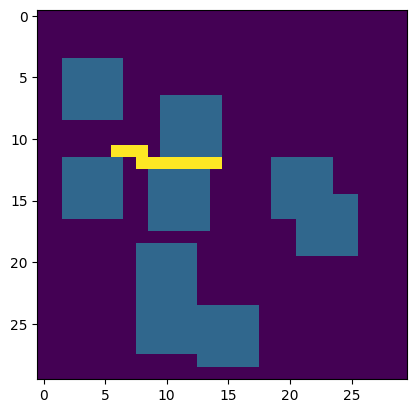

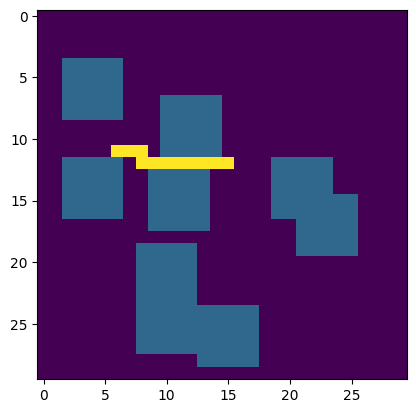

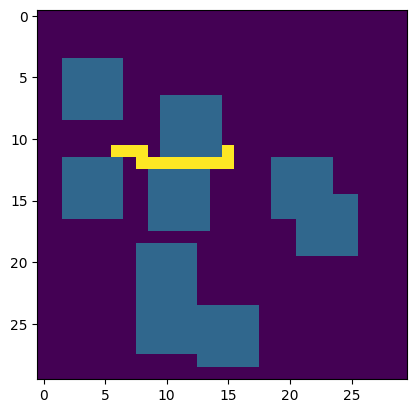

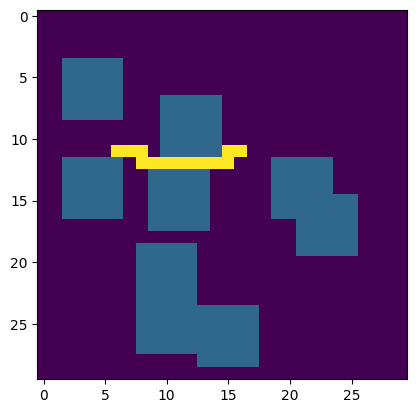

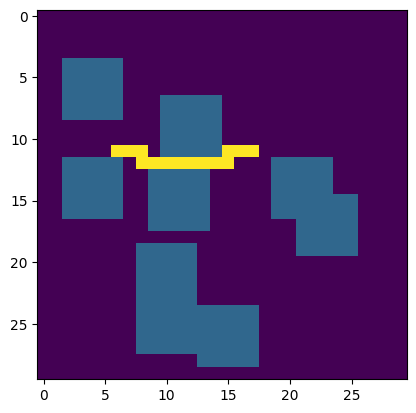

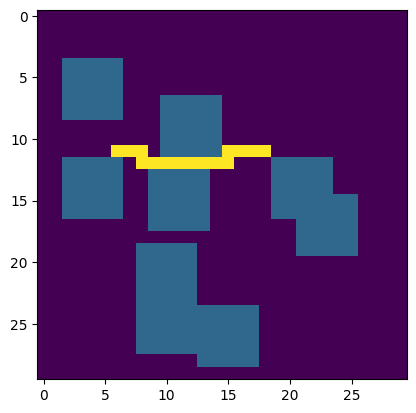

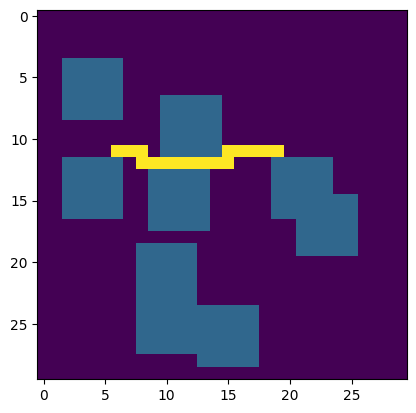

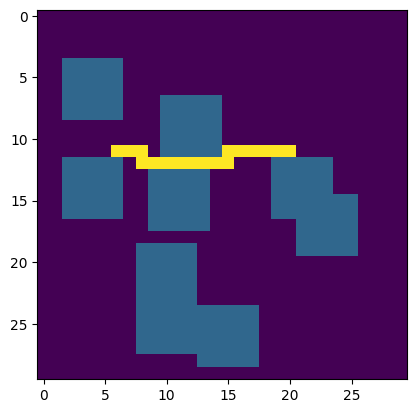

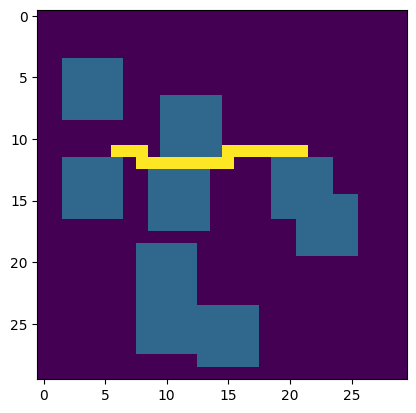

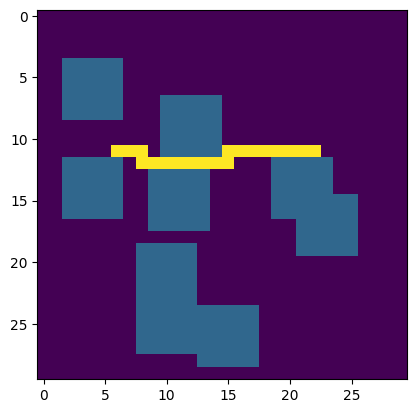

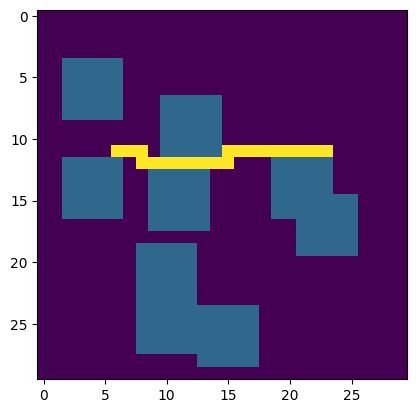

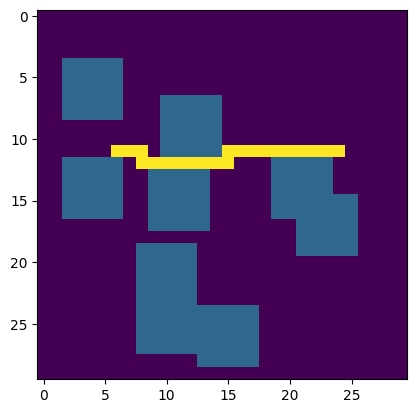

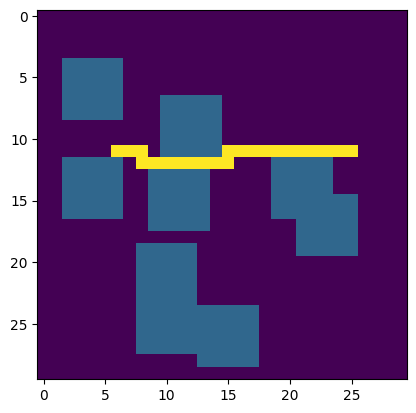

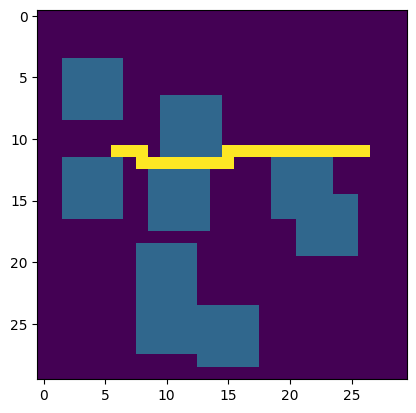

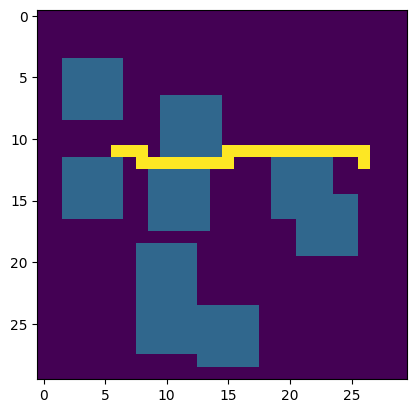

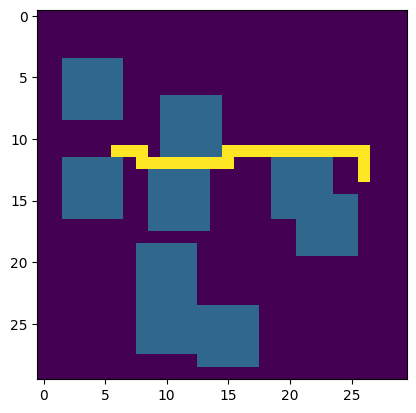

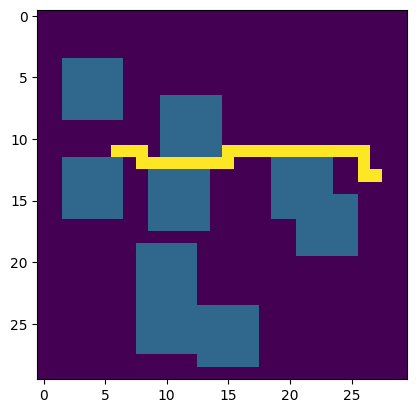

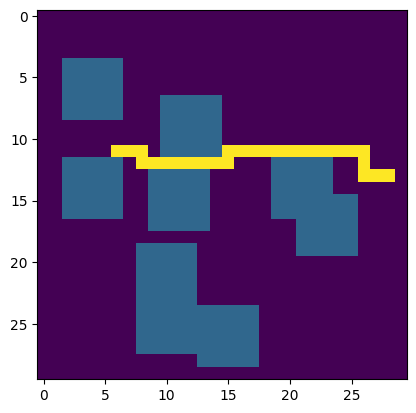

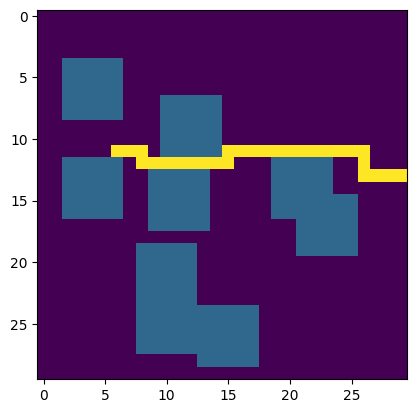

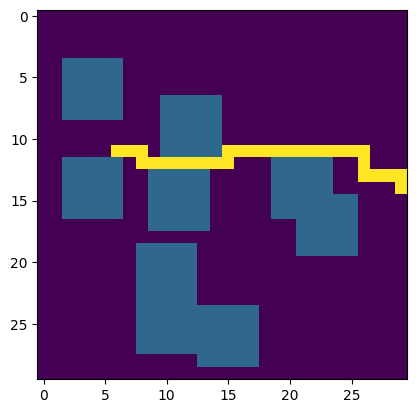

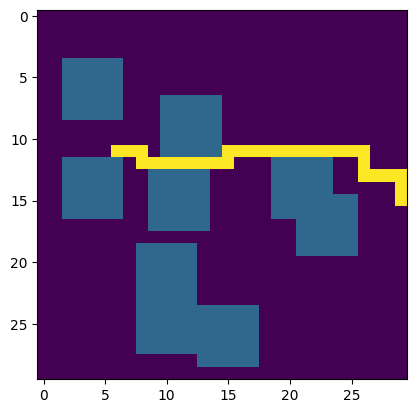

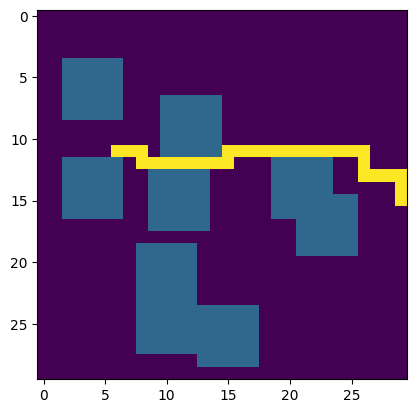

In [6]:
def VI(env, x_I, x_G, f, k):
    
    states_dict = {0: "up", 1: "left", 2: "down", 3: "right"}
    
    df = pd.DataFrame(columns=["Coordinate", "Policy"])
    
    while True:
    
        if f:
            count = 0
            
            d = {x_G: (x_G, 0)}
            new_d = d.copy()
            G = [(x_G, (x_G, 0))]
            G_old = []
            
            maps = env.copy()
            np.place(maps, maps < 1, np.inf)
            maps[list(x_G)[0]][list(x_G)[1]] = 0
            
            f = False
        
        else:
            k += 1
            new_d = dict(set(d.items()) ^ set(new_d.items())) # states for the next iteration
            
        if G_old == G: # convergence criterion
            return maps, df, returning(x_ini, goal, d)
        
        G_old = G.copy()
        
        for x_curr in new_d:
            
            for u_curr in action_space:
        
                x_new, T = transition_function(env, x_curr, u_curr)
                
                if T and x_new not in d and maps[x_new[0]][x_new[1]] != 0:
                    G.append((x_new, (x_curr, k)))
                    d[x_new] = (x_curr, k)
                    maps[x_new[0]][x_new[1]] = k + 1 # +1 because obstacles are already ==1
                    
                    
                    #df = criterion(u_curr, states_dict, df)
    
    return -1, -1, -1


def returning(x_ini, goal, G):
    s = x_ini # the first key
    r = G[s][0] # the first value
    t = []
    cost = 0
    
    while True:
        for key, val in G.items():
            if s == goal:
                t.append(r)
                return t
            cost += 1
            t.append(s)
            s = r
            r = G[s][0]

            
def final_env(environment, p):
    for i in p:
        final_map[i[0]][i[1]] = 3
        plt.imshow(final_map)
        plt.show()
    return final_map



data = np.load('data_ps3.npz')
environment = data['environment']

x_ini = (11,6)
goal = (15,29)

f = True
l = 1

new_maps, df, G = VI(environment, x_ini, goal, f, l)   

final_map = environment.copy()
final_plan = final_env(final_map, G)
    
plt.imshow(final_plan)

## Subtask 1 D

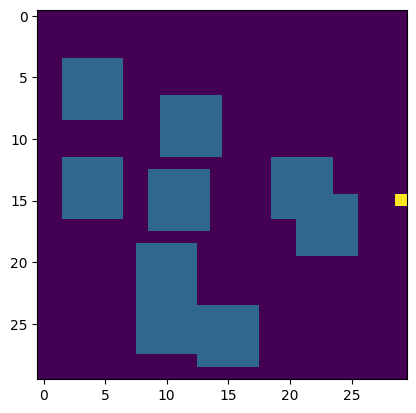

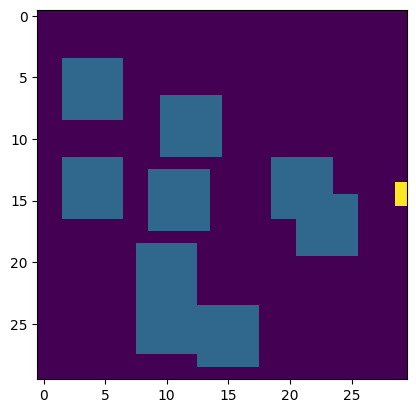

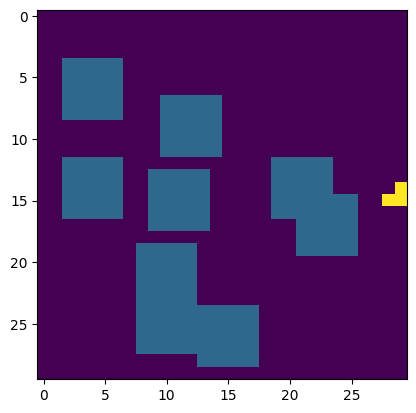

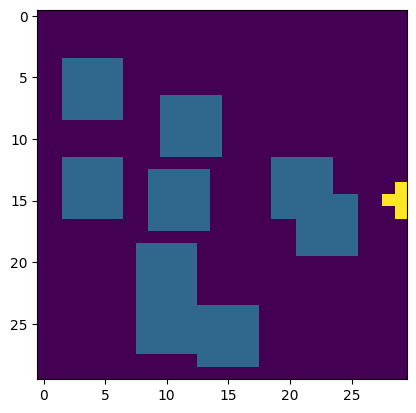

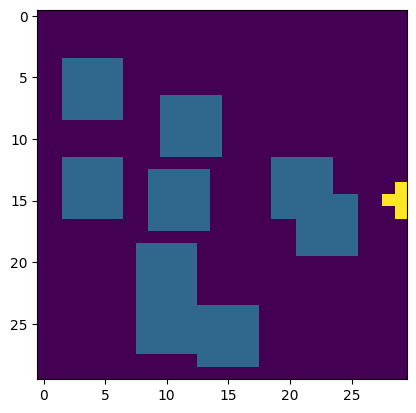

In [7]:
def VI(env, x_I, x_G, f, k):
    
    states_dict = {0: "up", 1: "left", 2: "down", 3: "right"}
    
    df = pd.DataFrame(columns=["Coordinate", "Policy"])
    
    for _ in range(1):
    
        if f:
            count = 0
            
            d = {x_G: (x_G, 0)}
            new_d = d.copy()
            G = [(x_G, (x_G, 0))]
            G_old = []
            
            maps = env.copy()
            np.place(maps, maps < 1, np.inf)
            maps[list(x_G)[0]][list(x_G)[1]] = 0
            
            f = False
        
        else:
            k += 1
            new_d = dict(set(d.items()) ^ set(new_d.items())) # states for the next iteration
            
        if G_old == G: # convergence criterion
            return maps, df, returning(x_ini, goal, d)
        
        G_old = G.copy()
        
        for x_curr in new_d:
            
            for u_curr in action_space:
        
                x_new, T = transition_function(env, x_curr, u_curr)
                
                if T and x_new not in d and maps[x_new[0]][x_new[1]] != 0:
                    G.append((x_new, (x_curr, k)))
                    d[x_new] = (x_curr, k)
                    maps[x_new[0]][x_new[1]] = k + 1 # +1 because obstacles are already ==1
                    
                    
                    #df = criterion(u_curr, states_dict, df)
    
    return maps, df, returning(x_ini, goal, d)


def returning(x_ini, goal, G):
    s = x_ini # the first key
    if s in G:
        r = G[s][0] # the first value
        t = []
        cost = 0
    
        while True:
            for key, val in G.items():
                if s == goal:
                    t.append(r)
                    return t
                cost += 1
                t.append(s)
                s = r
                r = G[s][0]
    else:
        return list(G)

            
def final_env(environment, p):
    for i in p:
        final_map[i[0]][i[1]] = 3
        plt.imshow(final_map)
        plt.show()
    return final_map



data = np.load('data_ps3.npz')
environment = data['environment']

x_ini = (11,6)
goal = (15,29)

f = True
l = 1

new_maps, df, G = VI(environment, x_ini, goal, f, l)   

final_map = environment.copy()
final_plan = final_env(final_map, G)
    
plt.imshow(final_plan)

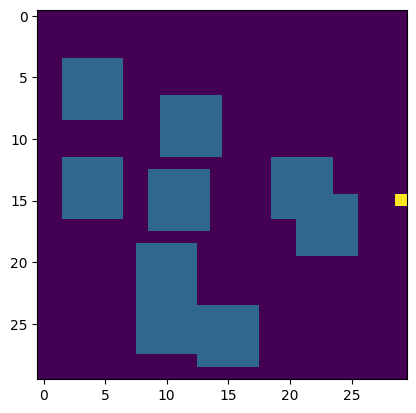

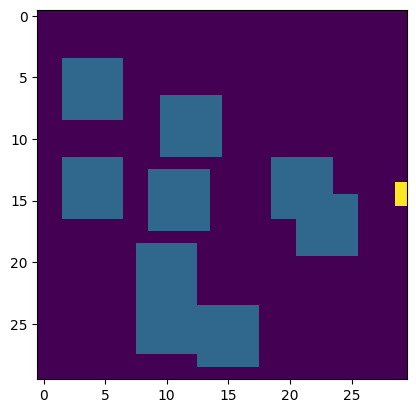

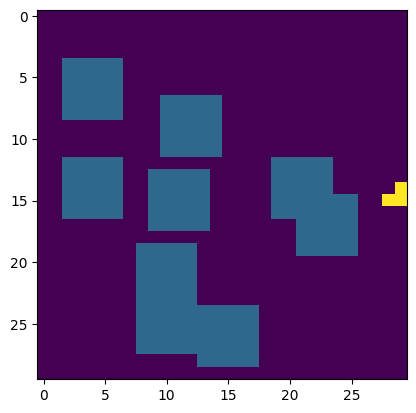

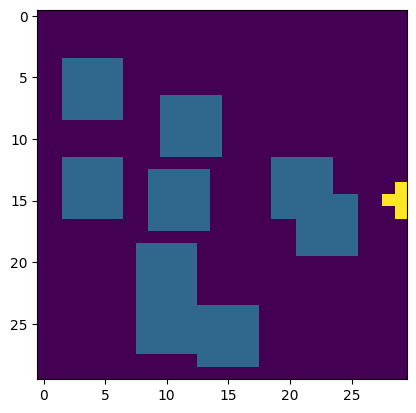

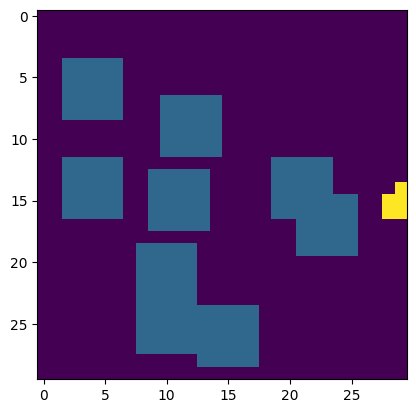

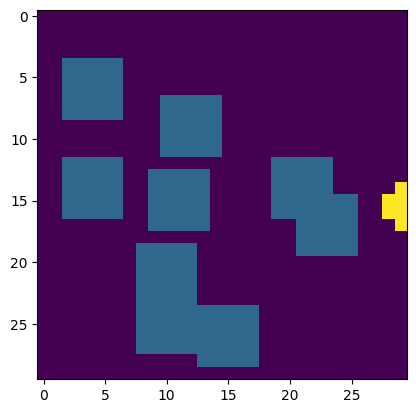

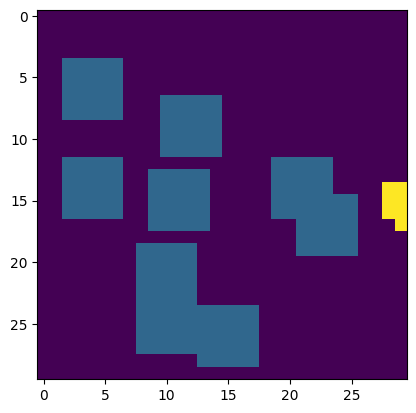

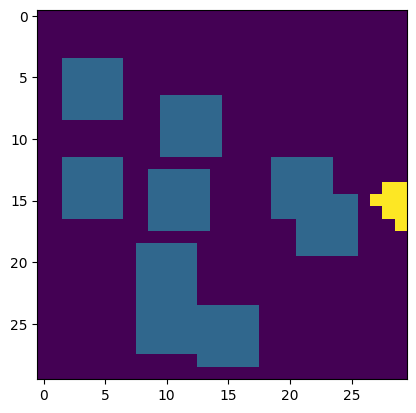

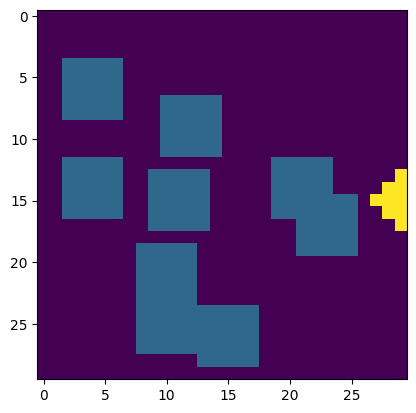

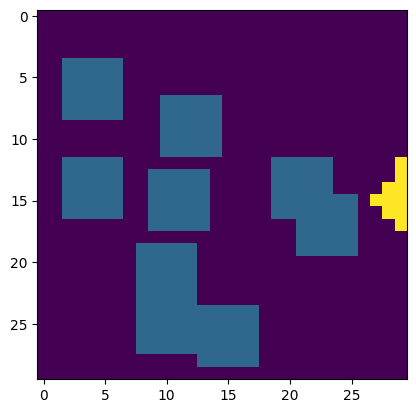

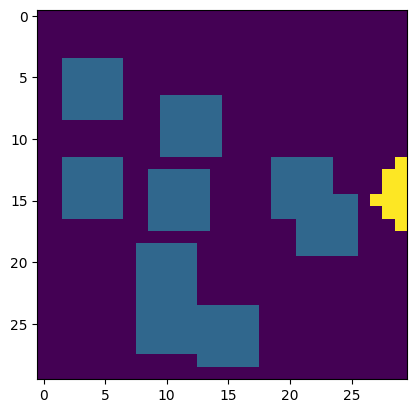

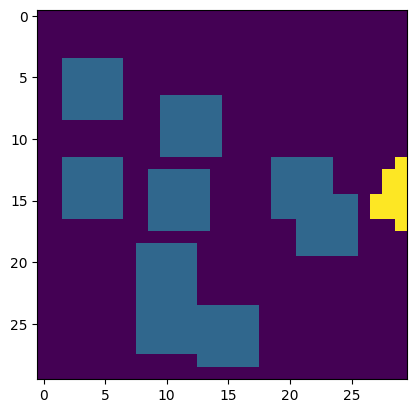

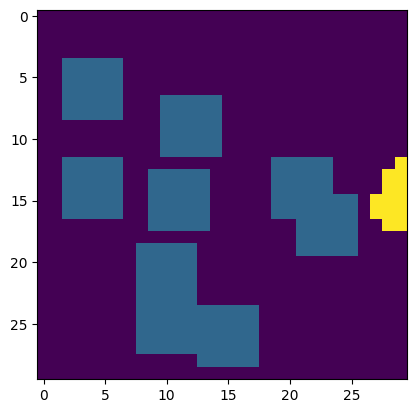

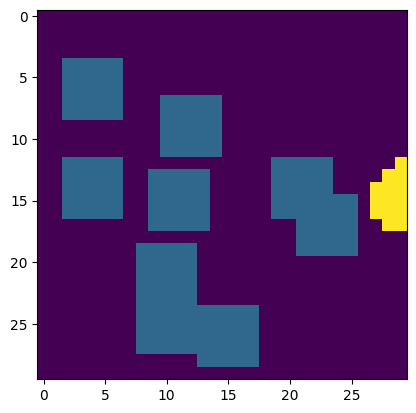

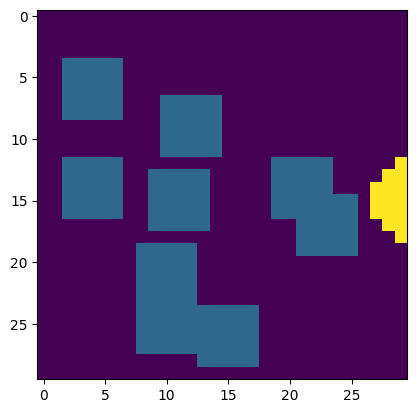

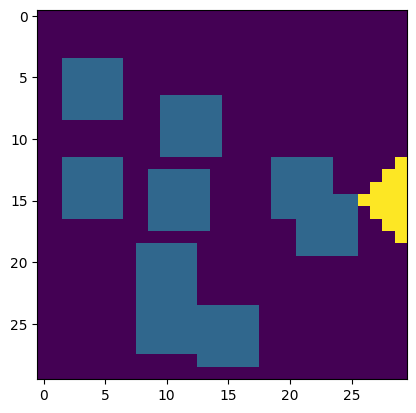

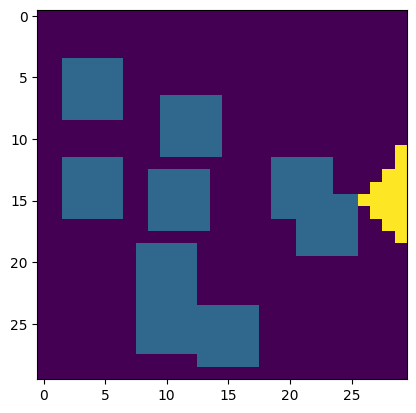

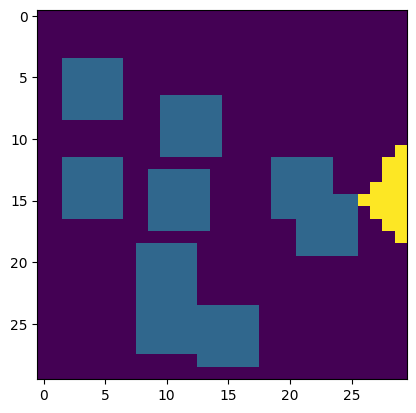

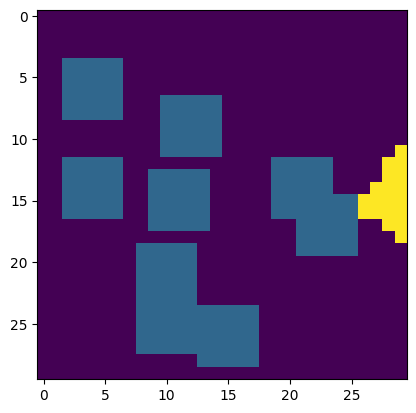

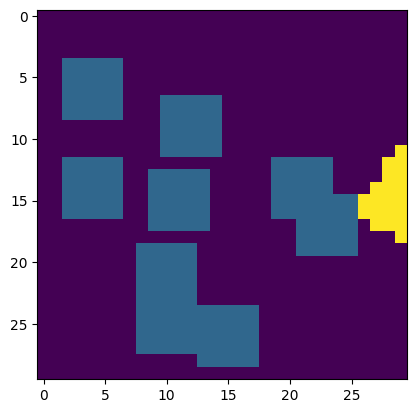

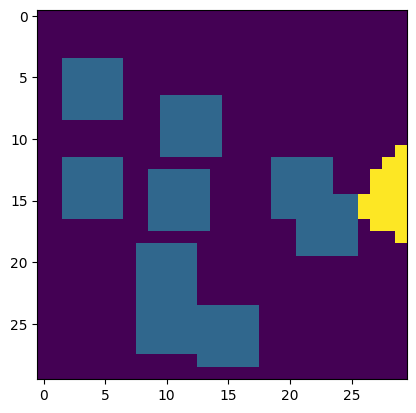

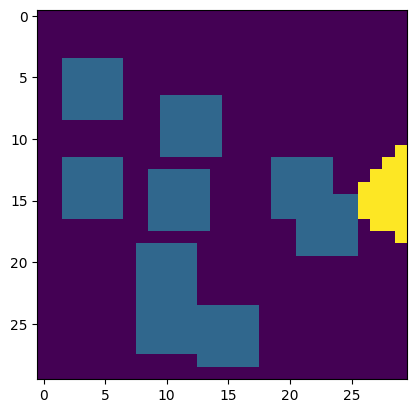

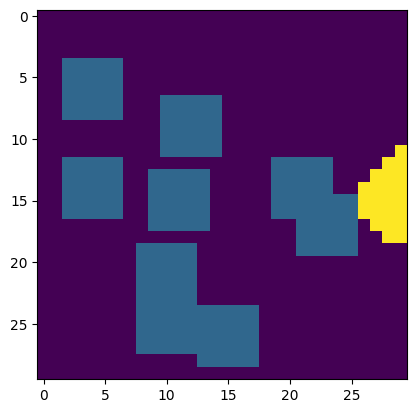

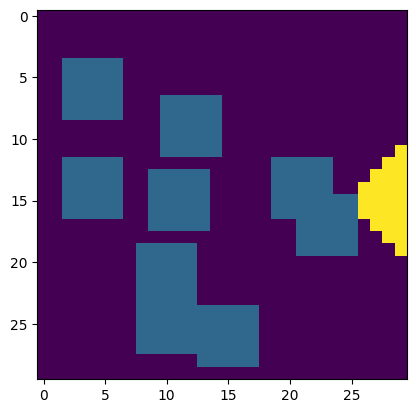

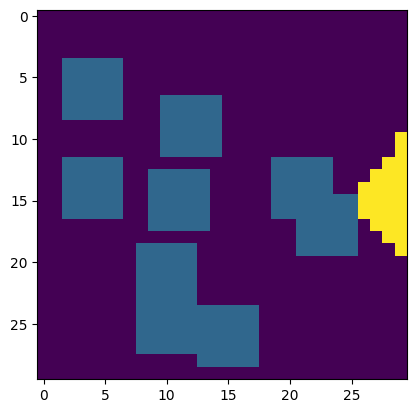

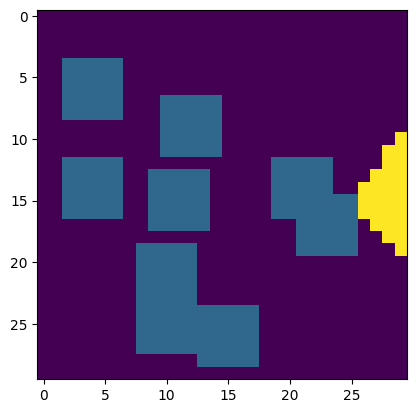

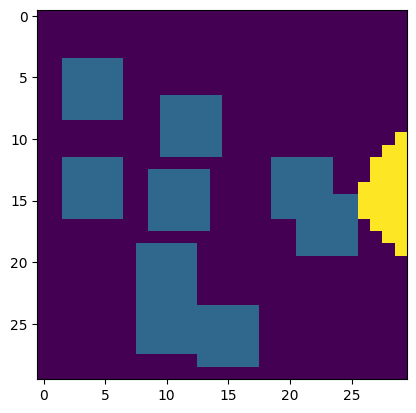

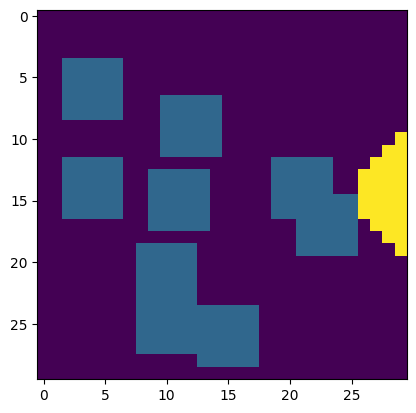

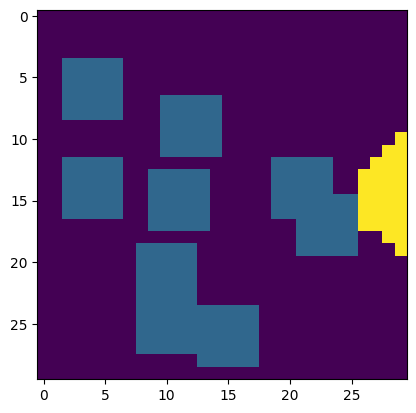

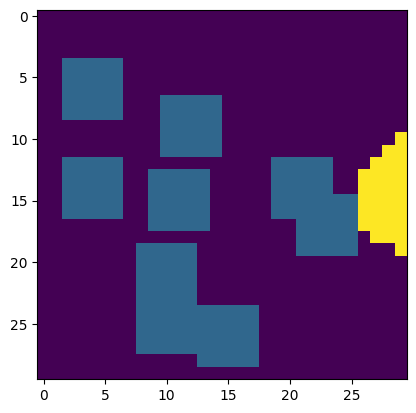

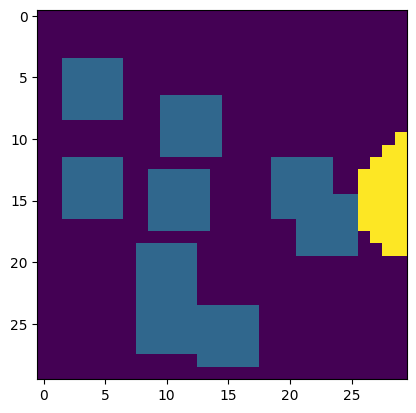

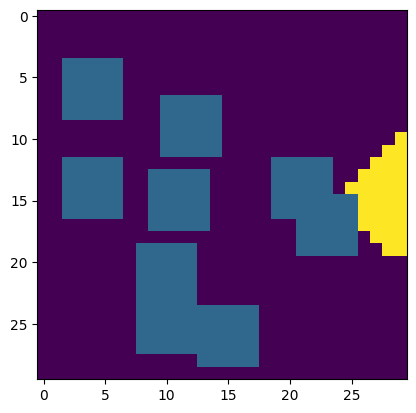

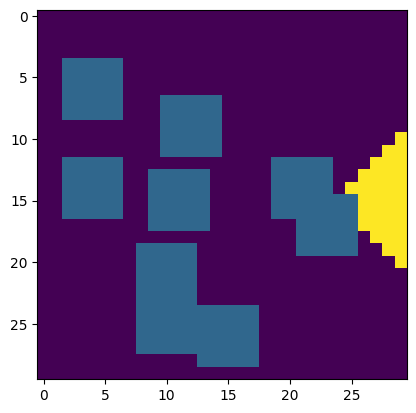

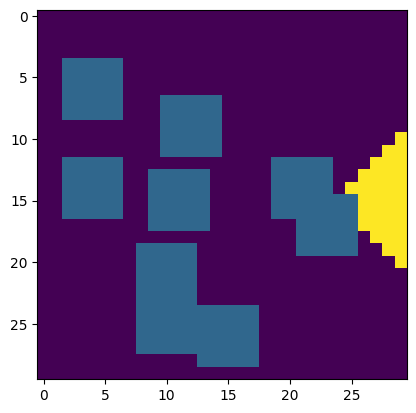

In [8]:
def VI(env, x_I, x_G, f, k):
    
    states_dict = {0: "up", 1: "left", 2: "down", 3: "right"}
    
    df = pd.DataFrame(columns=["Coordinate", "Policy"])
    
    for _ in range(5):
    
        if f:
            count = 0
            
            d = {x_G: (x_G, 0)}
            new_d = d.copy()
            G = [(x_G, (x_G, 0))]
            G_old = []
            
            maps = env.copy()
            np.place(maps, maps < 1, np.inf)
            maps[list(x_G)[0]][list(x_G)[1]] = 0
            
            f = False
        
        else:
            k += 1
            new_d = dict(set(d.items()) ^ set(new_d.items())) # states for the next iteration
            
        if G_old == G: # convergence criterion
            return maps, df, returning(x_ini, goal, d)
        
        G_old = G.copy()
        
        for x_curr in new_d:
            
            for u_curr in action_space:
        
                x_new, T = transition_function(env, x_curr, u_curr)
                
                if T and x_new not in d and maps[x_new[0]][x_new[1]] != 0:
                    G.append((x_new, (x_curr, k)))
                    d[x_new] = (x_curr, k)
                    maps[x_new[0]][x_new[1]] = k + 1 # +1 because obstacles are already ==1
                    
                    
                    #df = criterion(u_curr, states_dict, df)
    
    return maps, df, returning(x_ini, goal, d)


def returning(x_ini, goal, G):
    s = x_ini # the first key
    if s in G:
        r = G[s][0] # the first value
        t = []
        cost = 0
    
        while True:
            for key, val in G.items():
                if s == goal:
                    t.append(r)
                    return t
                cost += 1
                t.append(s)
                s = r
                r = G[s][0]
    else:
        return list(G)

            
def final_env(environment, p):
    for i in p:
        final_map[i[0]][i[1]] = 3
        plt.imshow(final_map)
        plt.show()
    return final_map



data = np.load('data_ps3.npz')
environment = data['environment']

x_ini = (11,6)
goal = (15,29)

f = True
l = 1

new_maps, df, G = VI(environment, x_ini, goal, f, l)   

final_map = environment.copy()
final_plan = final_env(final_map, G)
    
plt.imshow(final_plan)

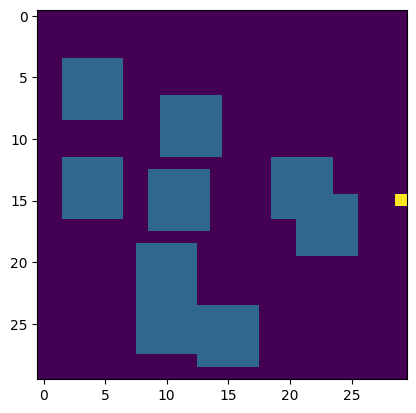

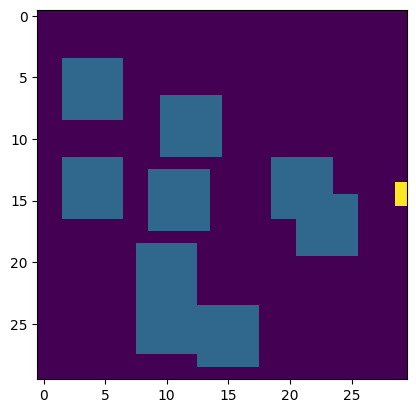

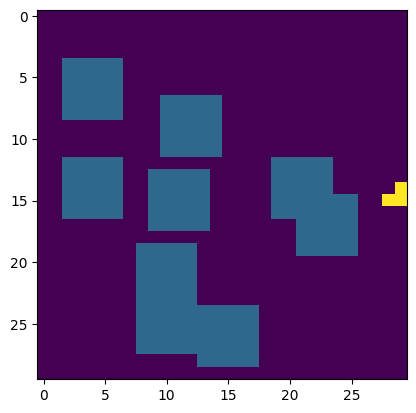

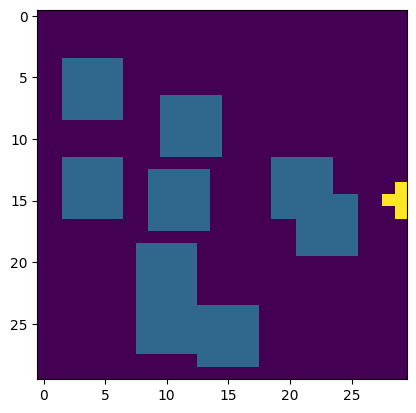

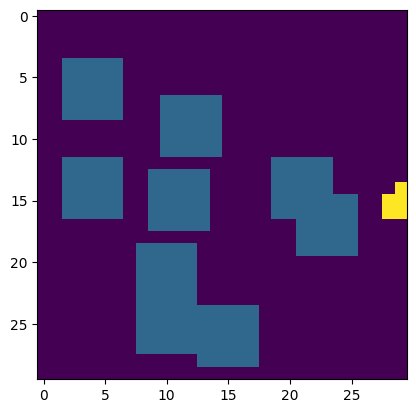

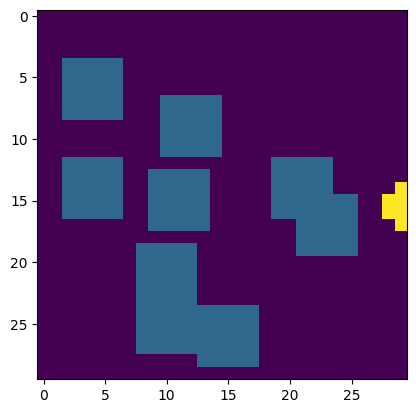

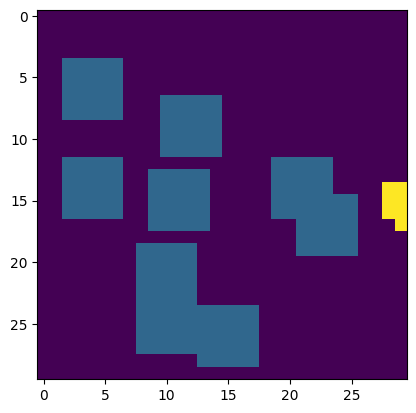

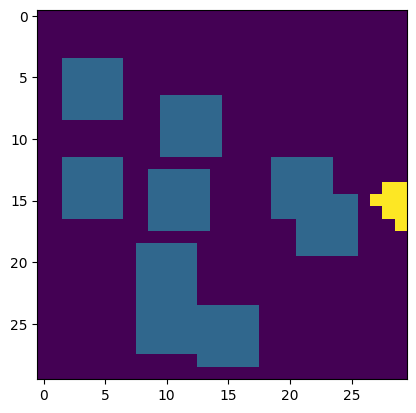

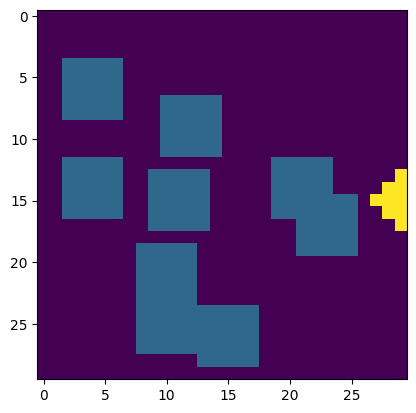

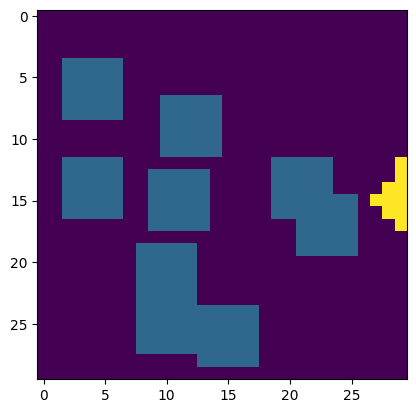

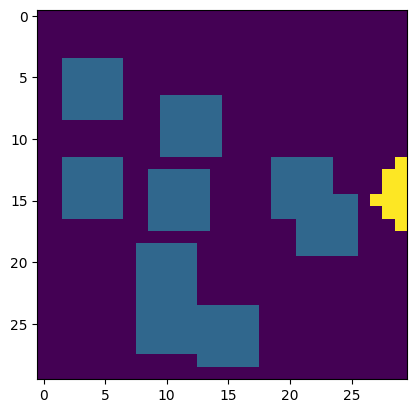

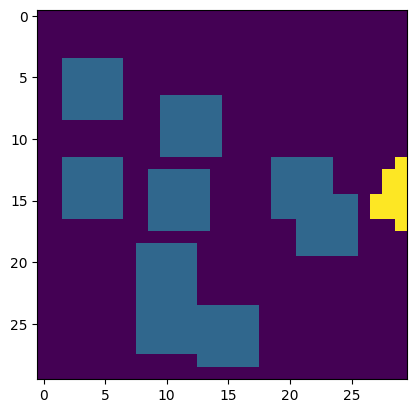

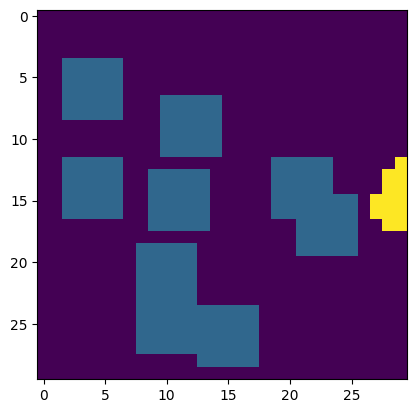

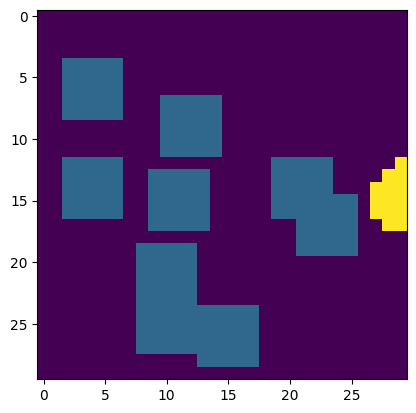

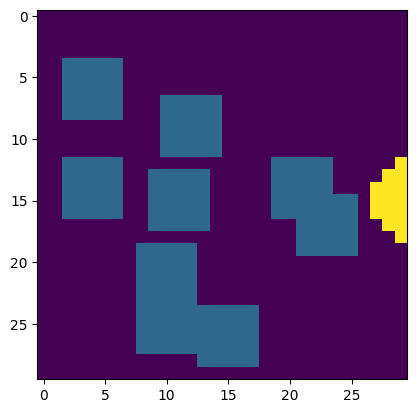

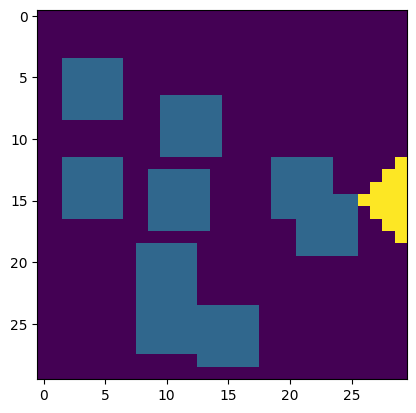

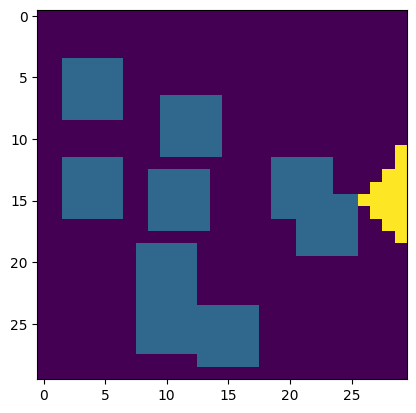

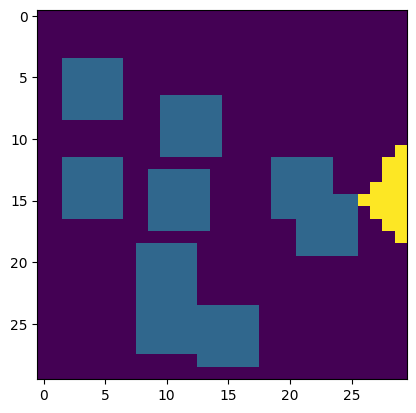

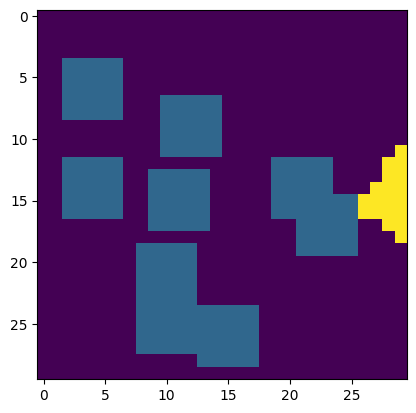

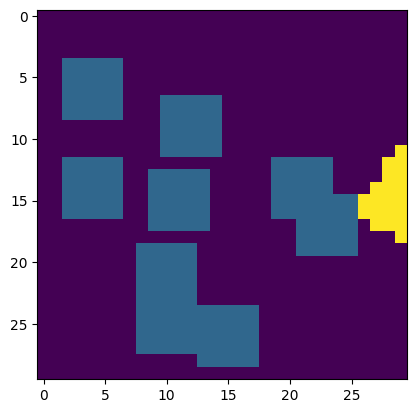

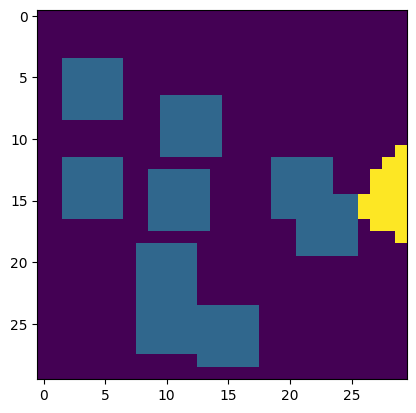

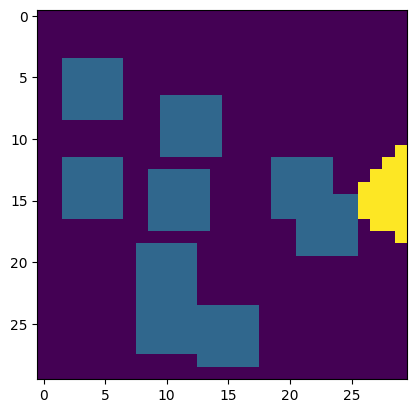

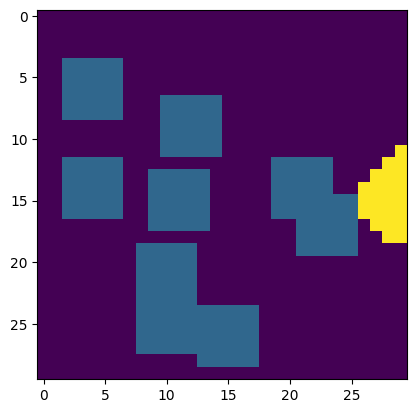

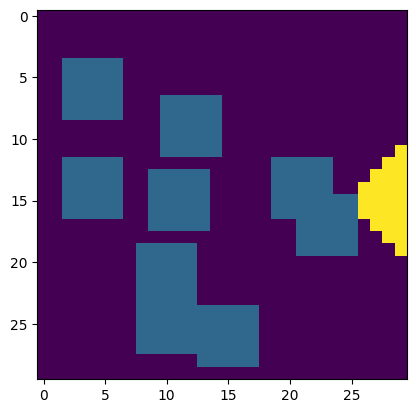

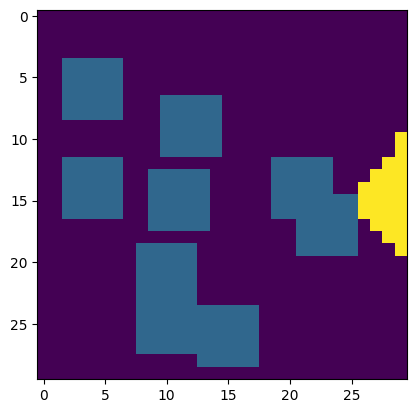

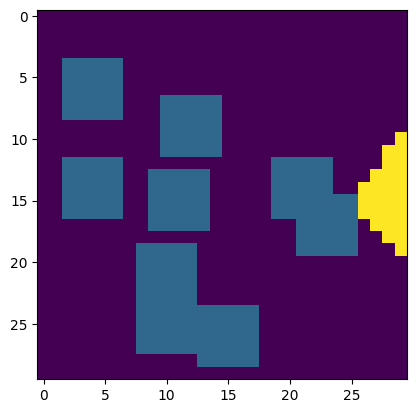

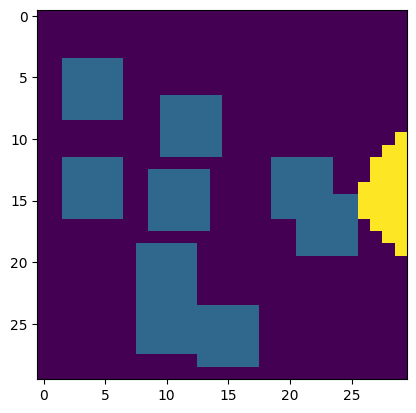

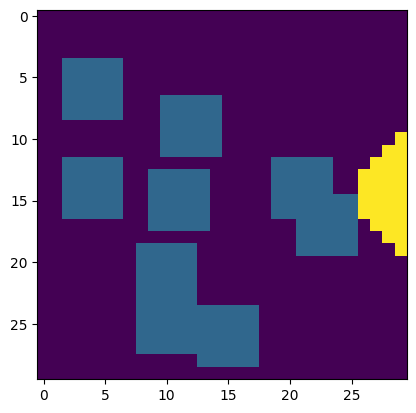

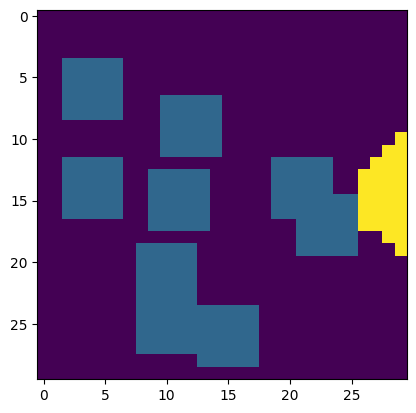

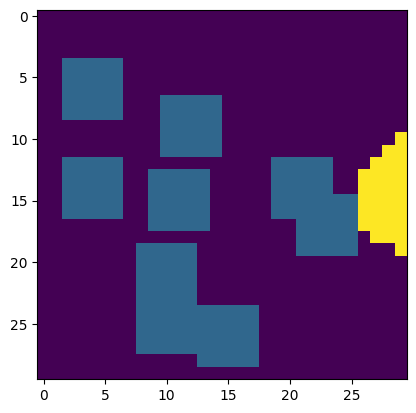

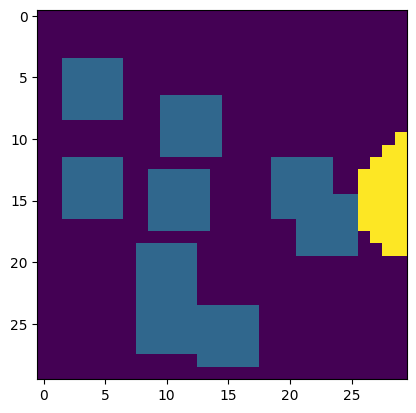

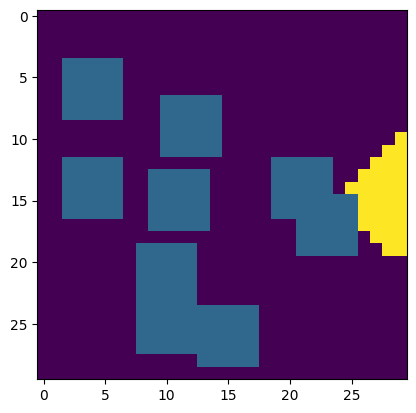

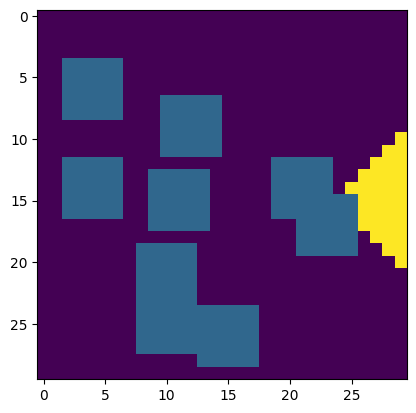

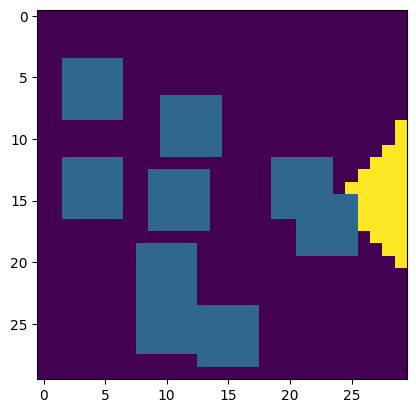

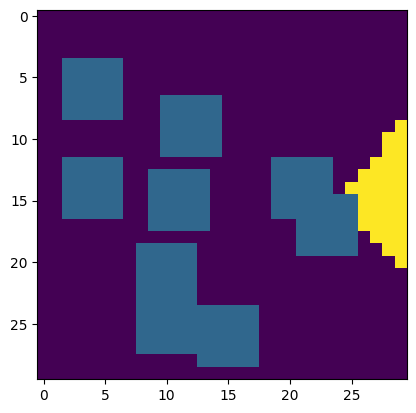

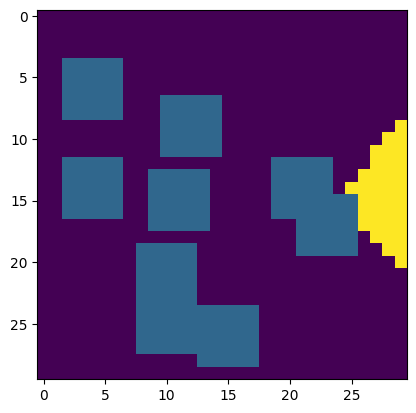

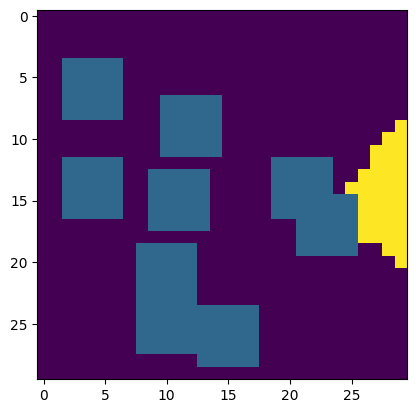

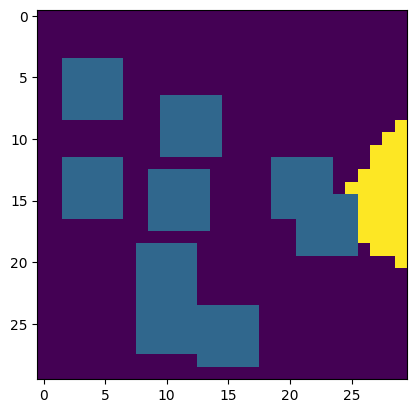

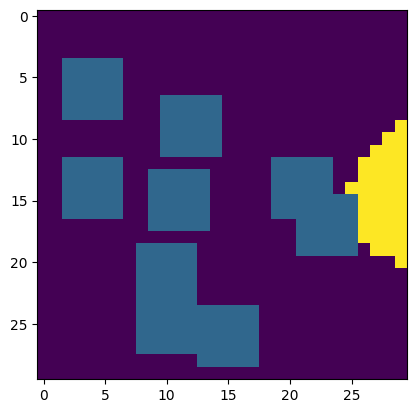

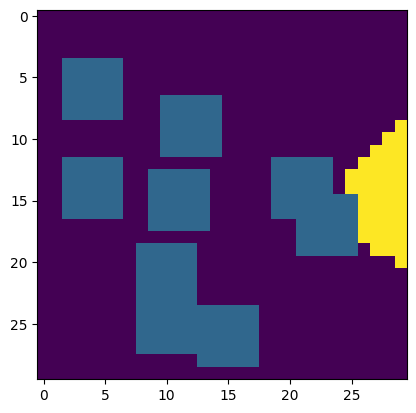

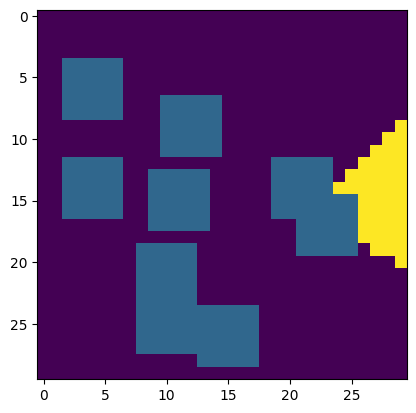

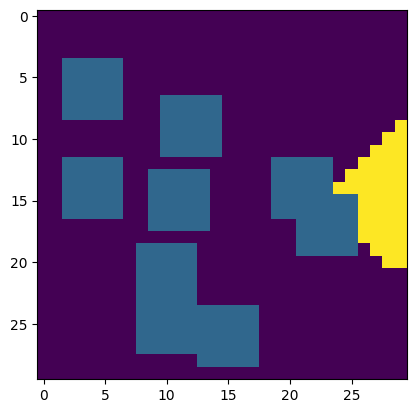

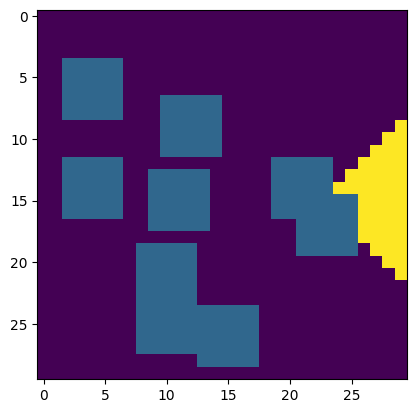

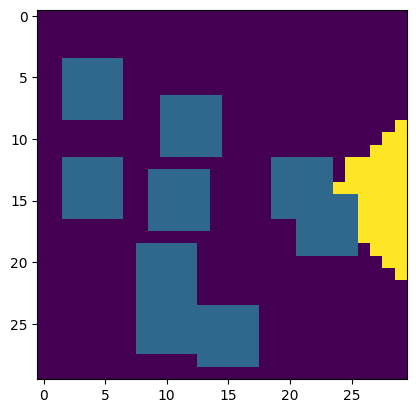

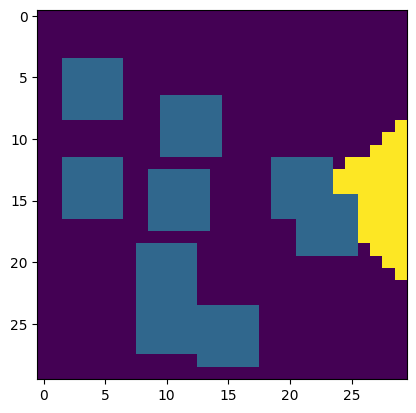

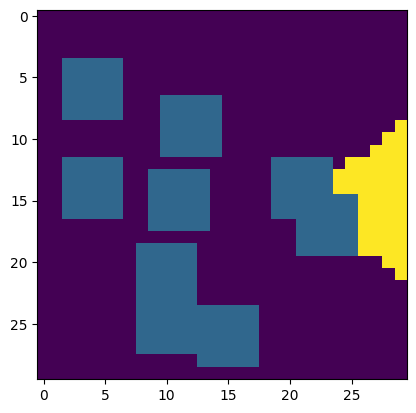

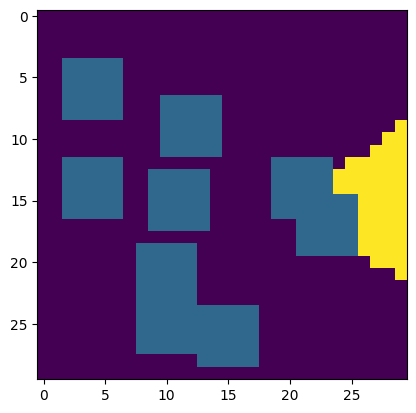

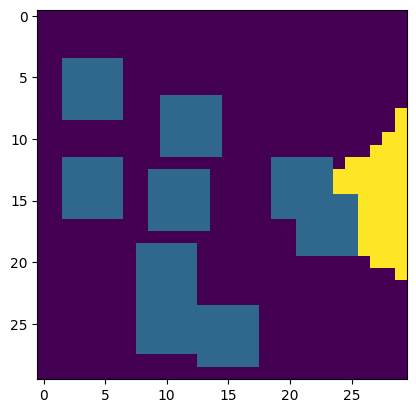

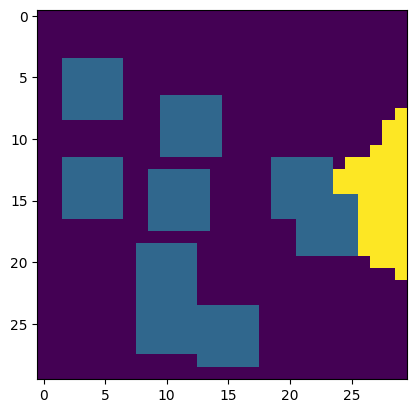

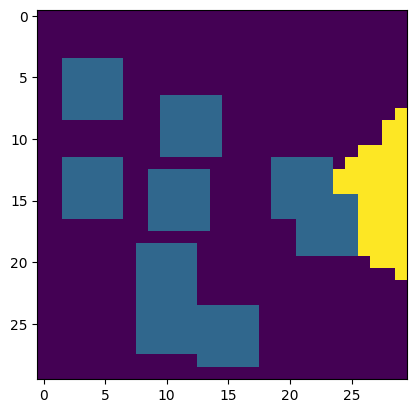

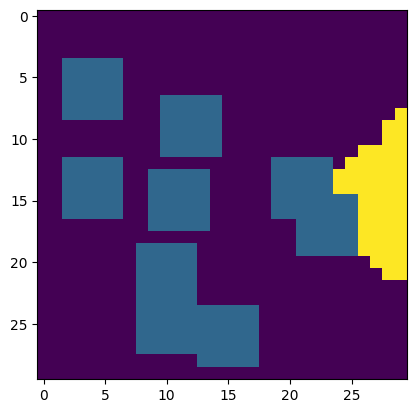

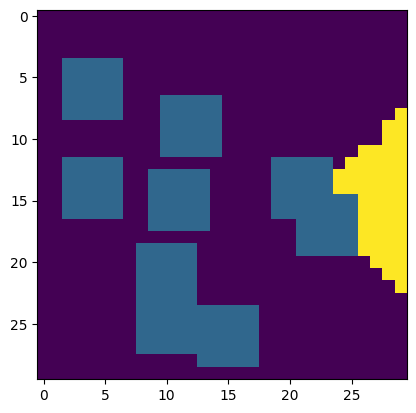

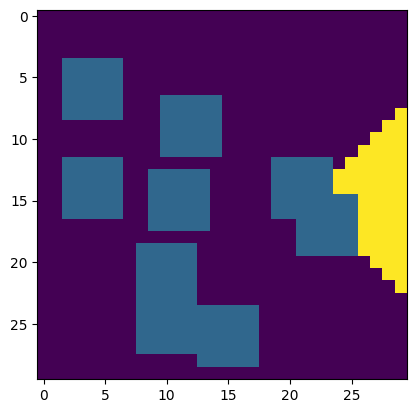

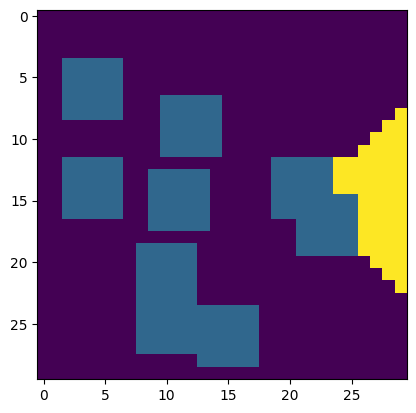

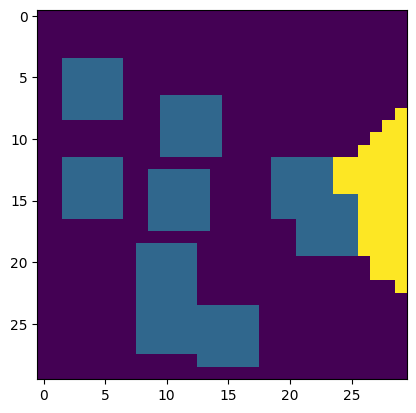

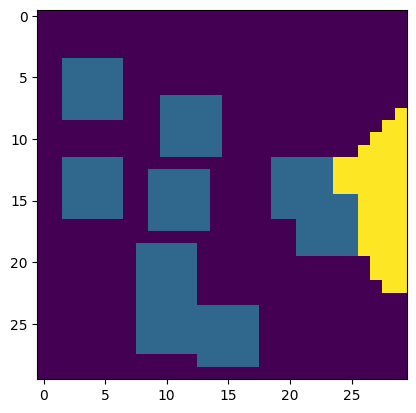

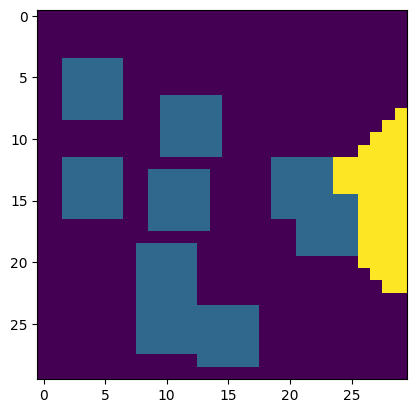

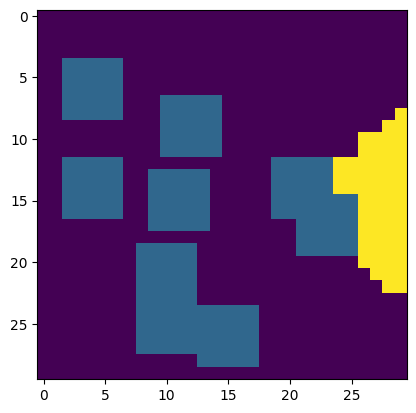

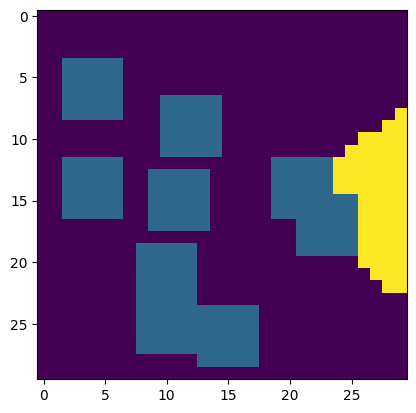

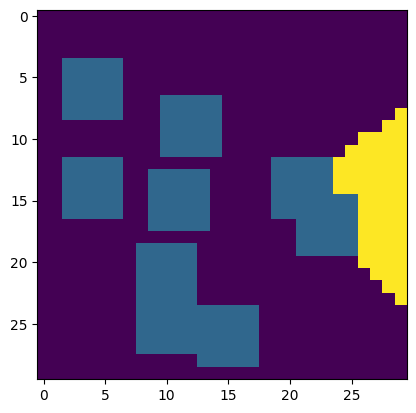

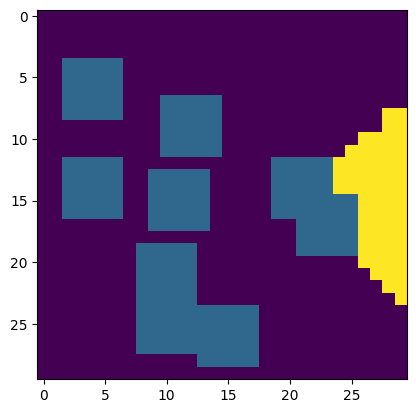

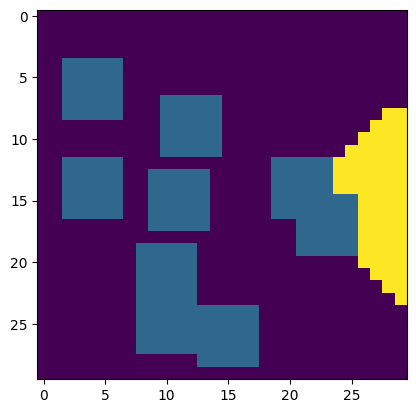

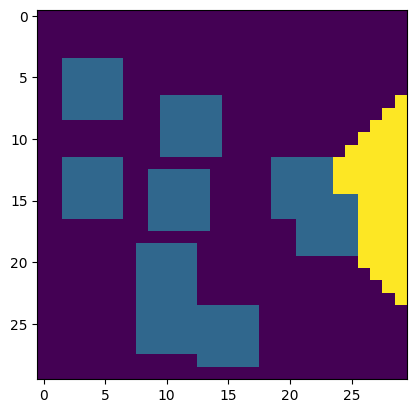

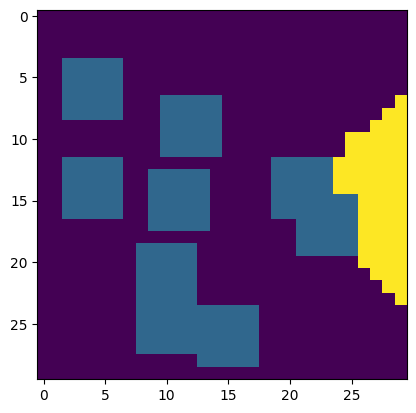

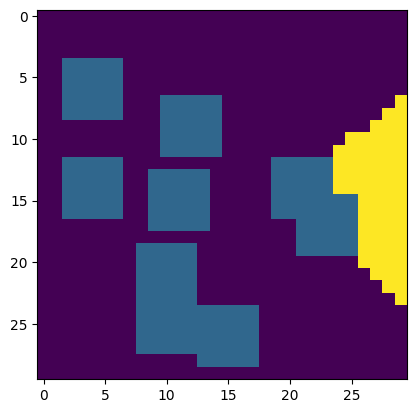

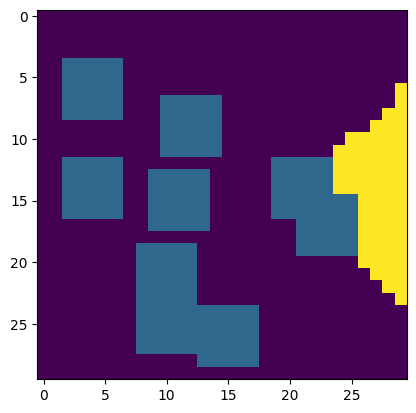

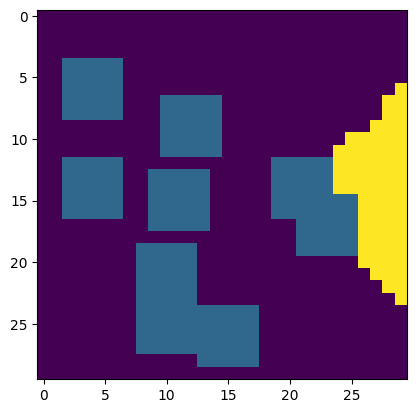

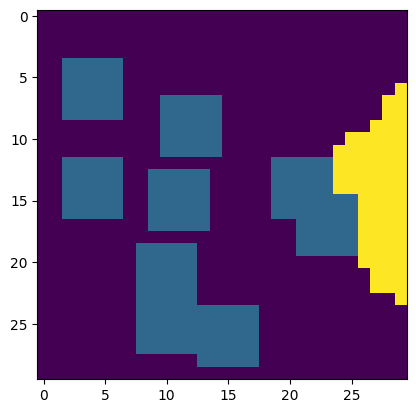

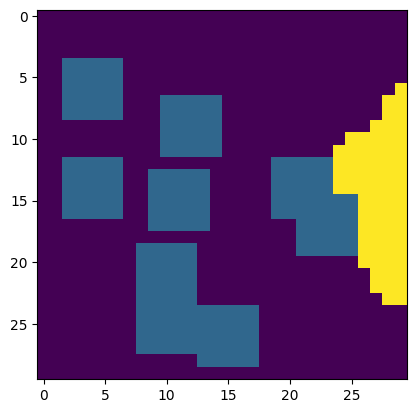

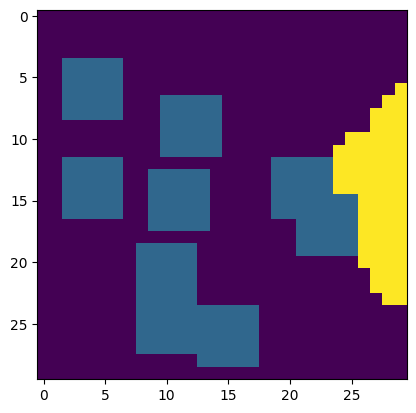

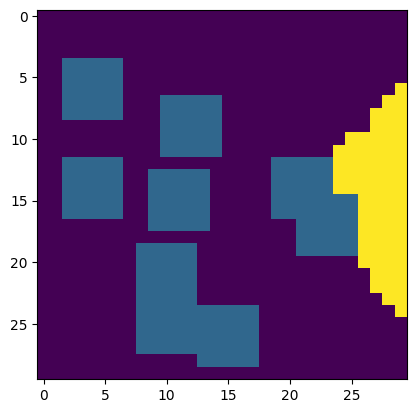

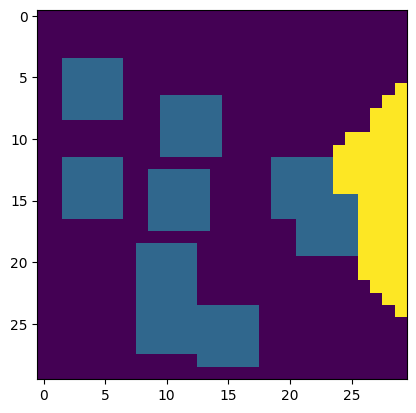

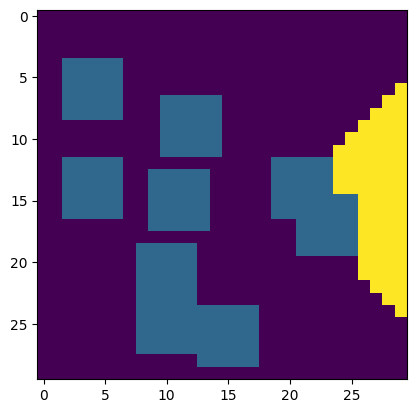

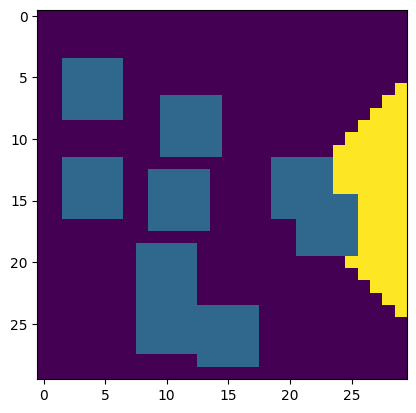

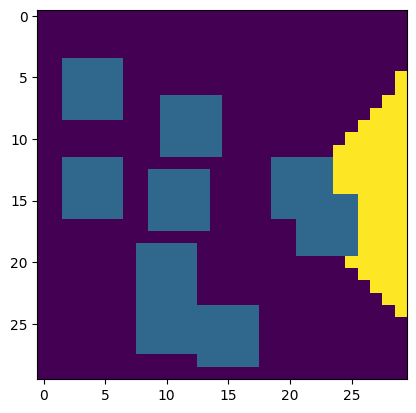

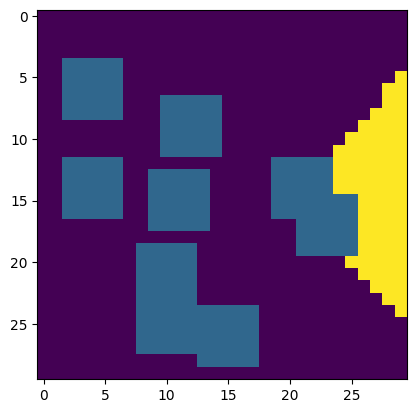

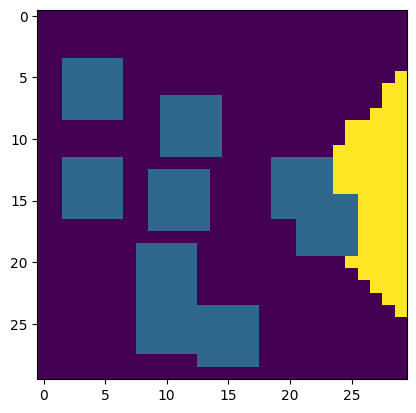

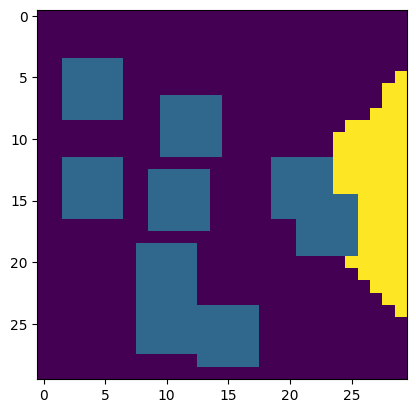

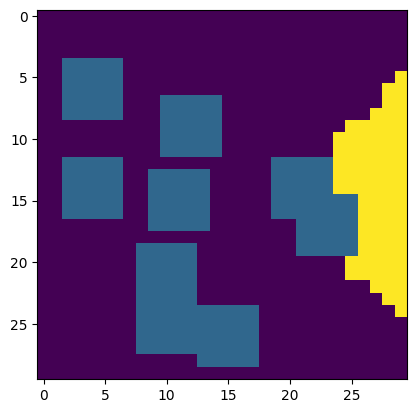

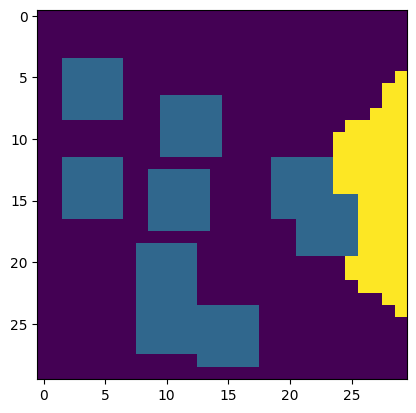

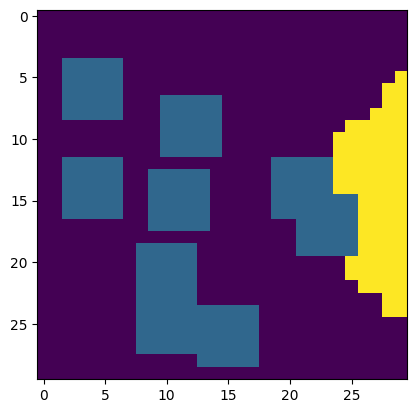

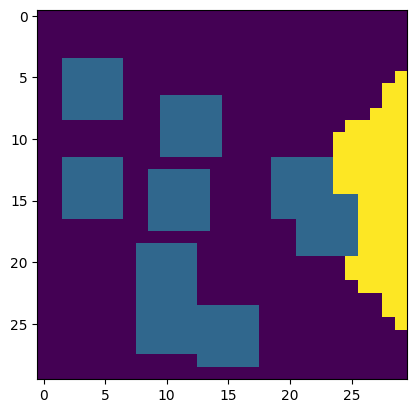

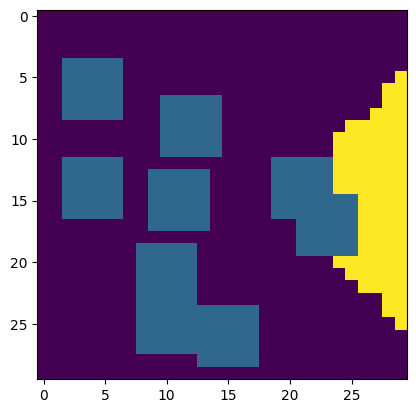

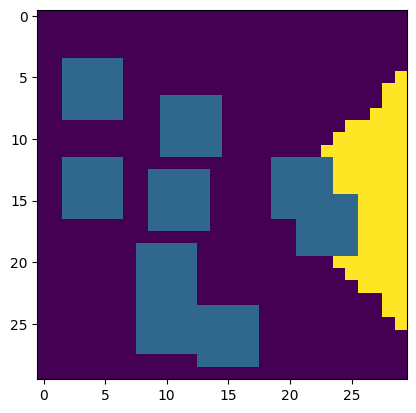

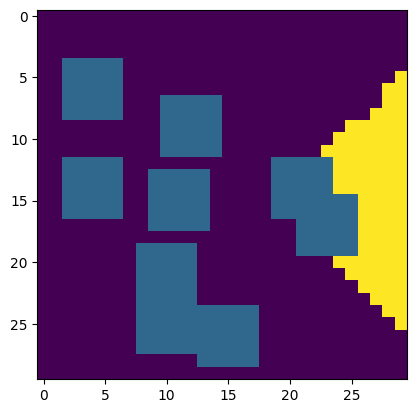

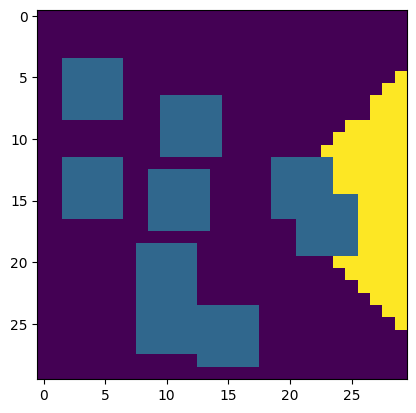

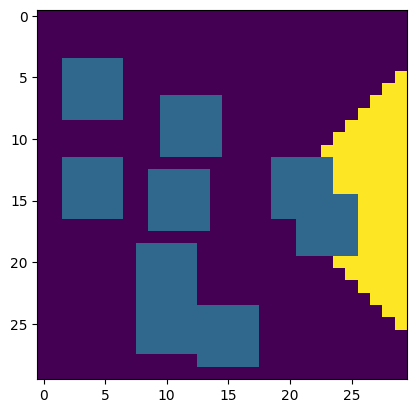

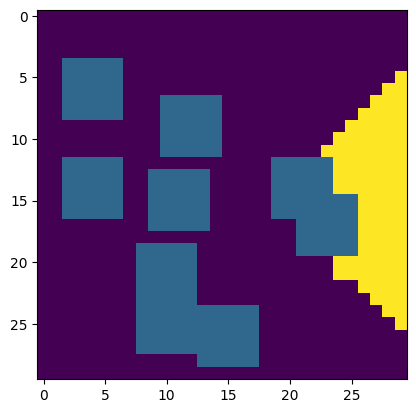

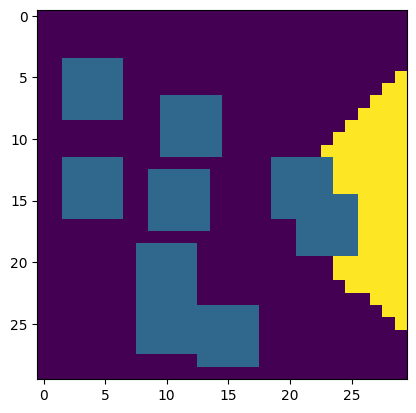

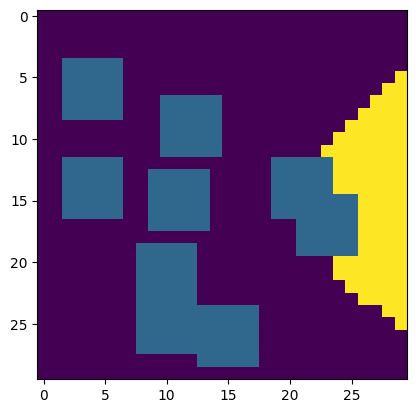

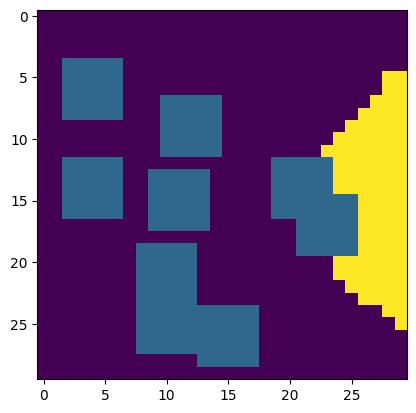

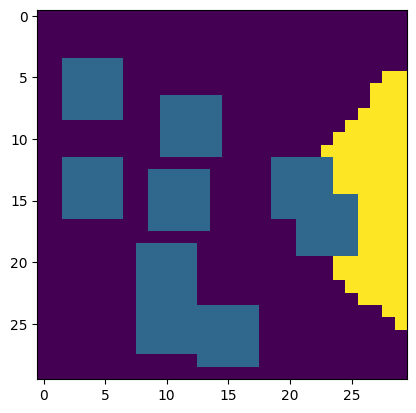

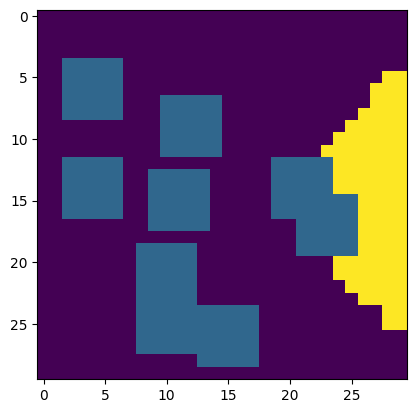

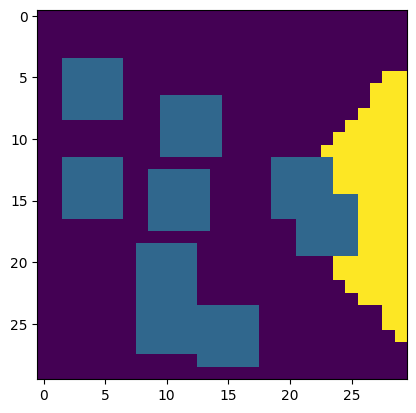

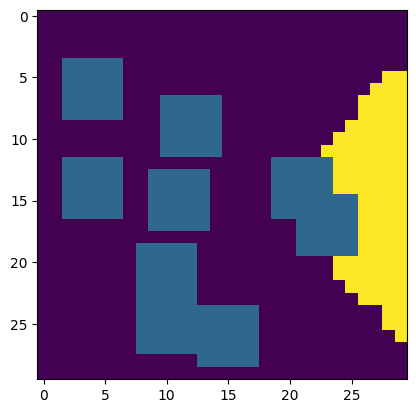

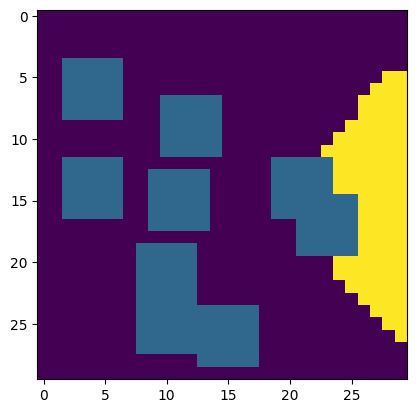

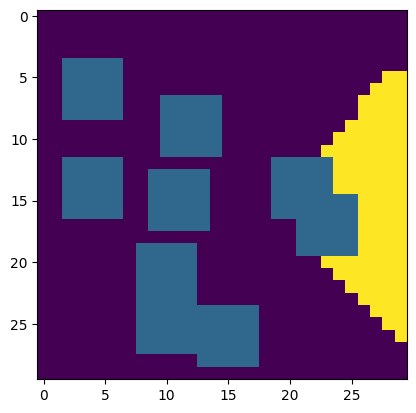

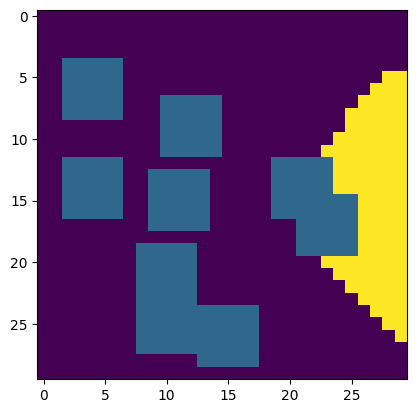

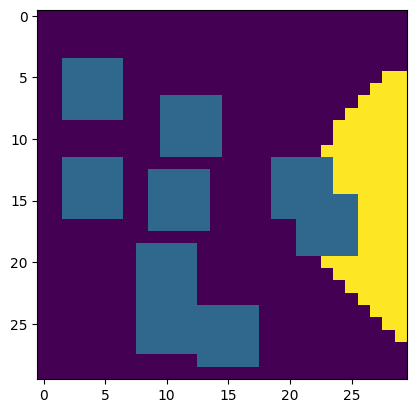

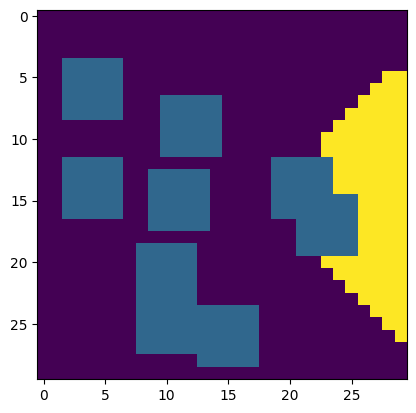

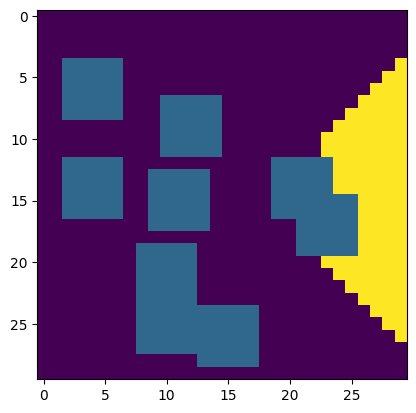

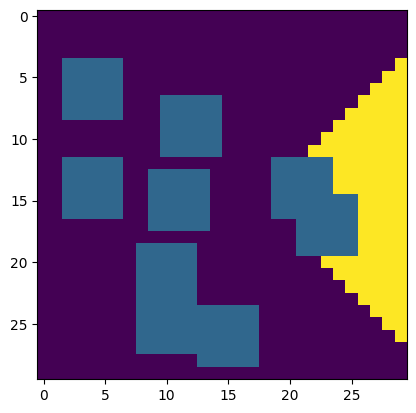

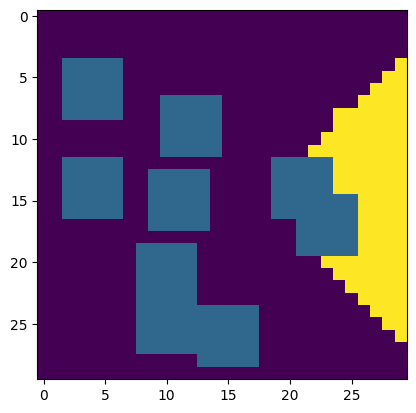

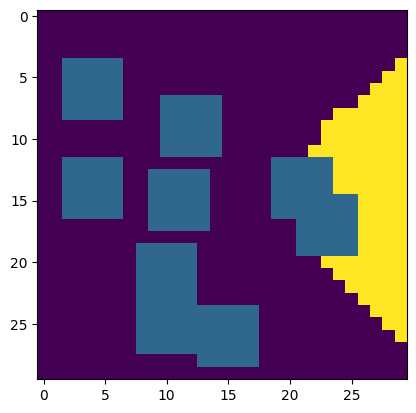

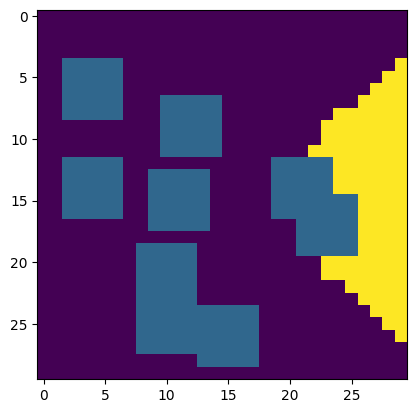

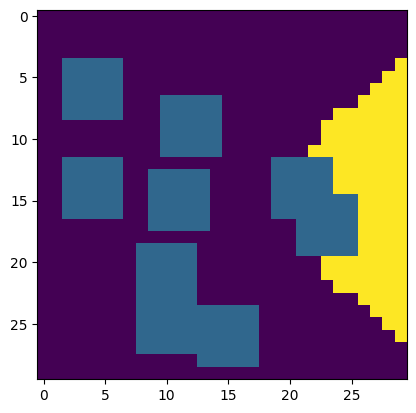

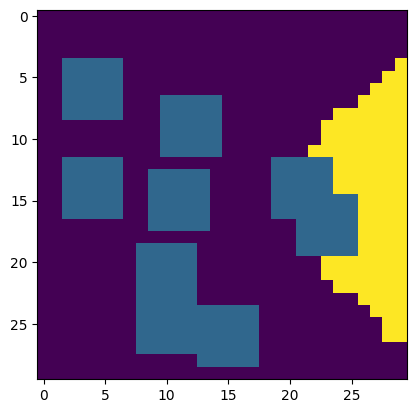

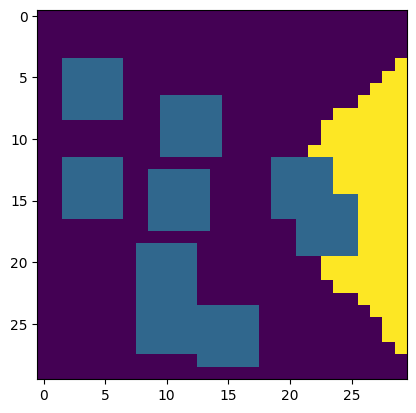

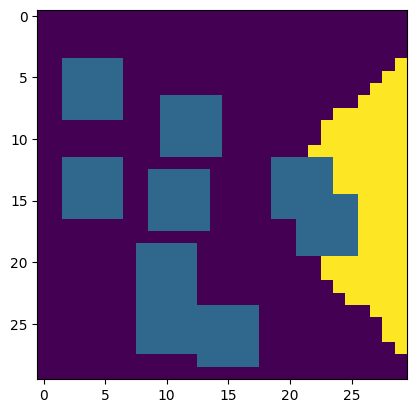

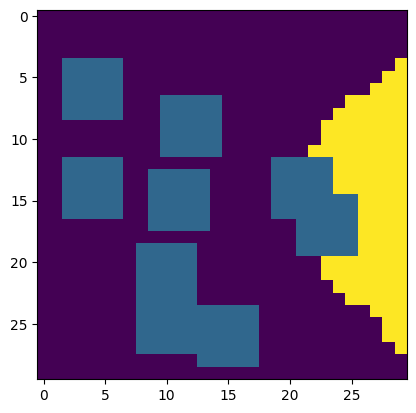

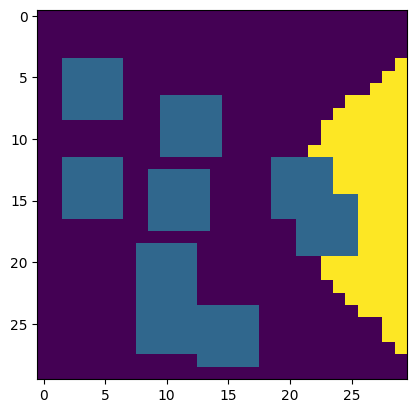

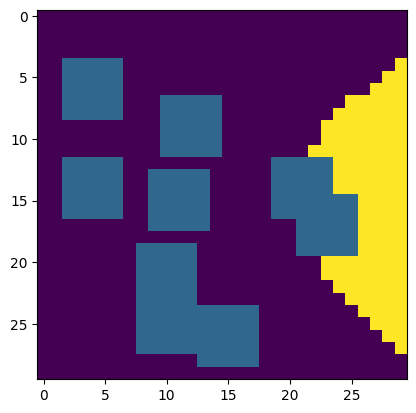

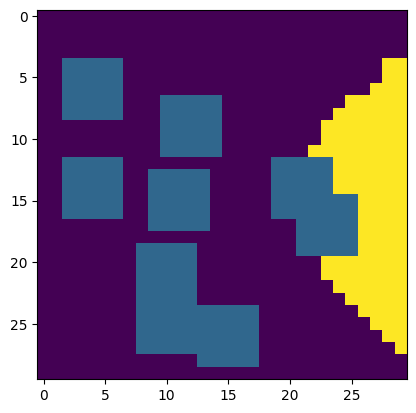

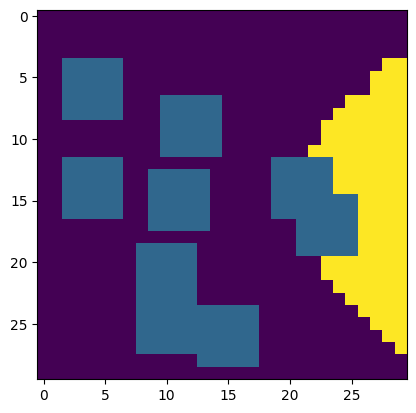

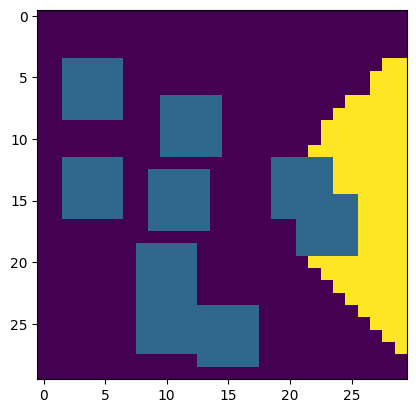

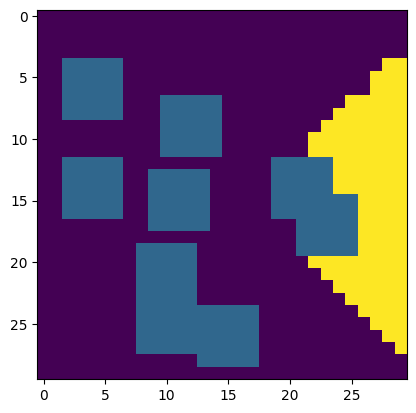

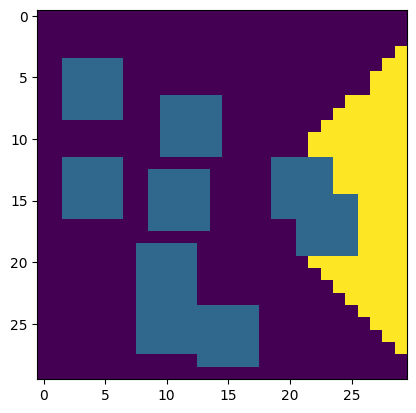

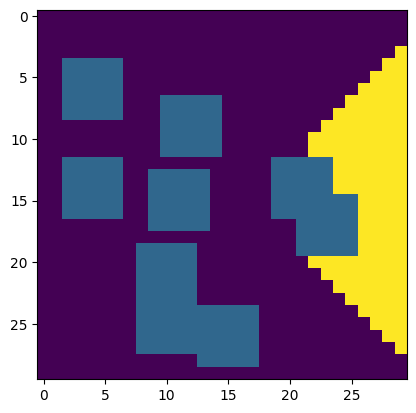

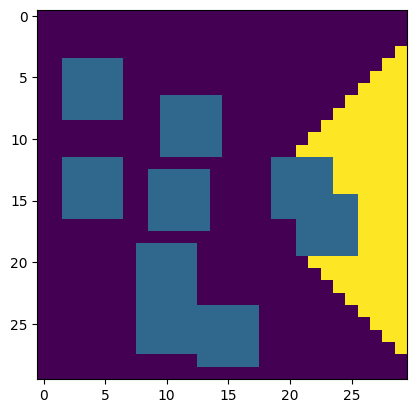

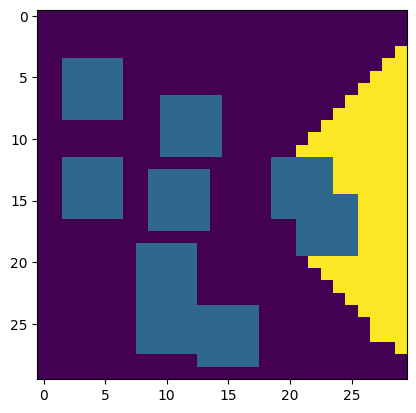

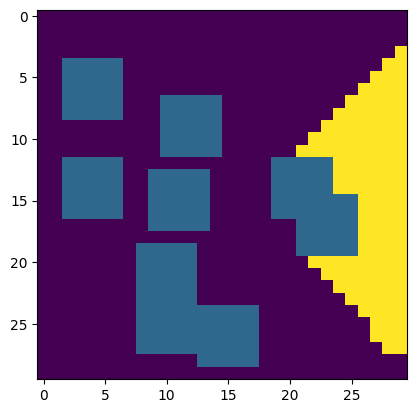

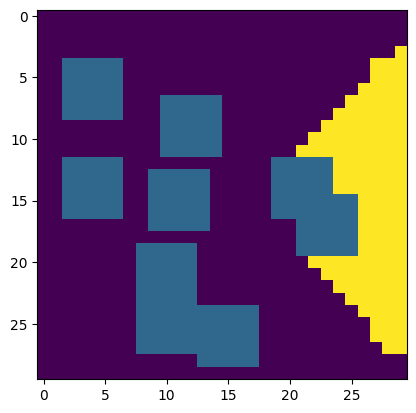

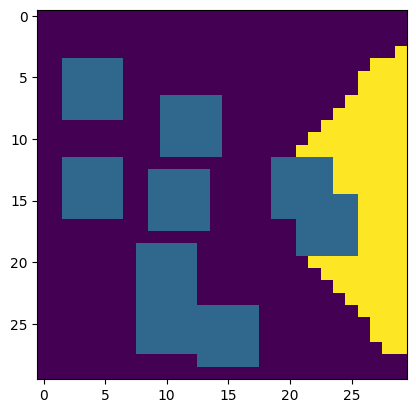

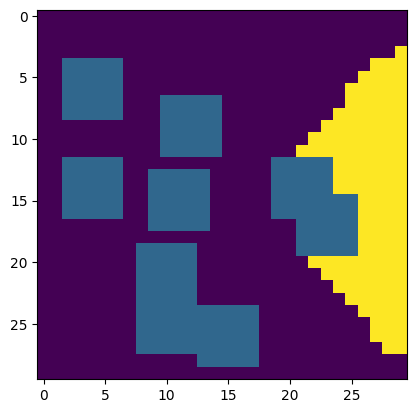

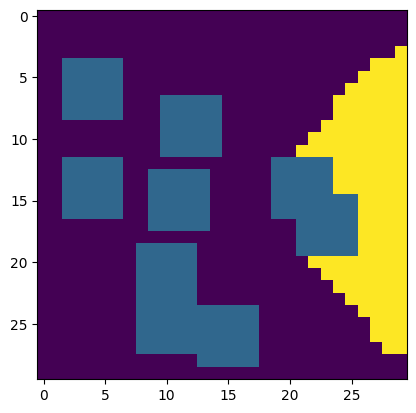

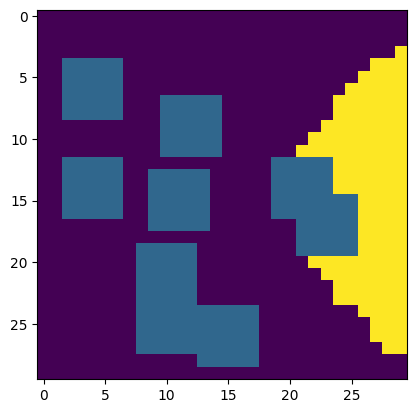

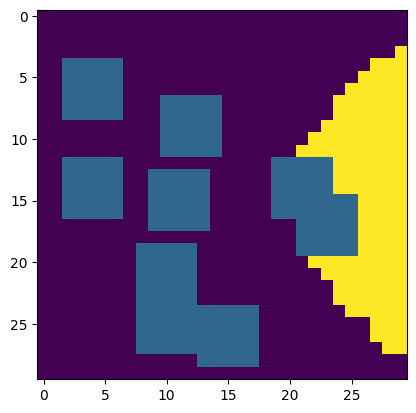

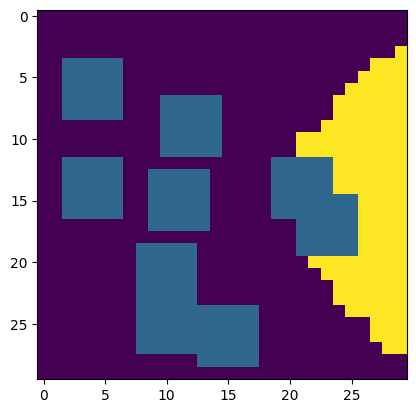

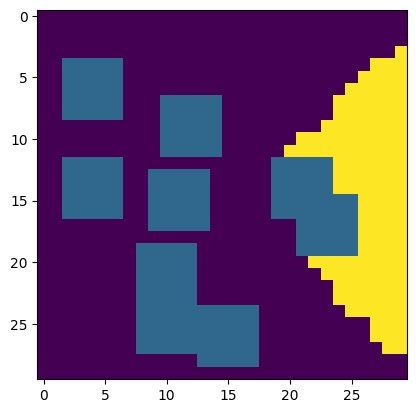

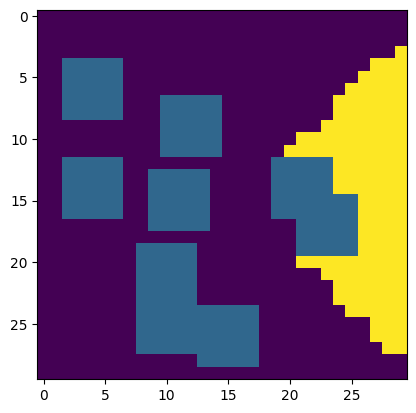

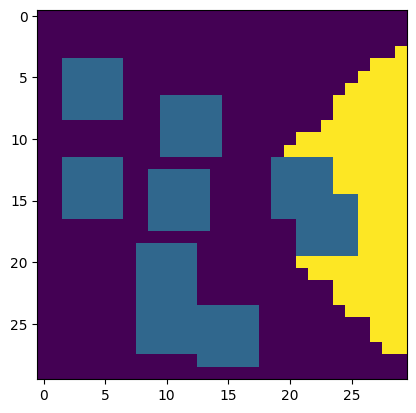

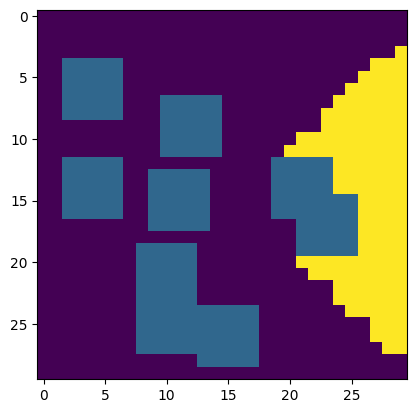

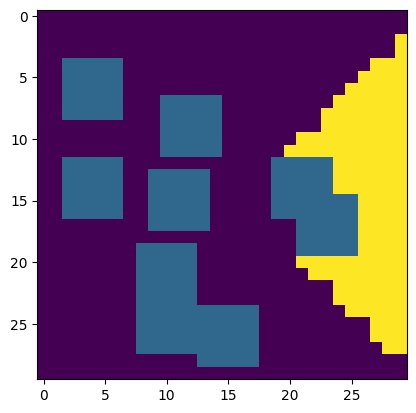

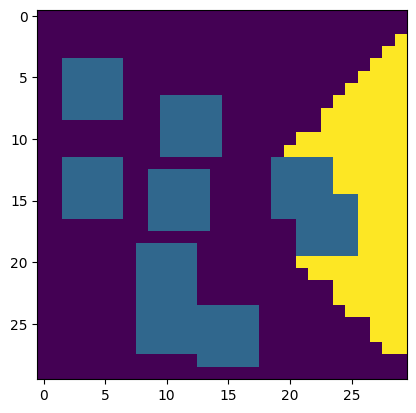

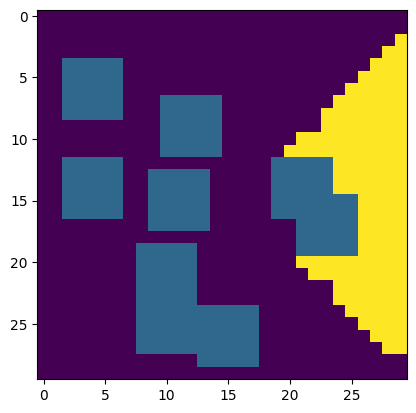

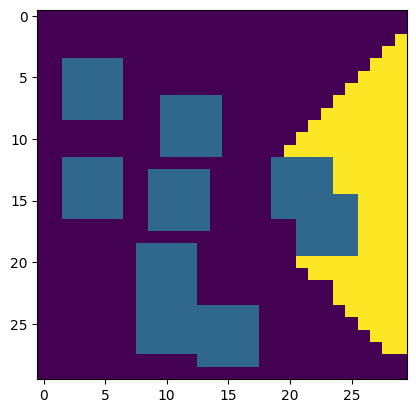

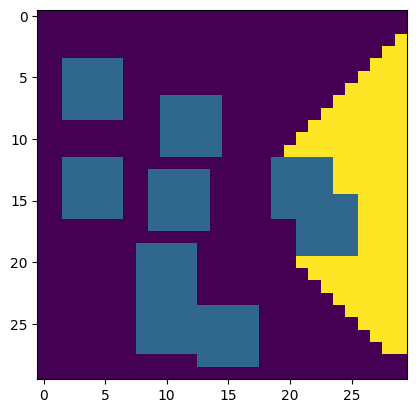

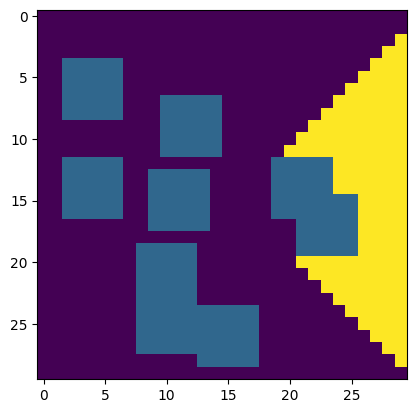

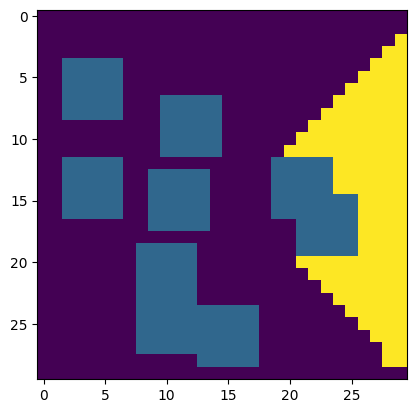

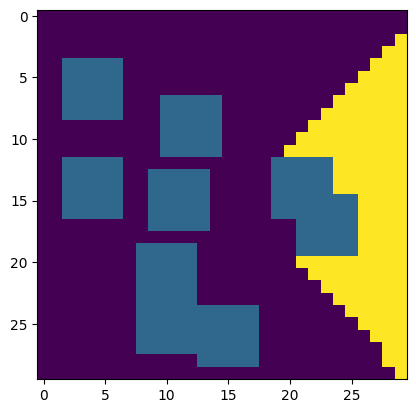

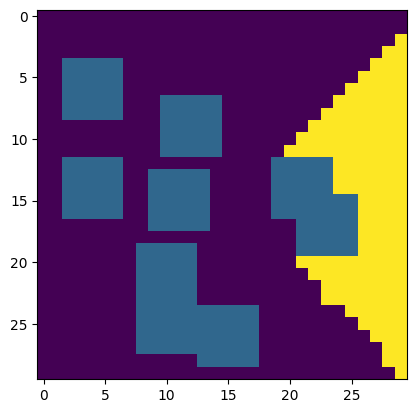

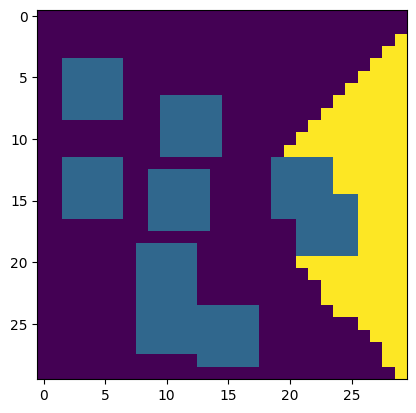

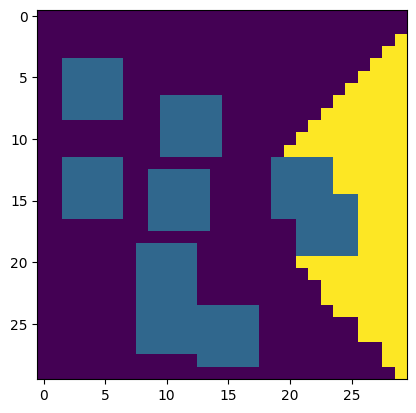

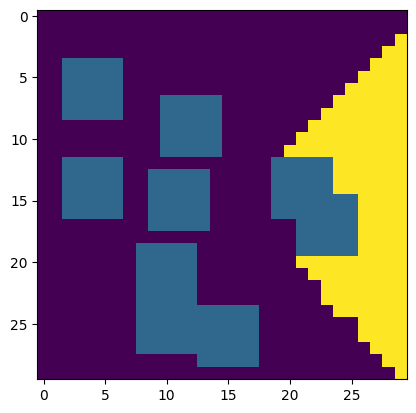

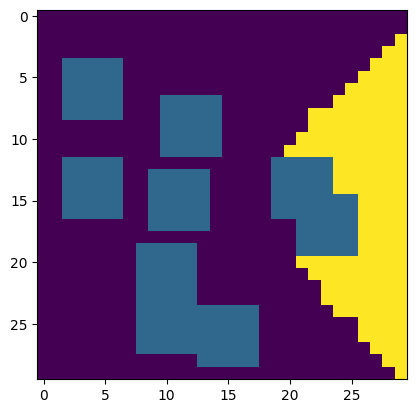

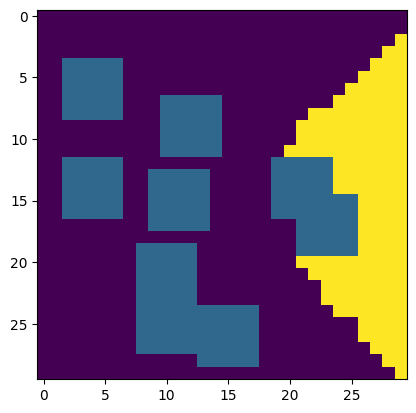

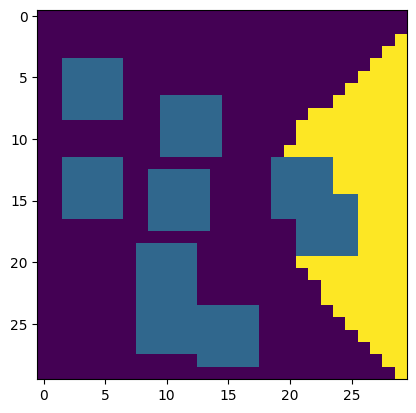

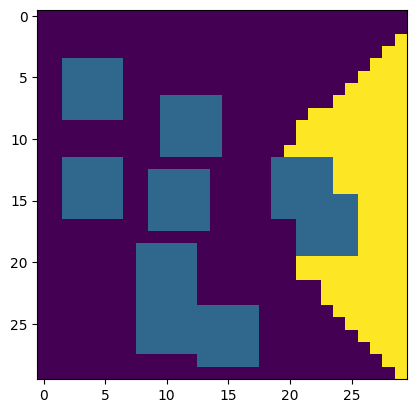

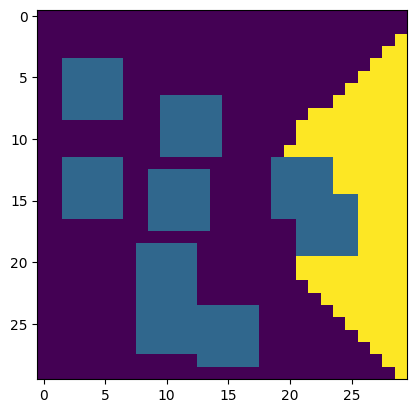

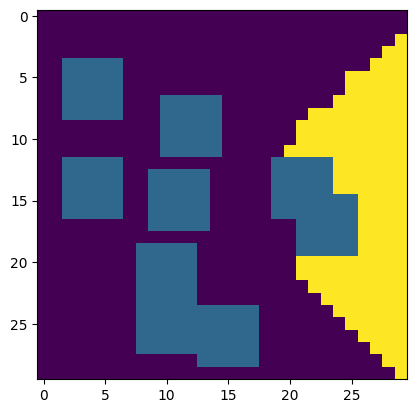

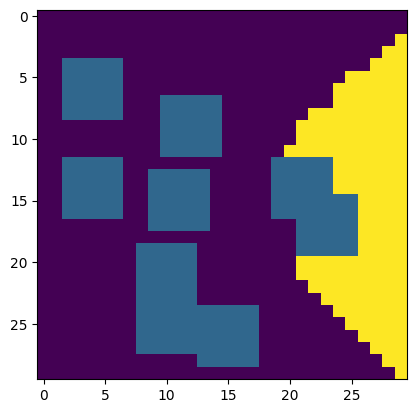

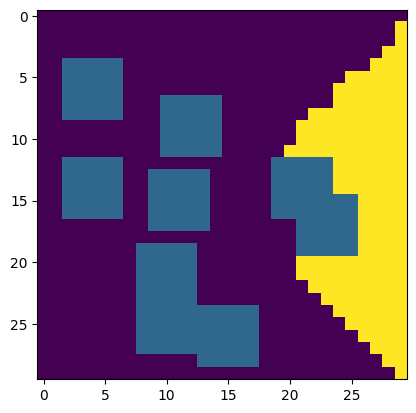

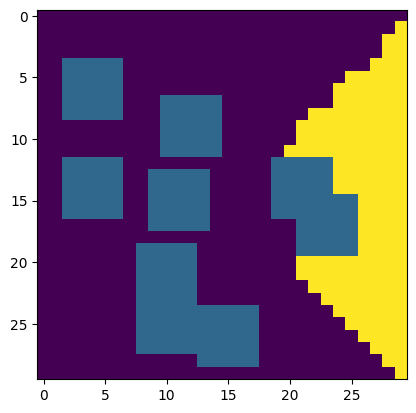

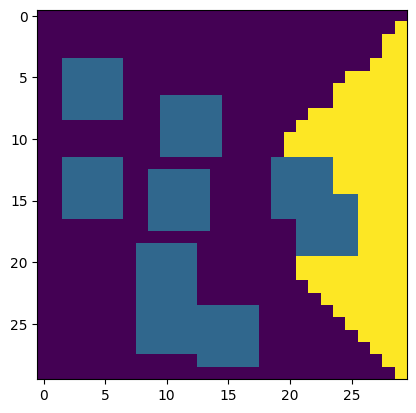

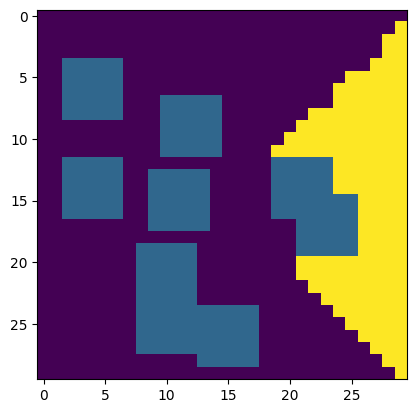

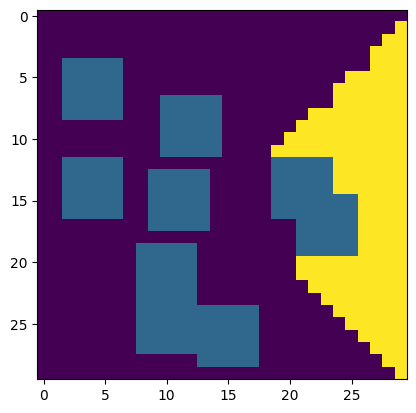

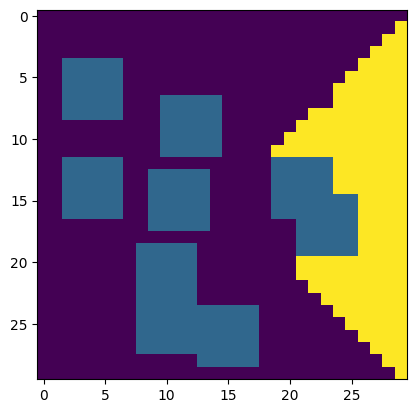

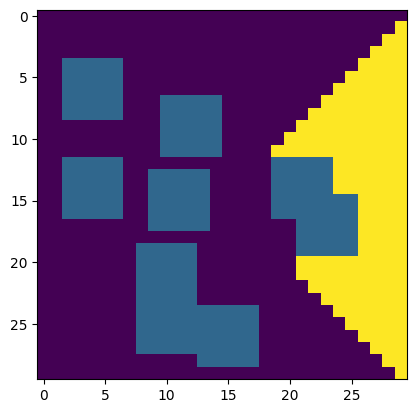

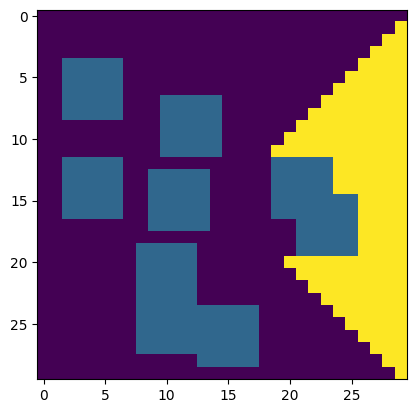

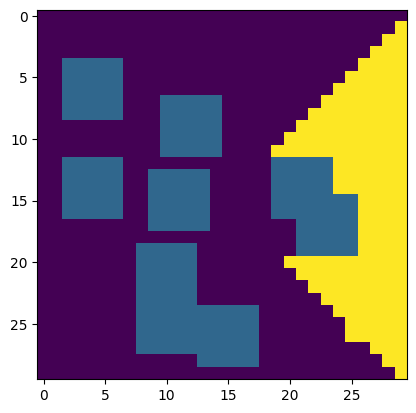

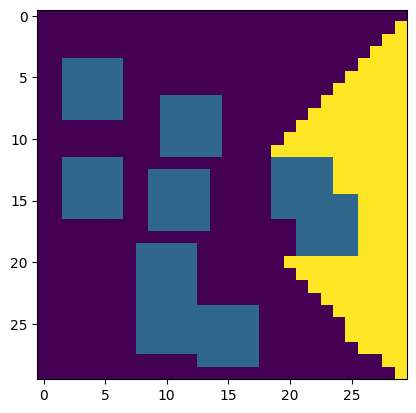

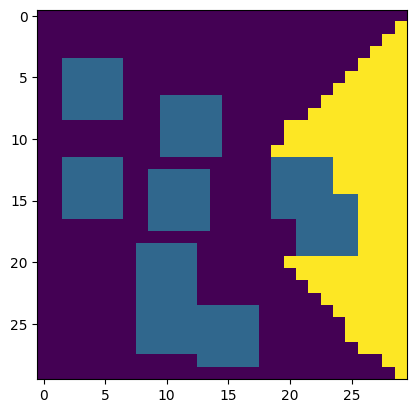

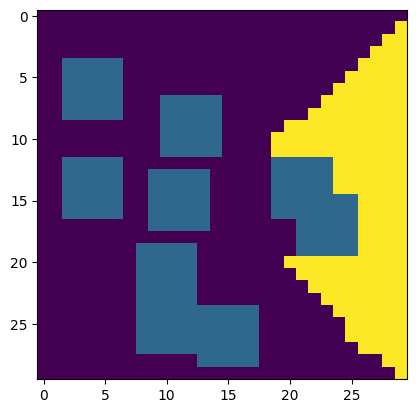

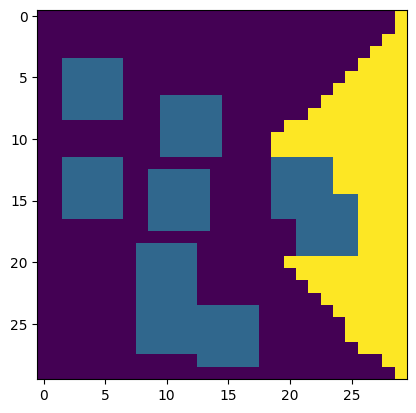

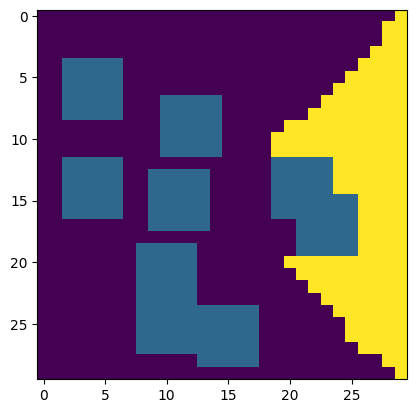

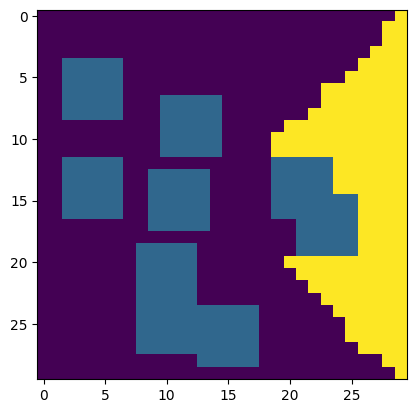

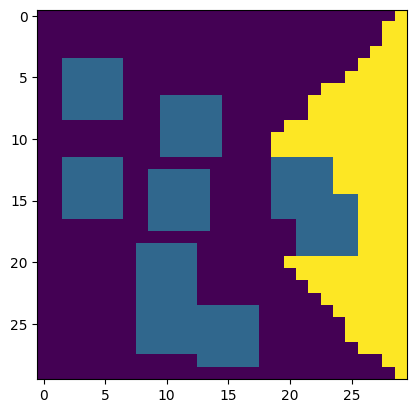

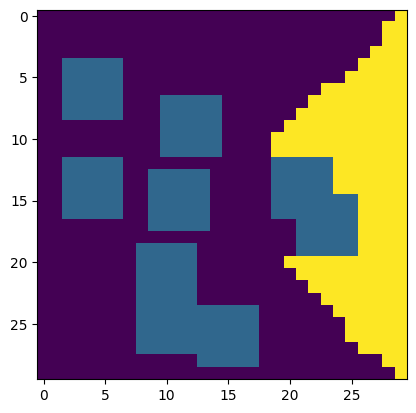

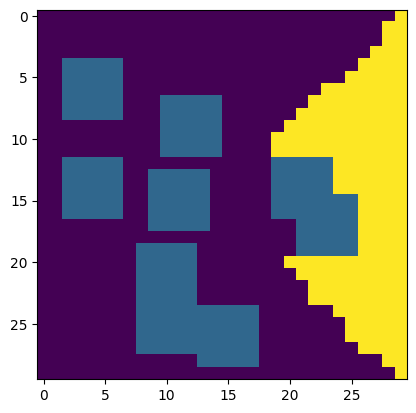

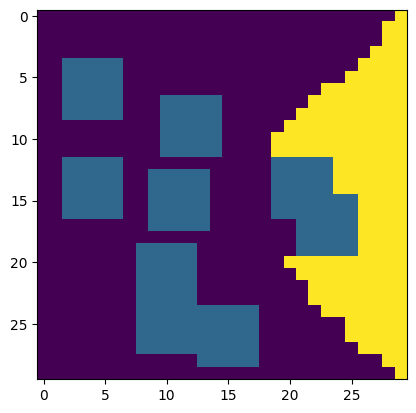

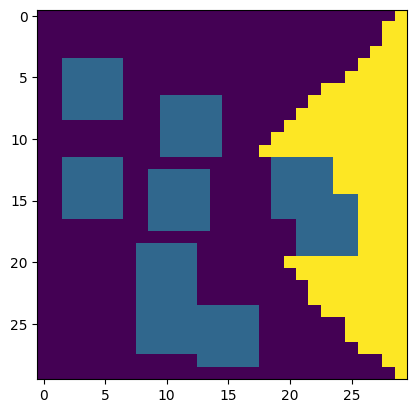

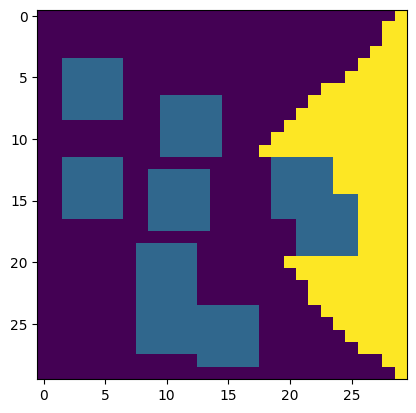

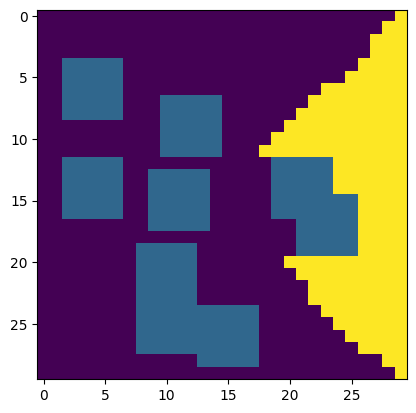

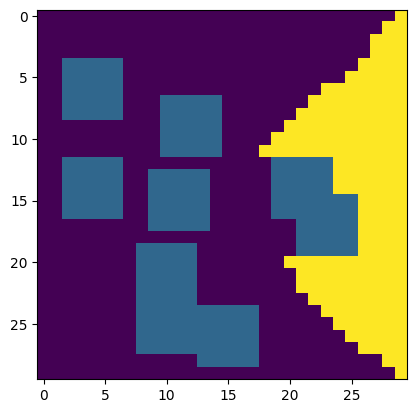

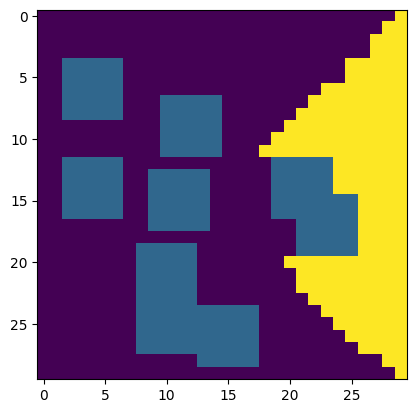

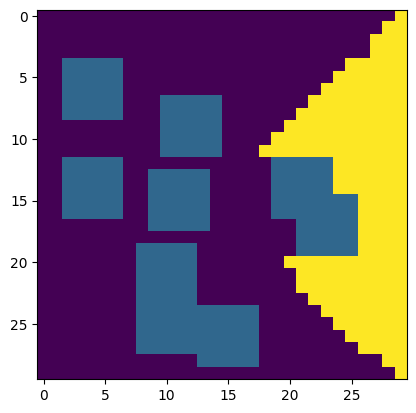

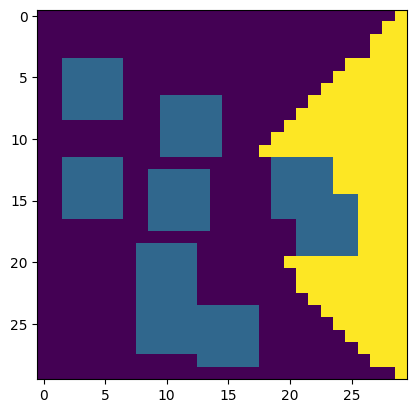

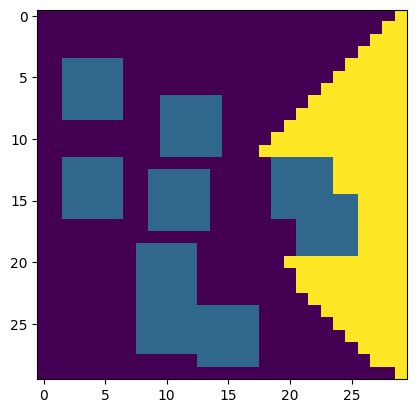

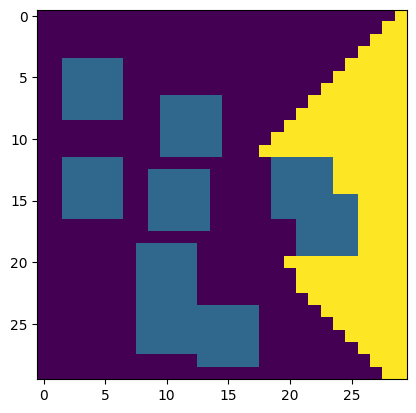

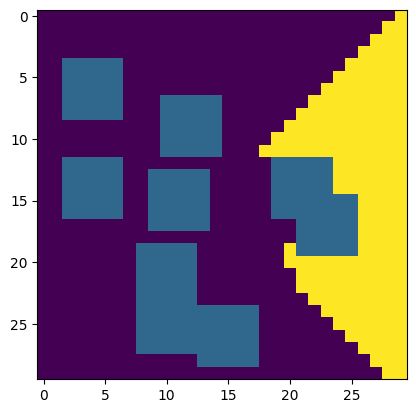

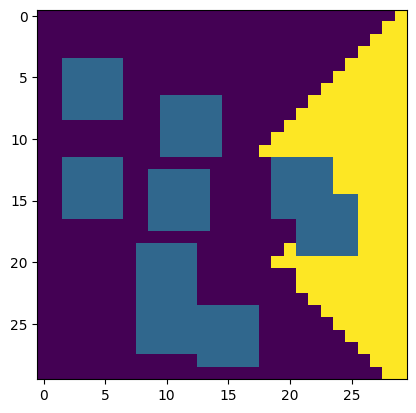

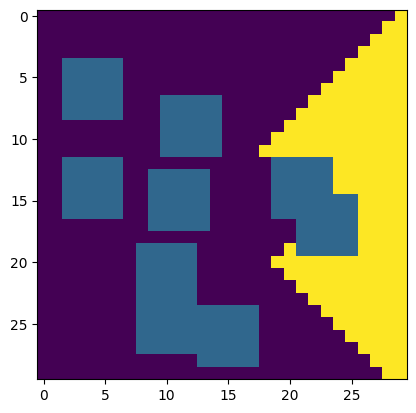

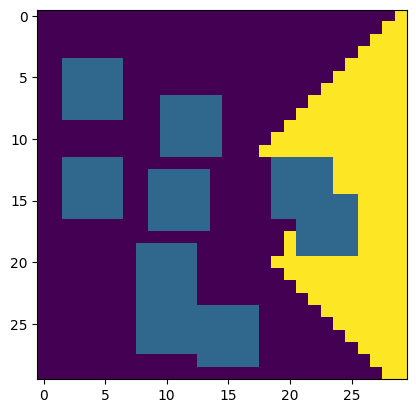

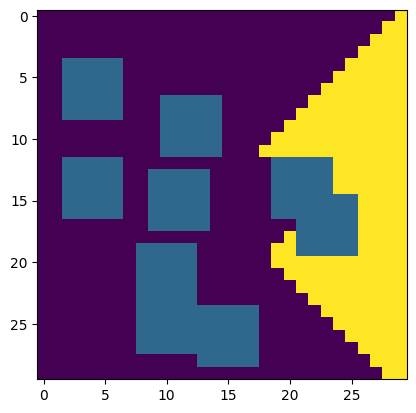

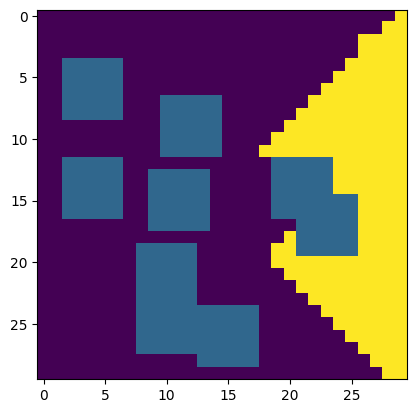

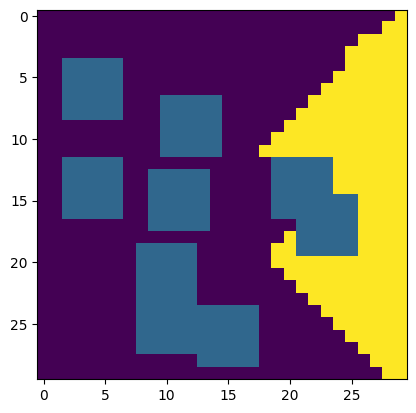

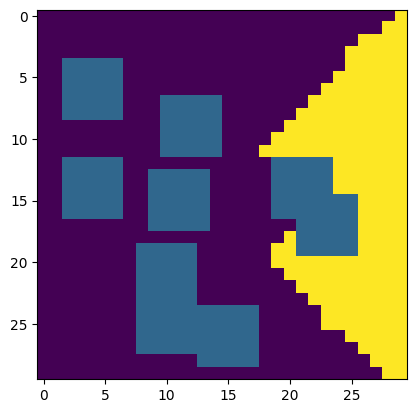

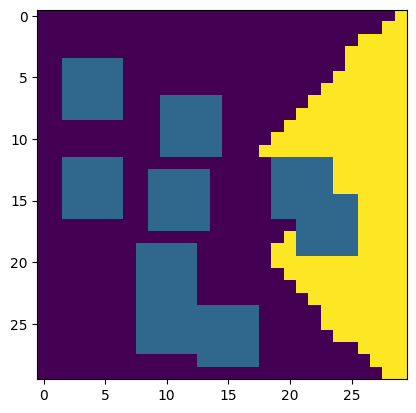

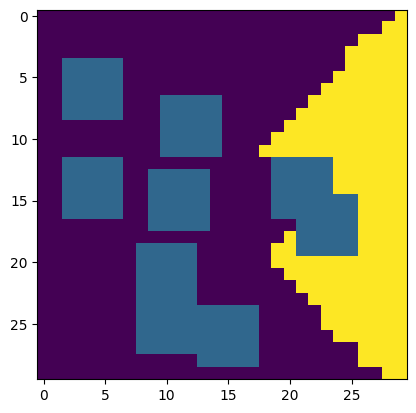

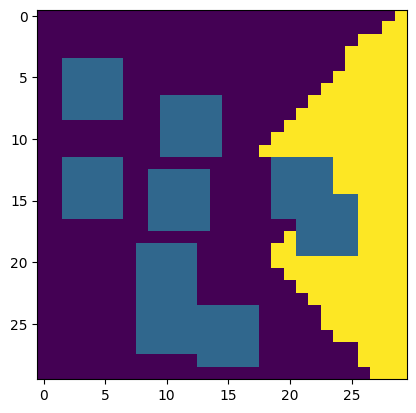

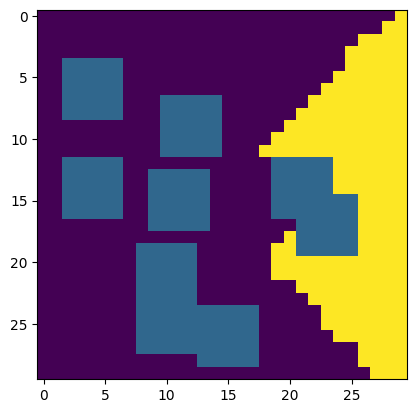

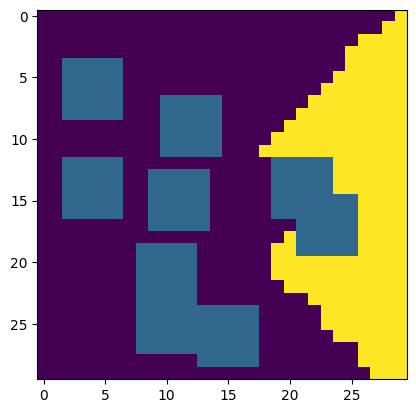

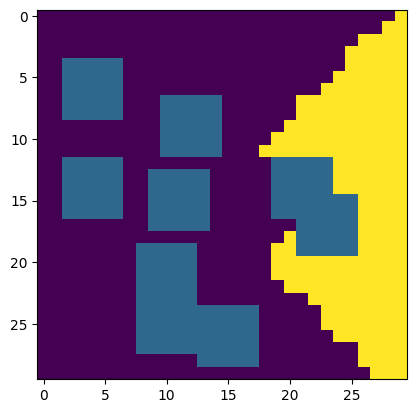

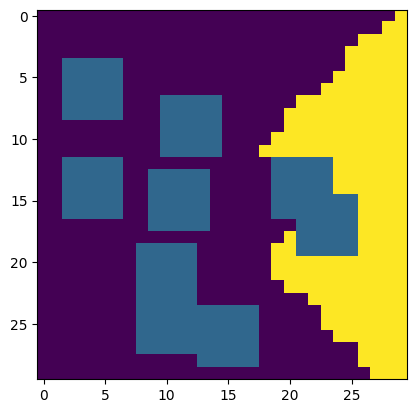

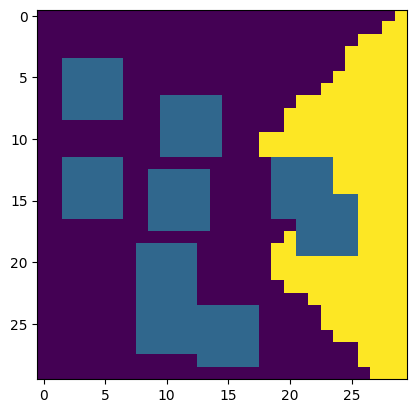

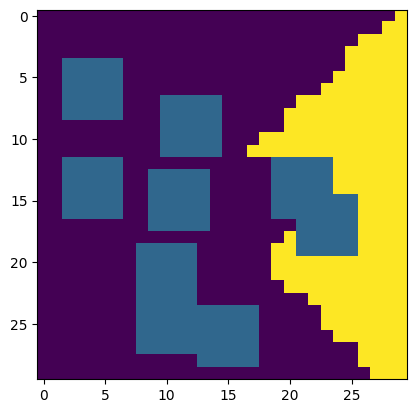

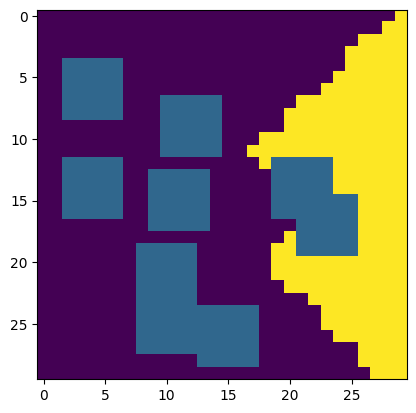

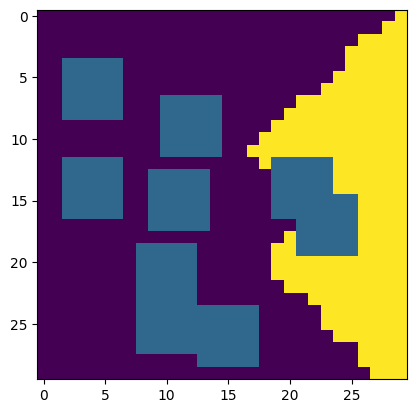

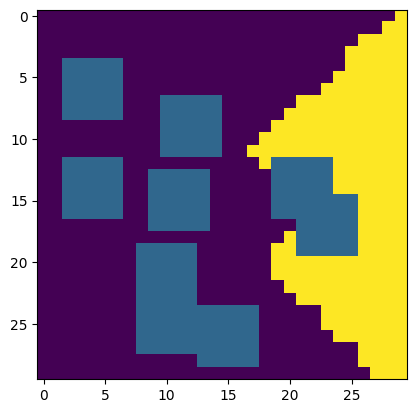

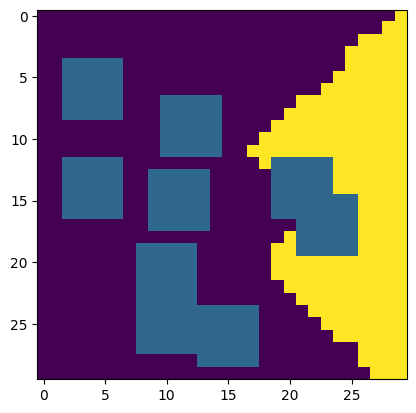

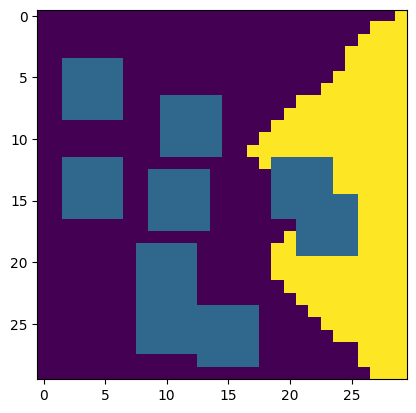

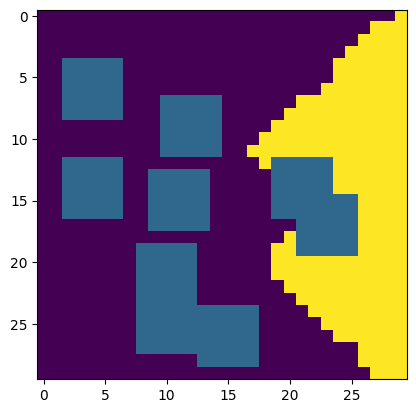

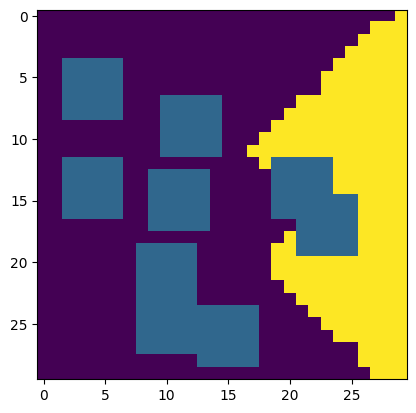

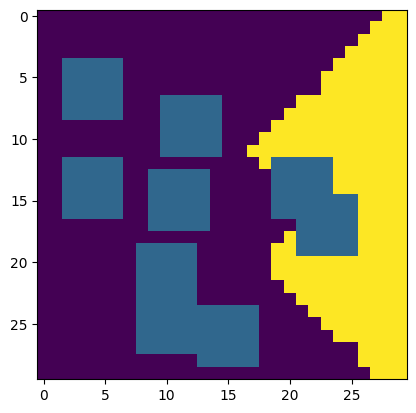

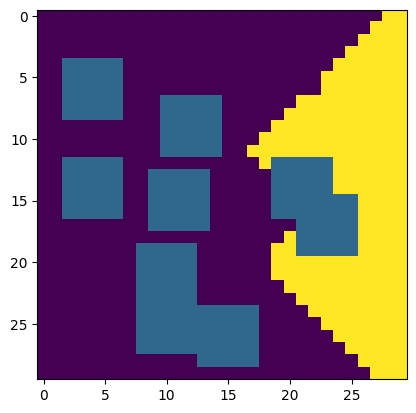

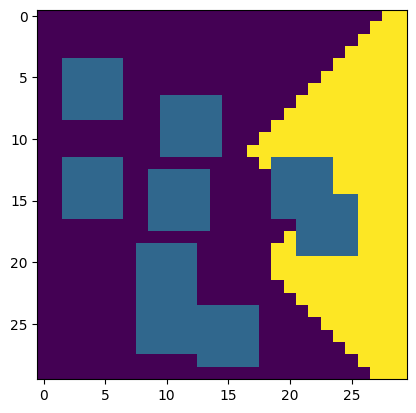

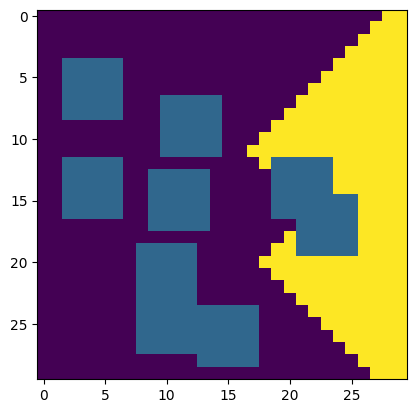

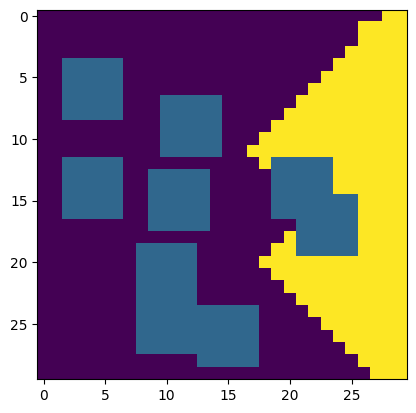

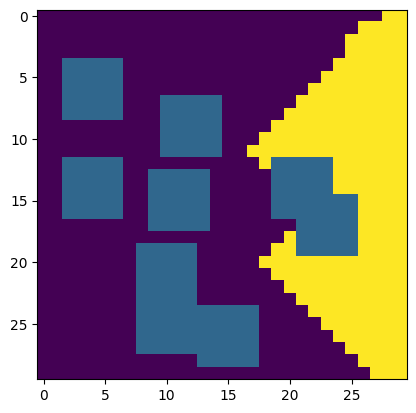

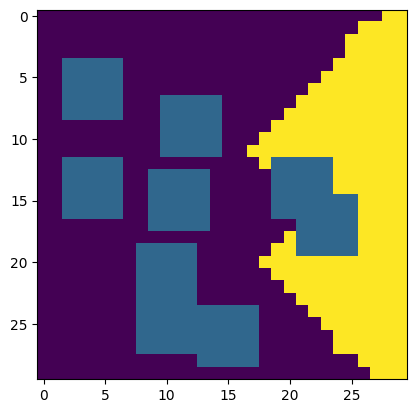

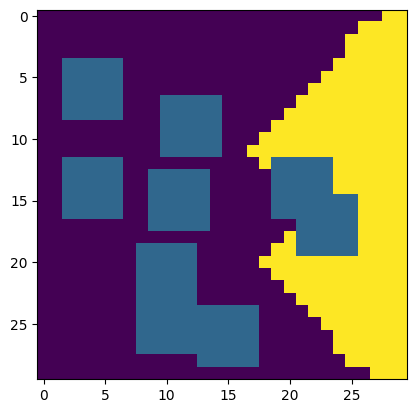

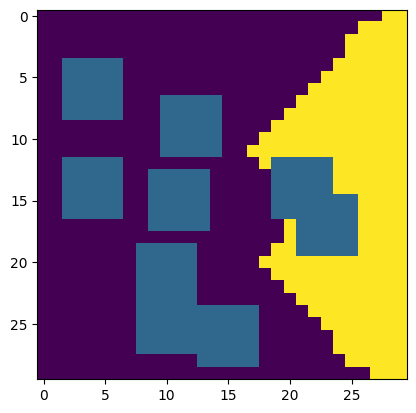

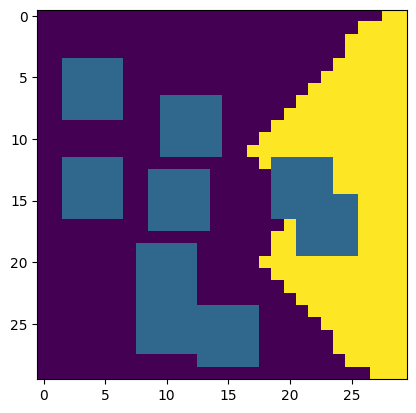

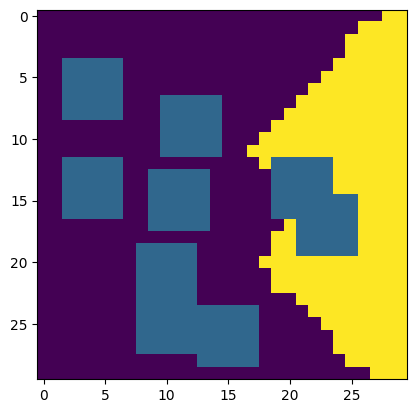

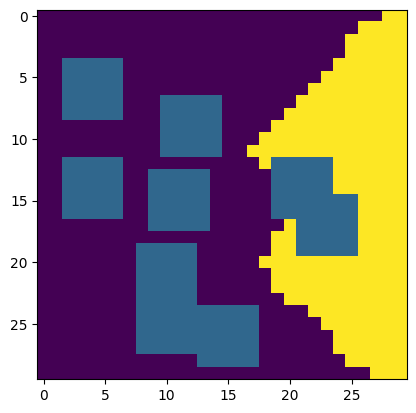

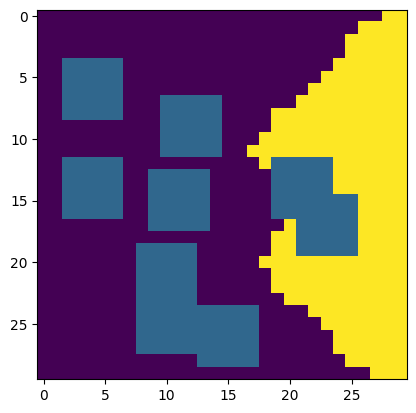

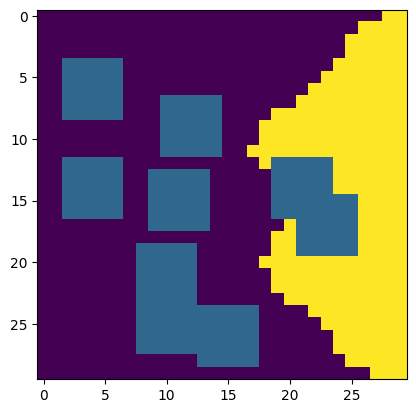

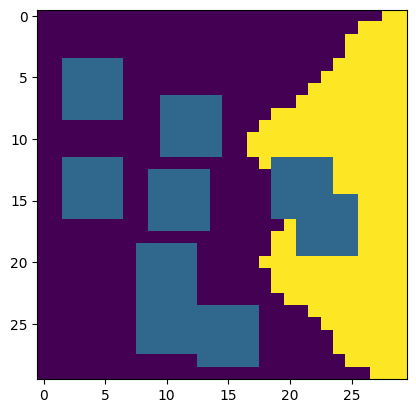

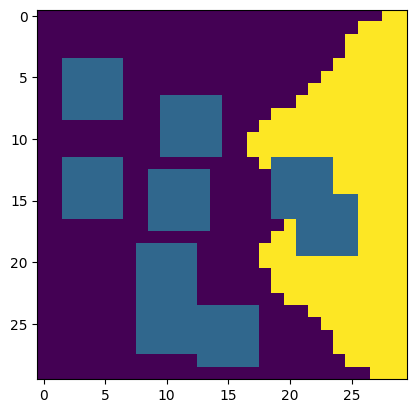

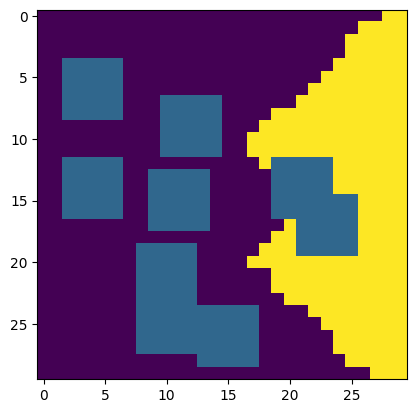

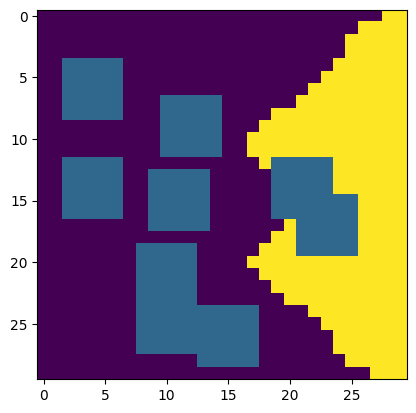

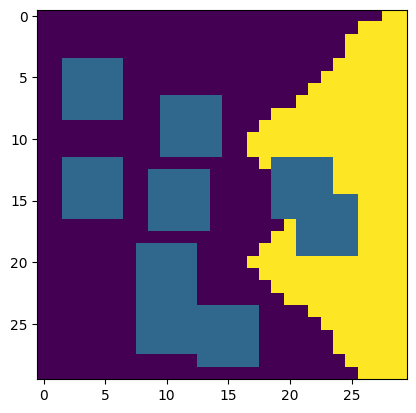

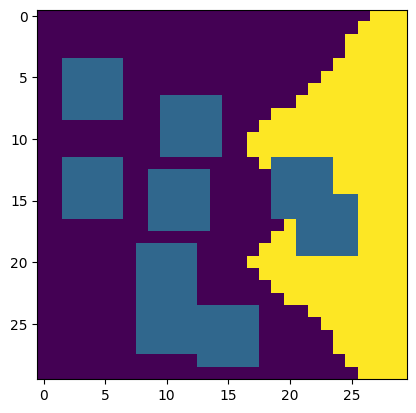

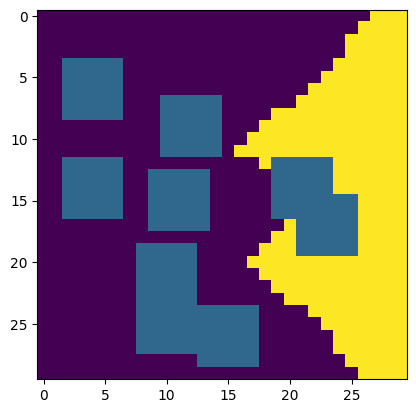

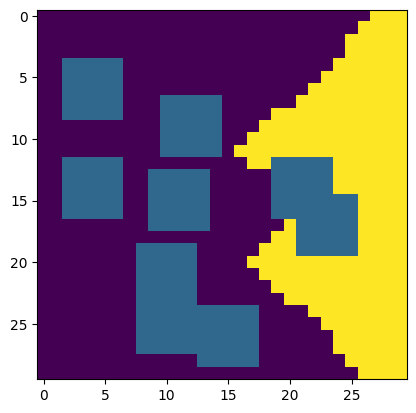

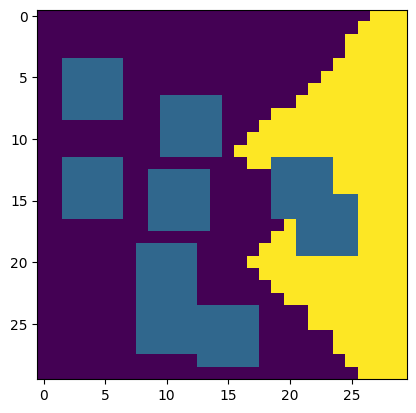

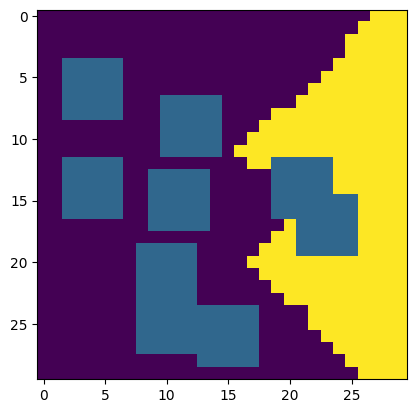

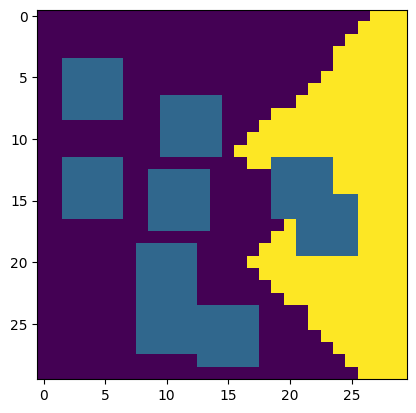

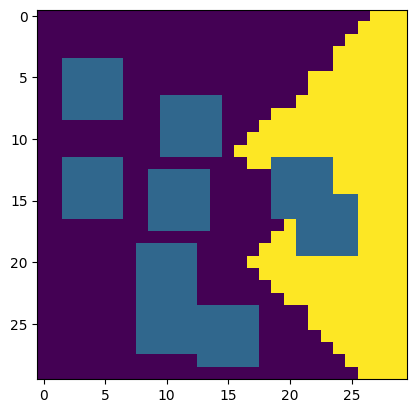

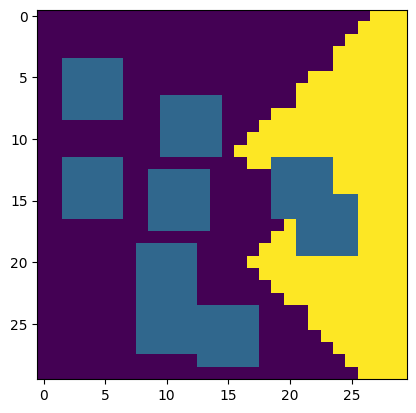

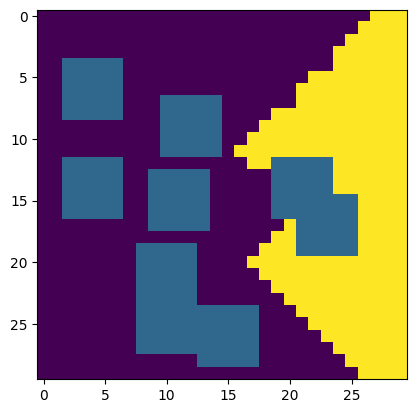

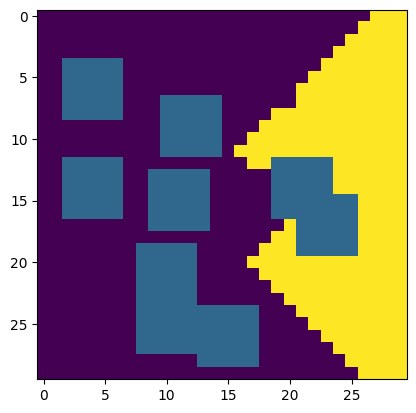

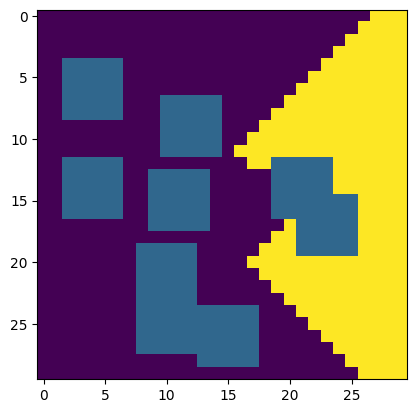

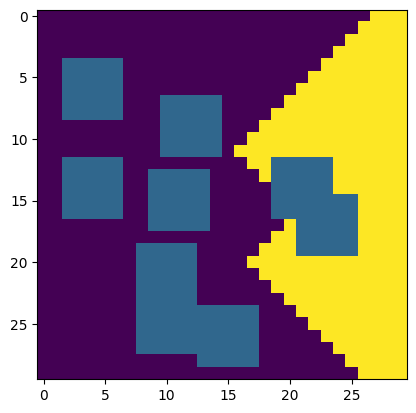

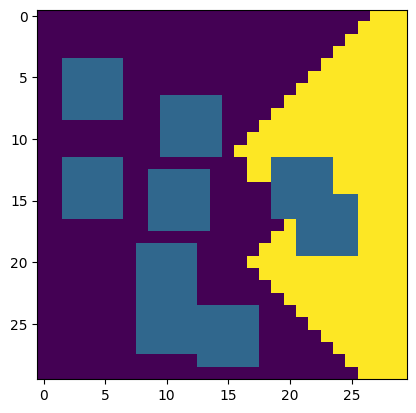

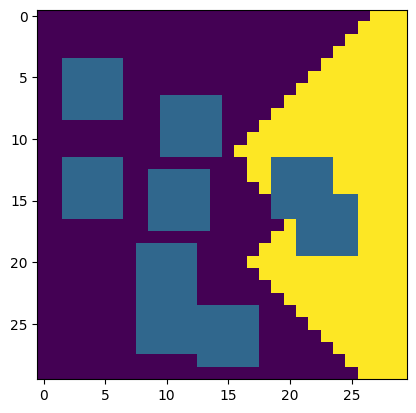

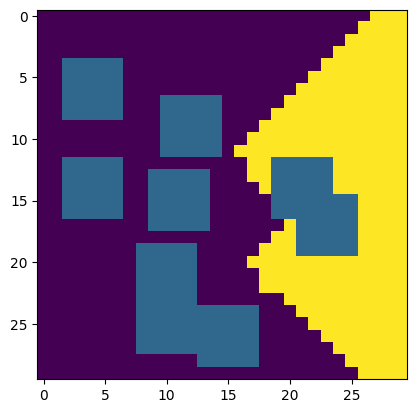

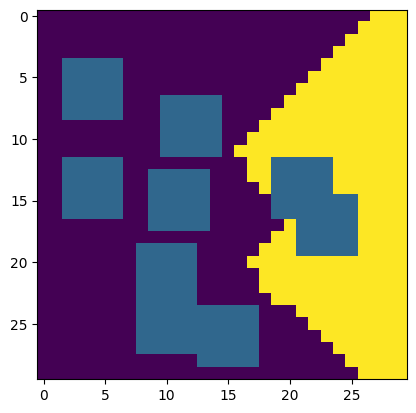

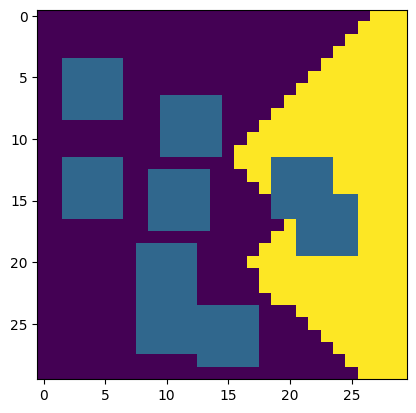

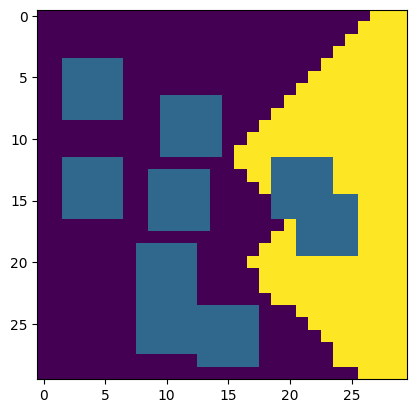

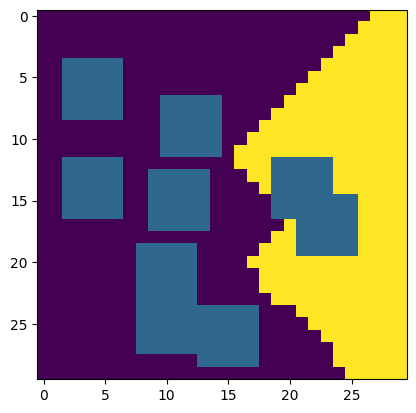

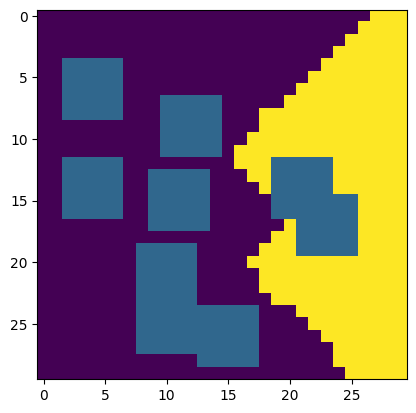

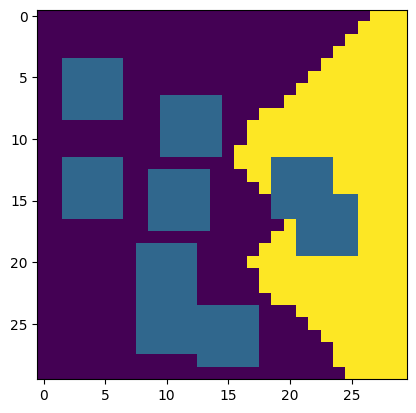

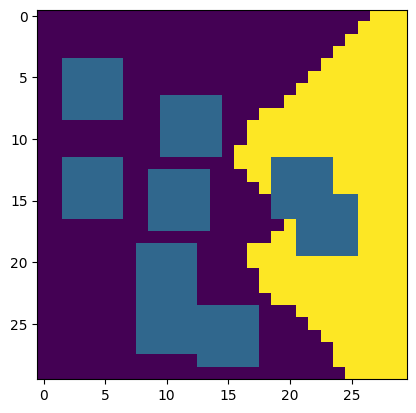

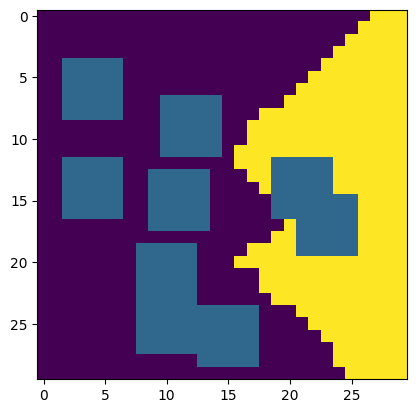

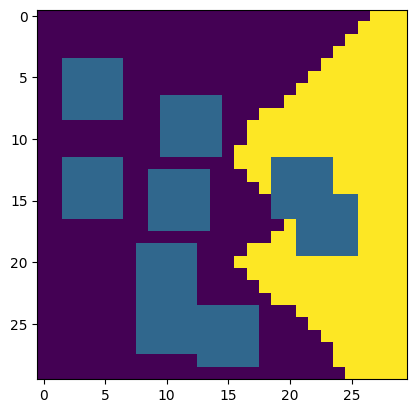

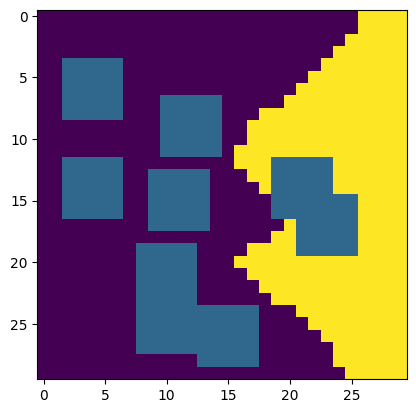

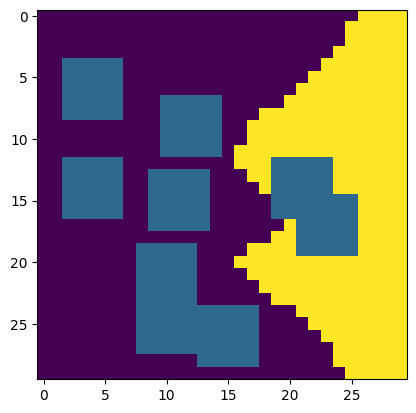

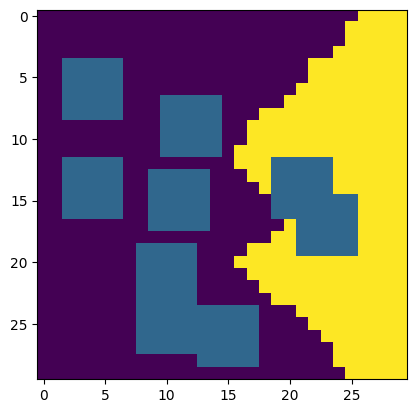

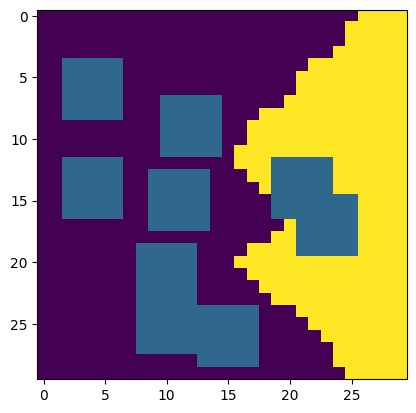

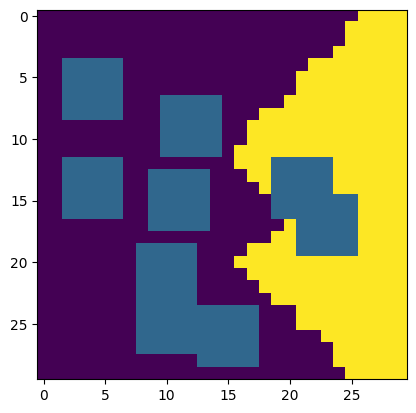

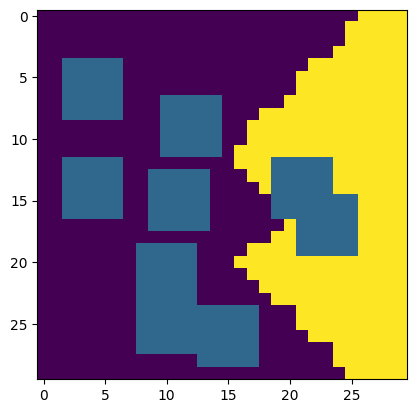

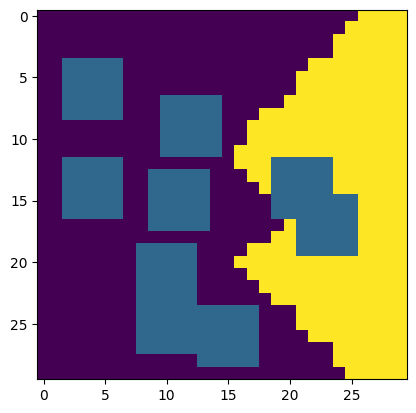

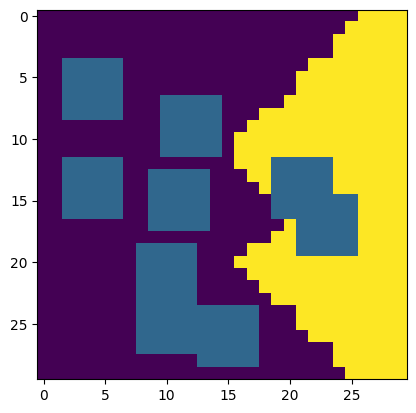

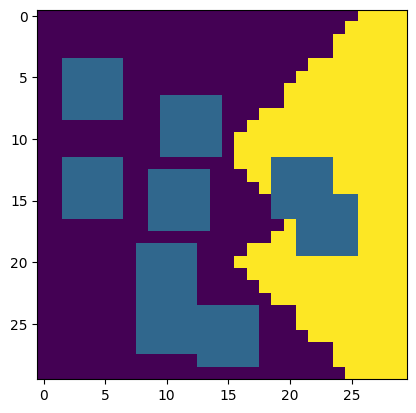

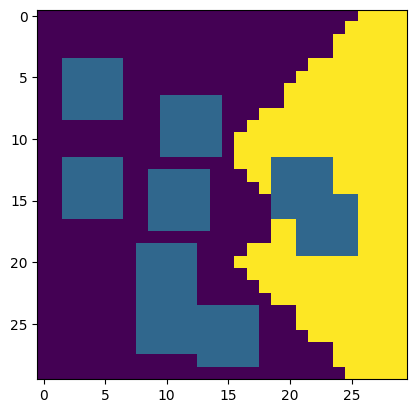

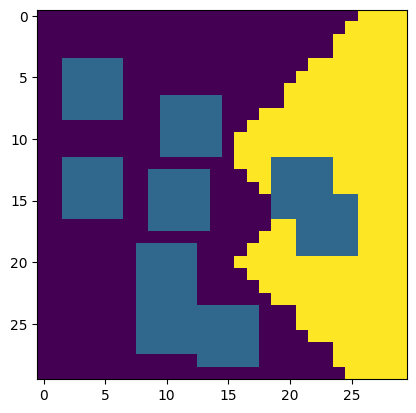

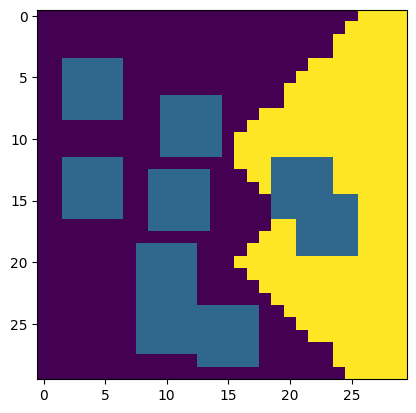

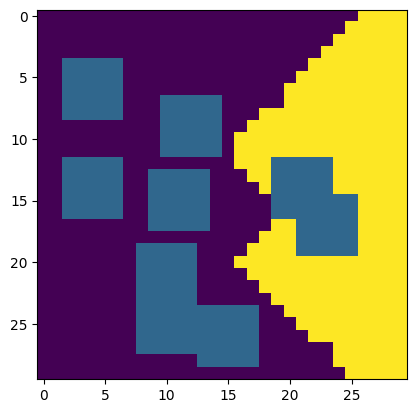

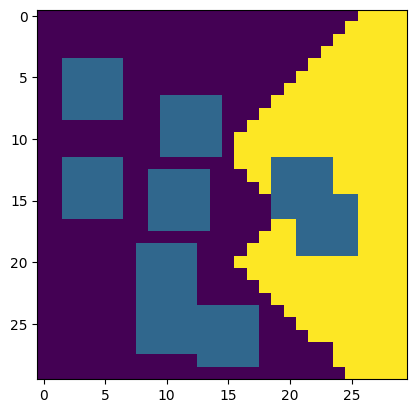

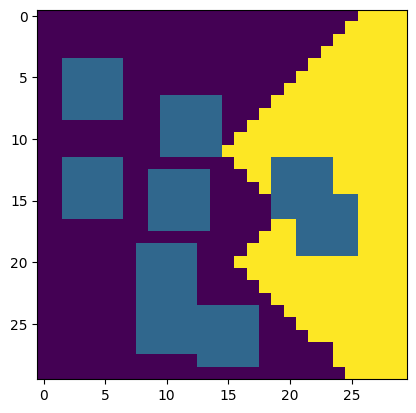

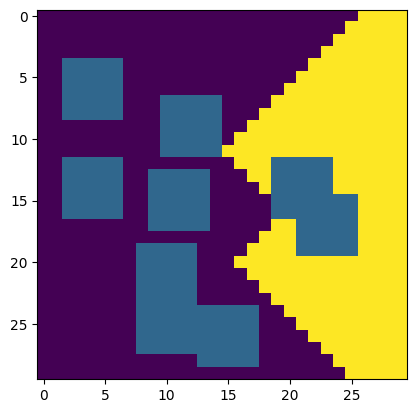

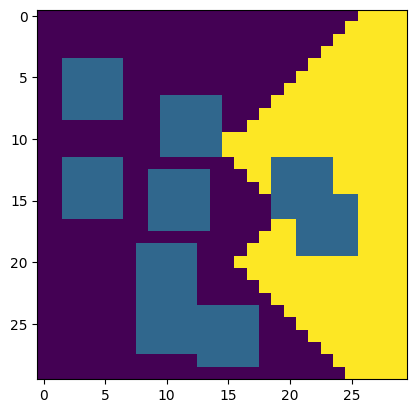

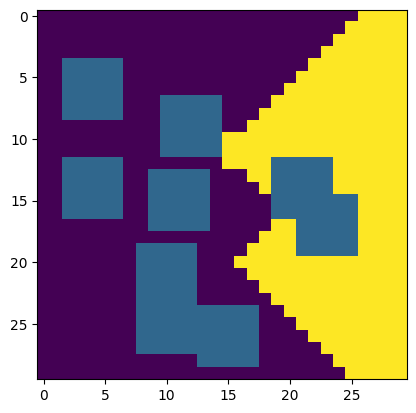

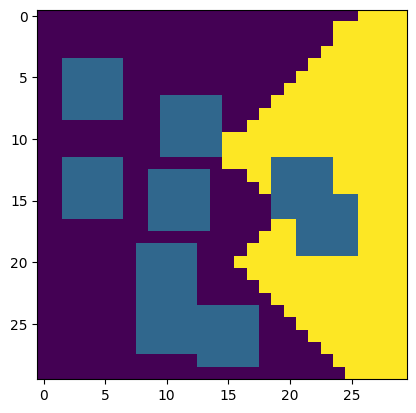

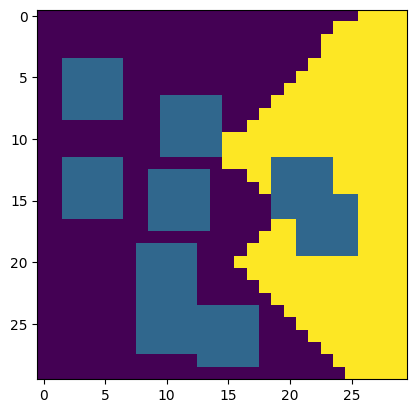

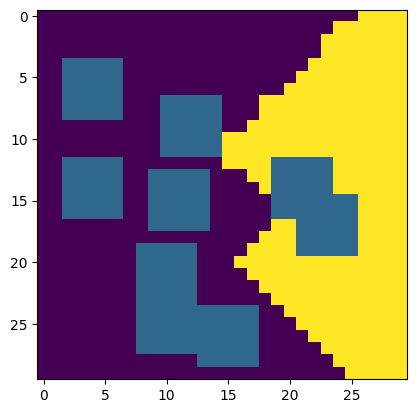

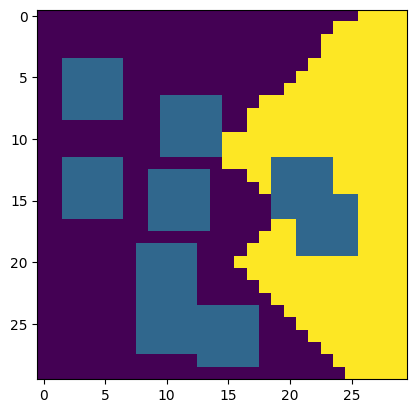

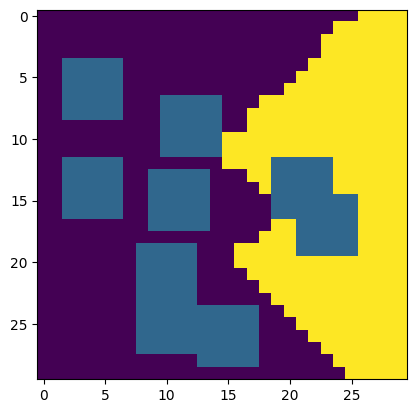

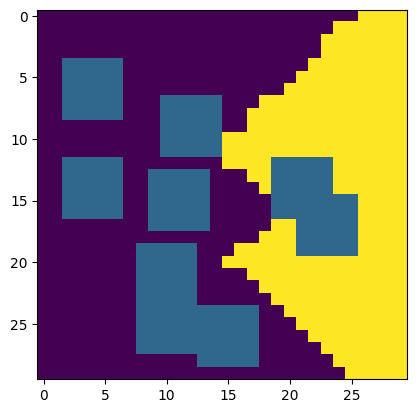

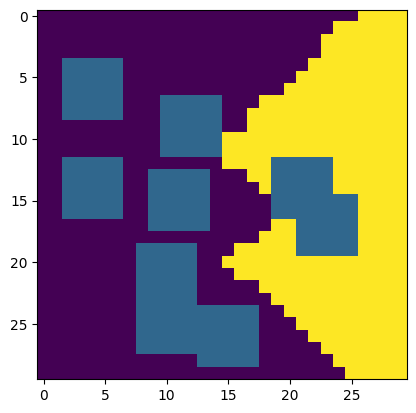

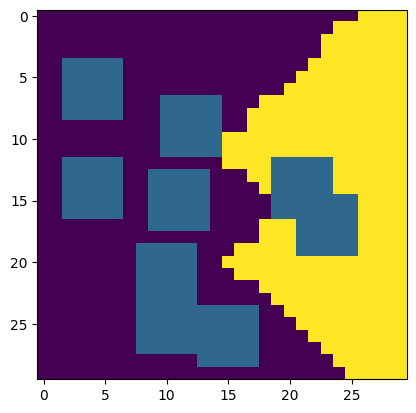

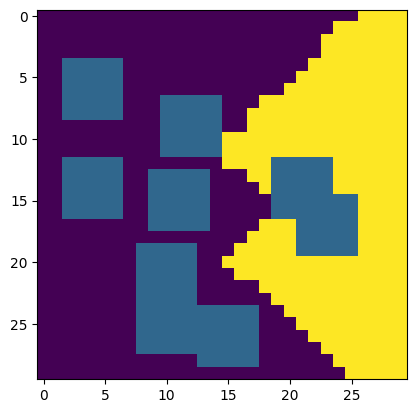

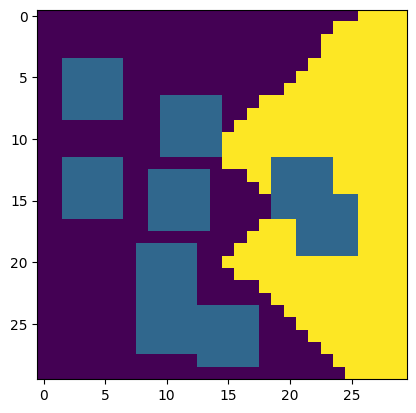

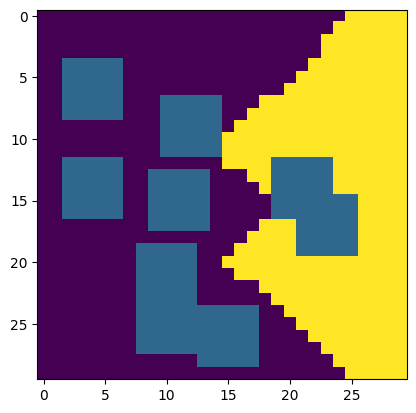

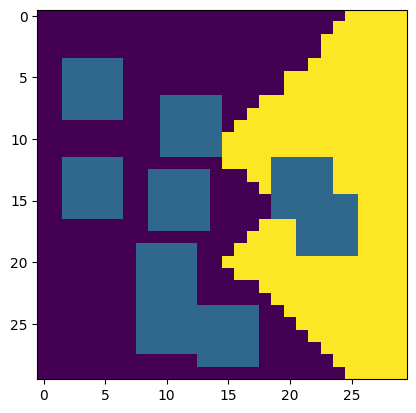

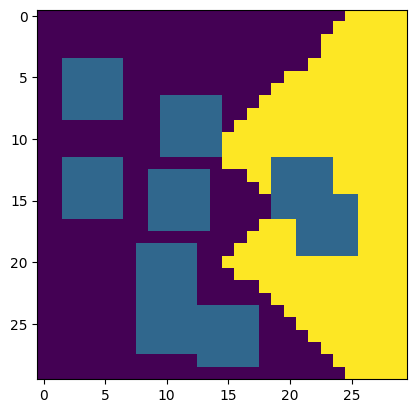

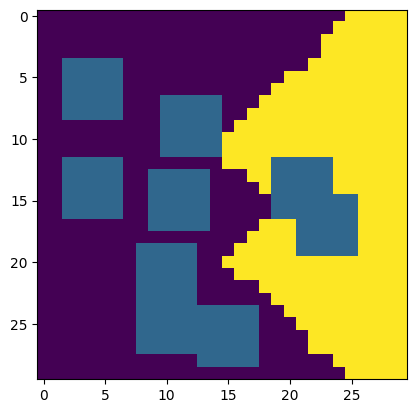

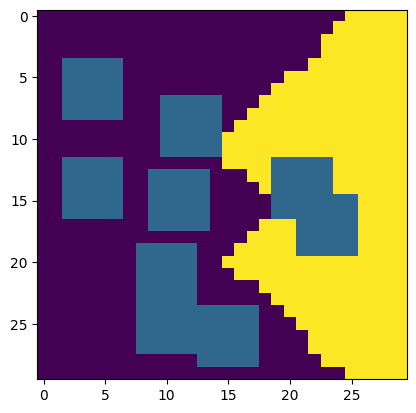

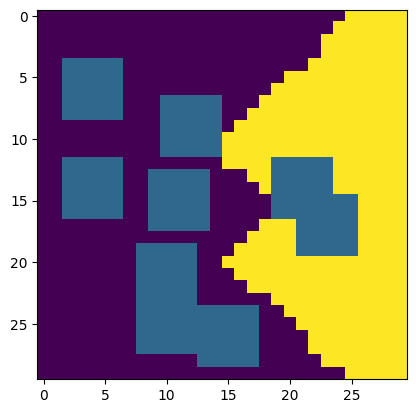

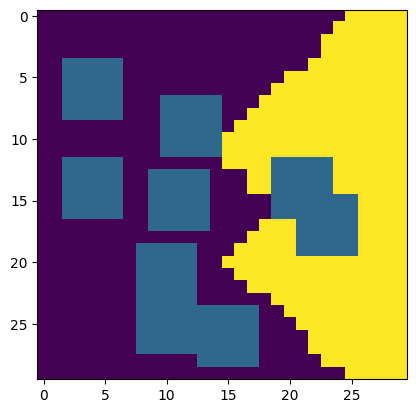

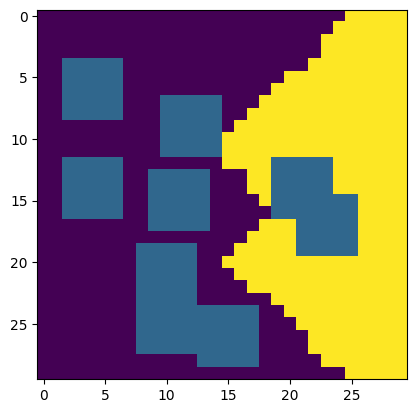

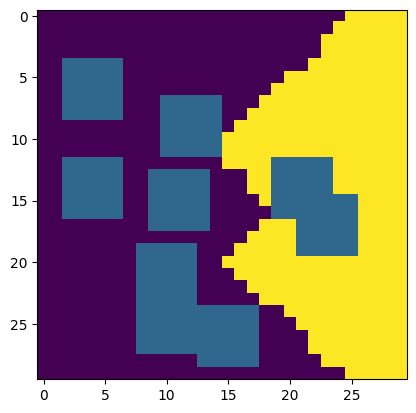

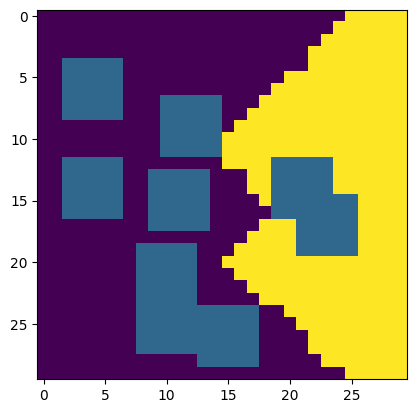

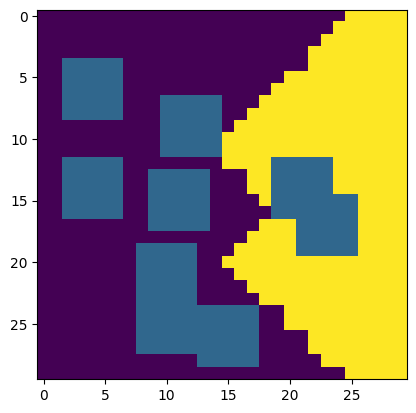

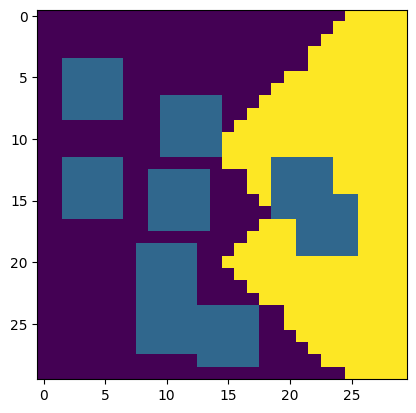

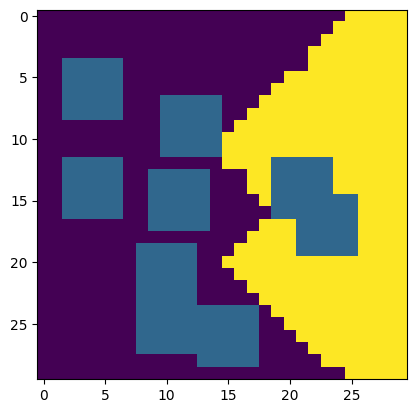

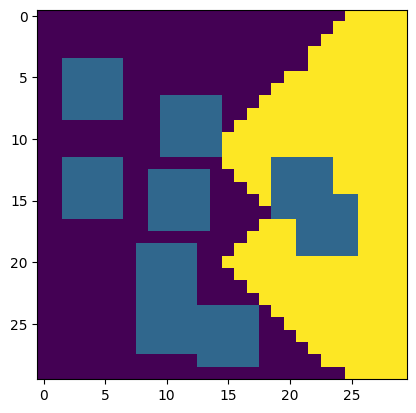

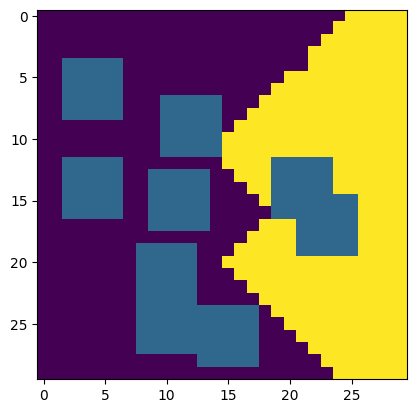

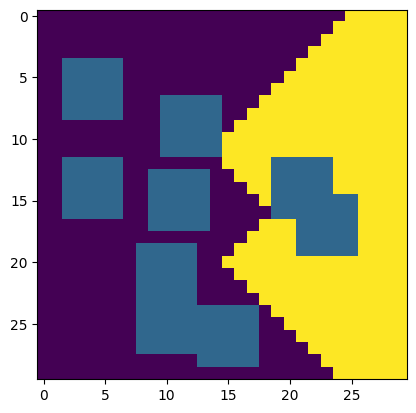

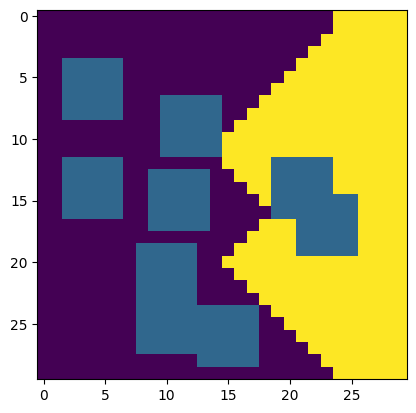

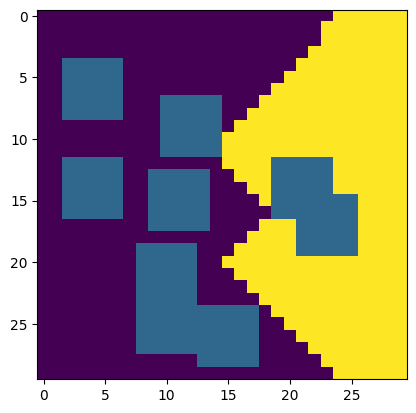

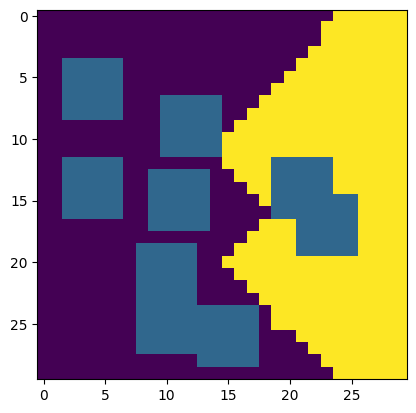

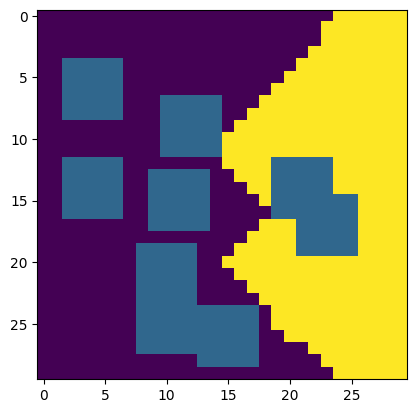

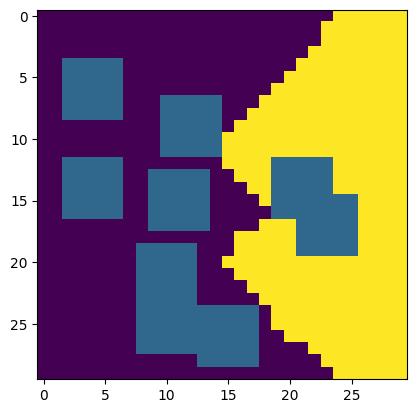

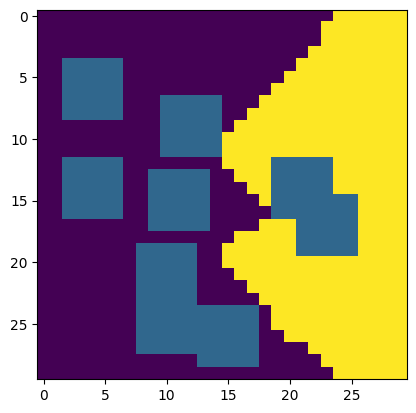

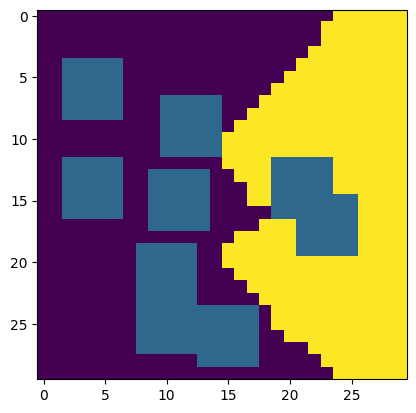

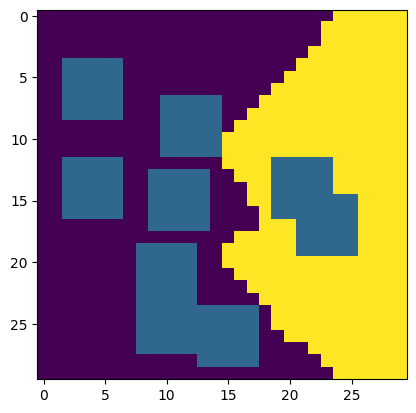

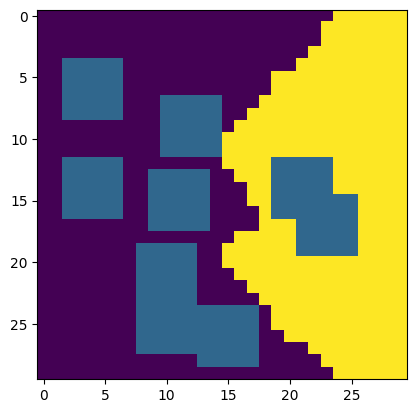

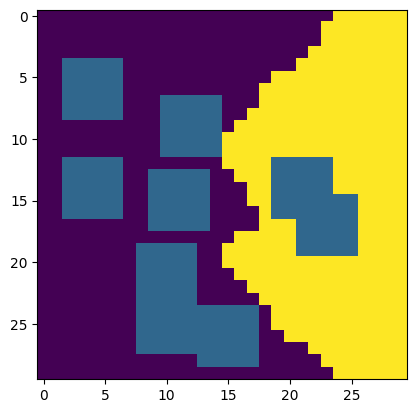

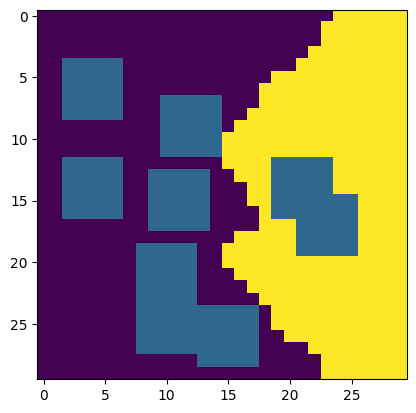

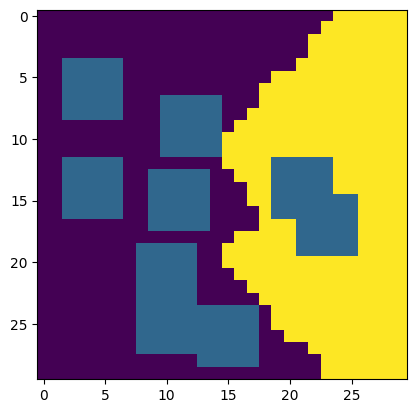

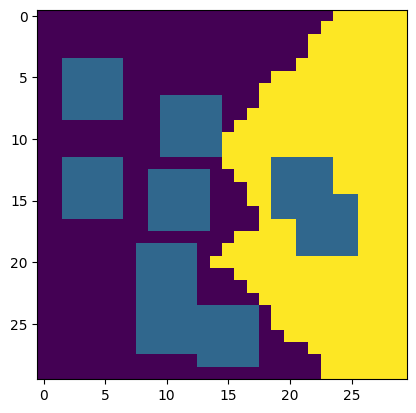

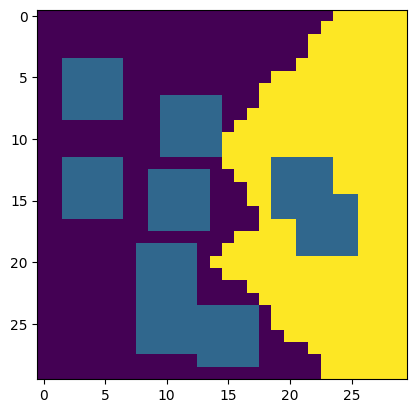

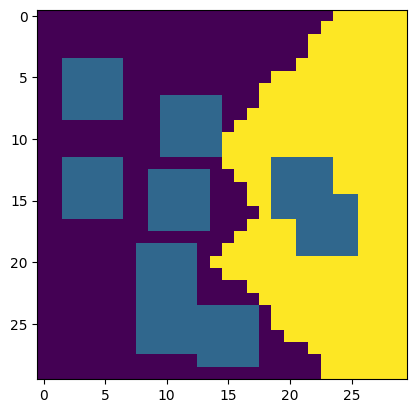

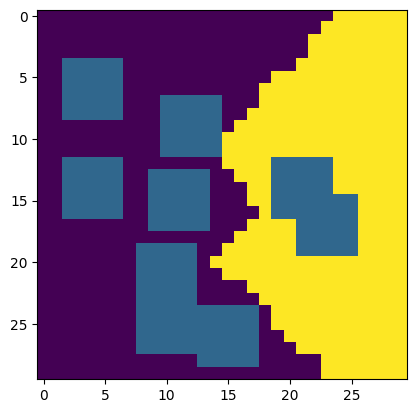

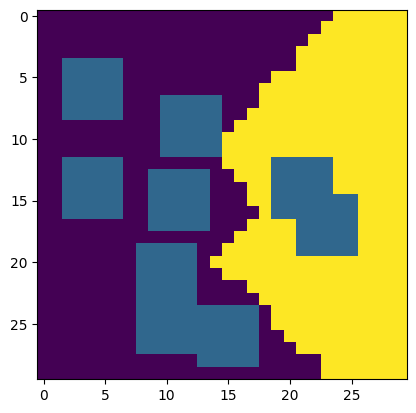

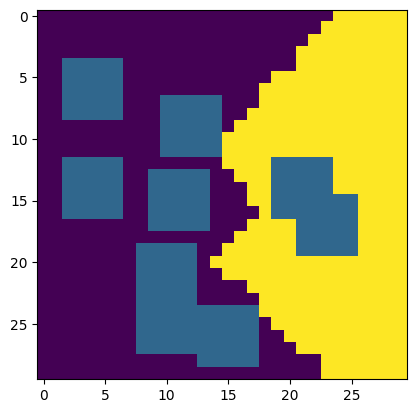

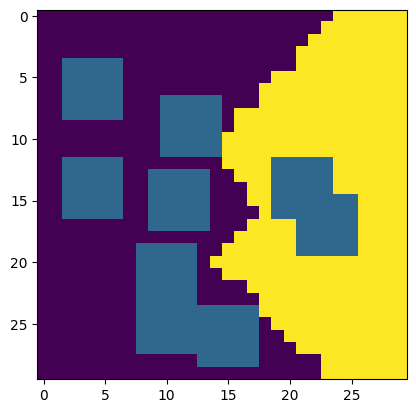

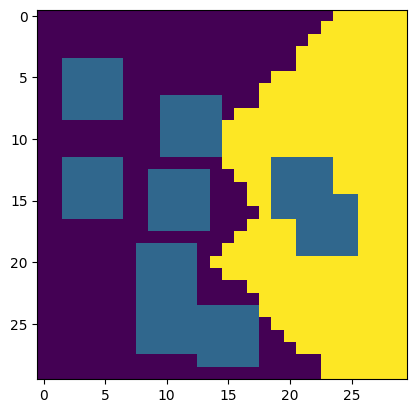

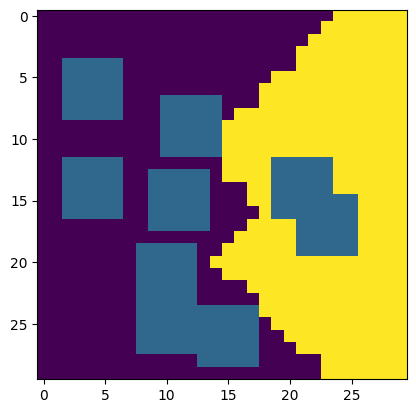

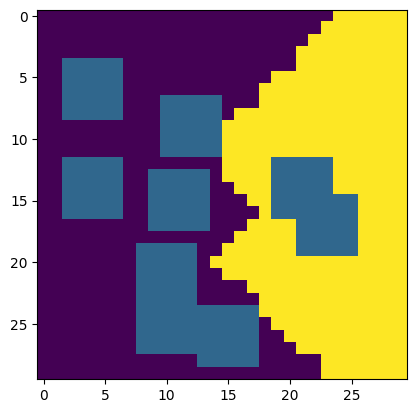

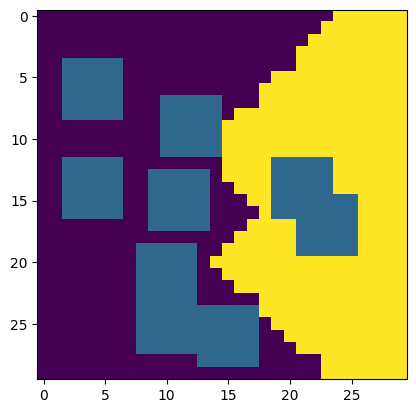

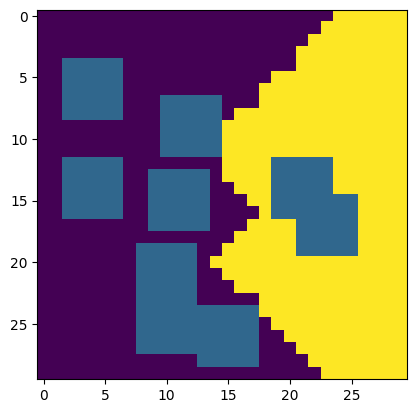

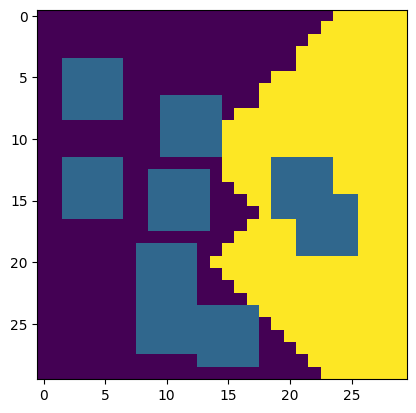

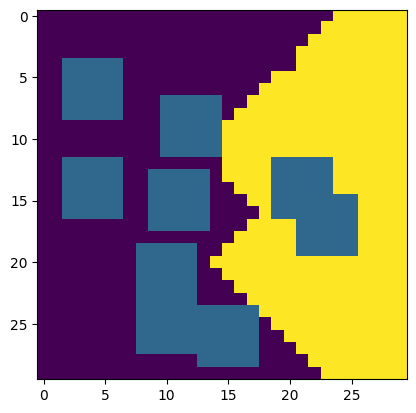

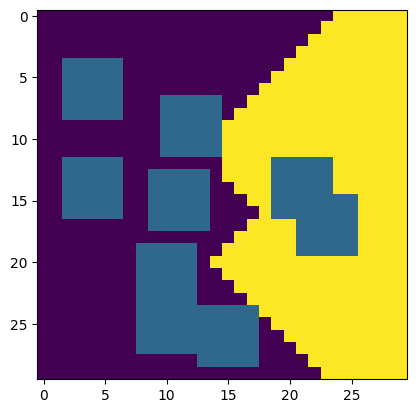

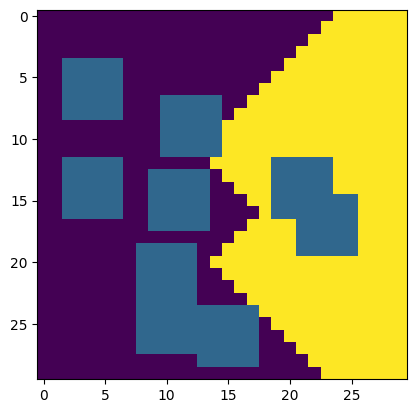

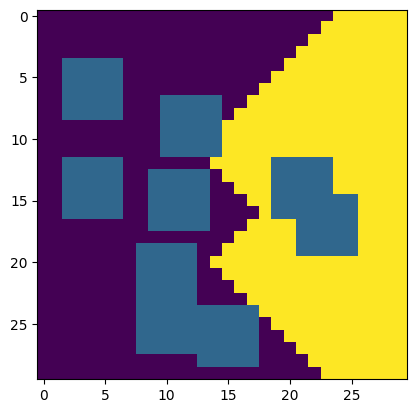

In [9]:
def VI(env, x_I, x_G, f, k):
    
    states_dict = {0: "up", 1: "left", 2: "down", 3: "right"}
    
    df = pd.DataFrame(columns=["Coordinate", "Policy"])
    
    for _ in range(20):
    
        if f:
            count = 0
            
            d = {x_G: (x_G, 0)}
            new_d = d.copy()
            G = [(x_G, (x_G, 0))]
            G_old = []
            
            maps = env.copy()
            np.place(maps, maps < 1, np.inf)
            maps[list(x_G)[0]][list(x_G)[1]] = 0
            
            f = False
        
        else:
            k += 1
            new_d = dict(set(d.items()) ^ set(new_d.items())) # states for the next iteration
            
        if G_old == G: # convergence criterion
            return maps, df, returning(x_ini, goal, d)
        
        G_old = G.copy()
        
        for x_curr in new_d:
            
            for u_curr in action_space:
        
                x_new, T = transition_function(env, x_curr, u_curr)
                
                if T and x_new not in d and maps[x_new[0]][x_new[1]] != 0:
                    G.append((x_new, (x_curr, k)))
                    d[x_new] = (x_curr, k)
                    maps[x_new[0]][x_new[1]] = k + 1 # +1 because obstacles are already ==1
                    
                    
                    #df = criterion(u_curr, states_dict, df)
    
    return maps, df, returning(x_ini, goal, d)


def returning(x_ini, goal, G):
    s = x_ini # the first key
    if s in G:
        r = G[s][0] # the first value
        t = []
        cost = 0
    
        while True:
            for key, val in G.items():
                if s == goal:
                    t.append(r)
                    return t
                cost += 1
                t.append(s)
                s = r
                r = G[s][0]
    else:
        return list(G)

            
def final_env(environment, p):
    for i in p:
        final_map[i[0]][i[1]] = 3
        plt.imshow(final_map)
        plt.show()
    return final_map



data = np.load('data_ps3.npz')
environment = data['environment']

x_ini = (11,6)
goal = (15,29)

f = True
l = 1

new_maps, df, G = VI(environment, x_ini, goal, f, l)   

final_map = environment.copy()
final_plan = final_env(final_map, G)
    
plt.imshow(final_plan)

Due to the chosen algorithm of solving the problem, it is possible to construct a path to any of the yellow squares, because they are checked on collisions and evaluated. However, it is impossible to reach the goal state.

# Task 2

## Subtask 2 A

$$u^* = \pi_{VI}(x)$$

The possible option of obtaining the optimal policy here is while performing the initial VI algorithm, also fill a pandas DataFrame with the coordinates and directions for them. It is enough just to understand, which action has been performed and point a hypothetical arrow to the opposite side.

## Subtask 2 B

Here is added a function *criterion*, which is responsible for receiving an optimal policy. Here the polici is presented as a pandas DataFrame.

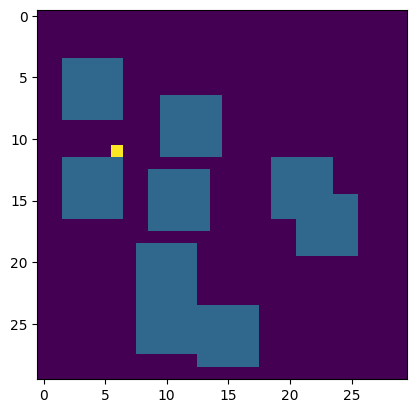

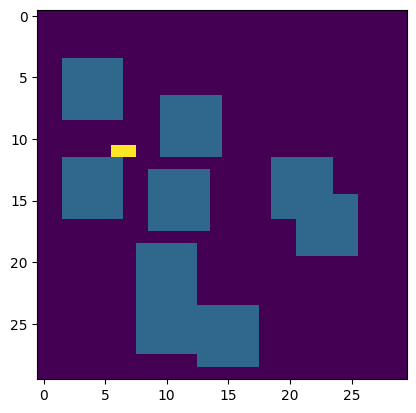

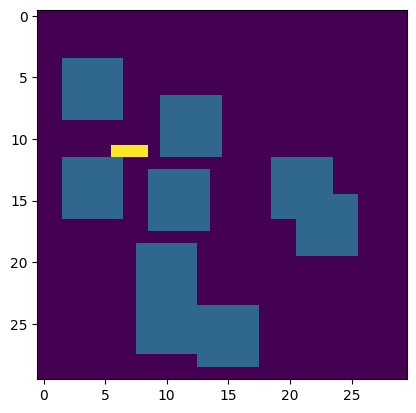

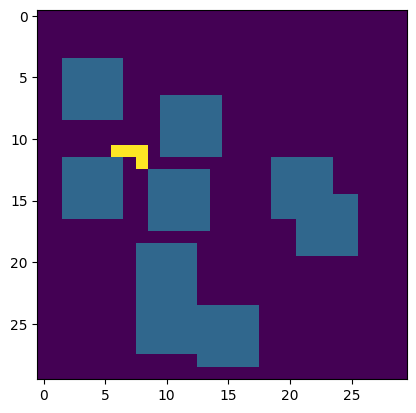

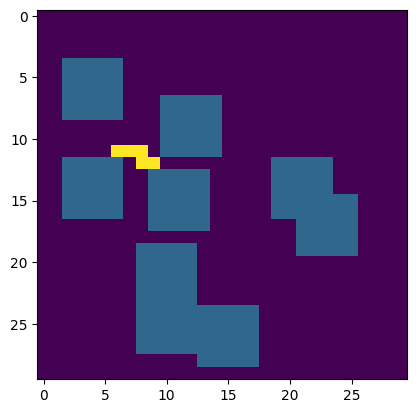

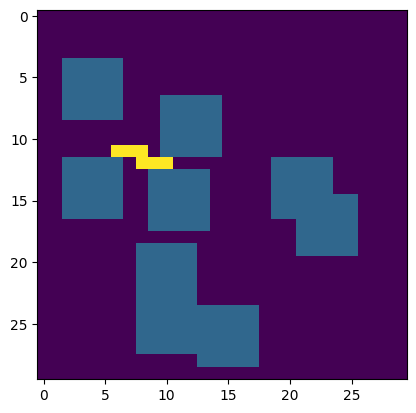

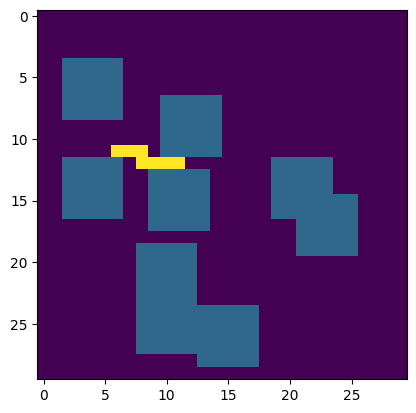

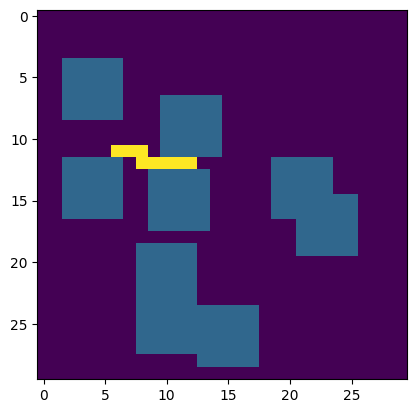

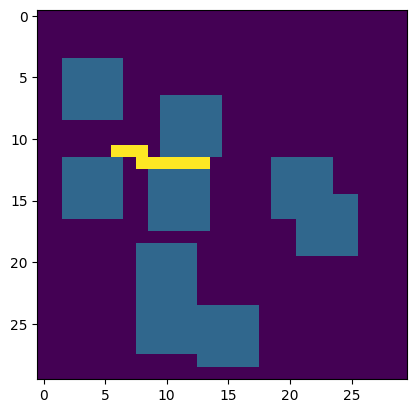

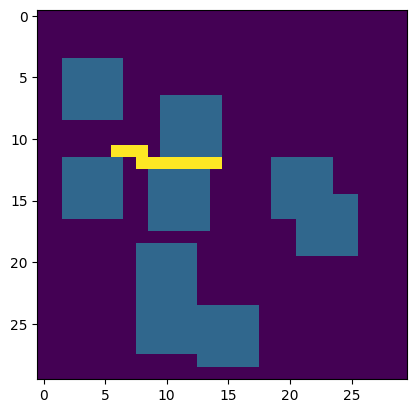

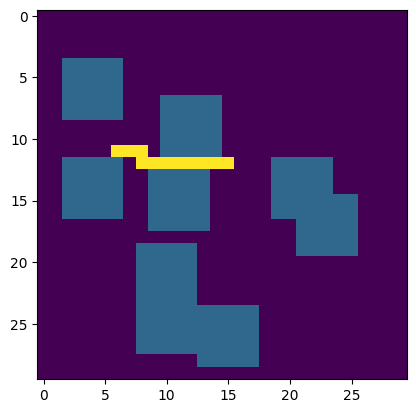

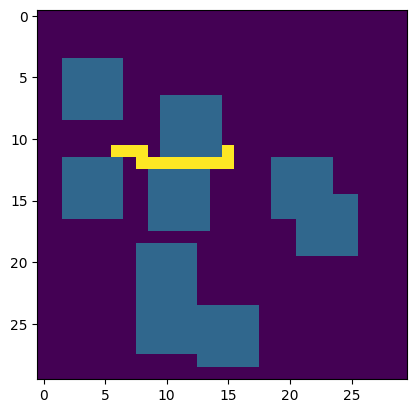

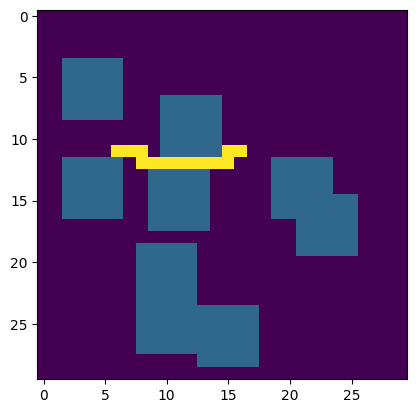

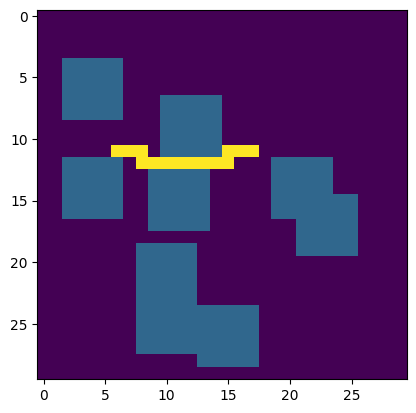

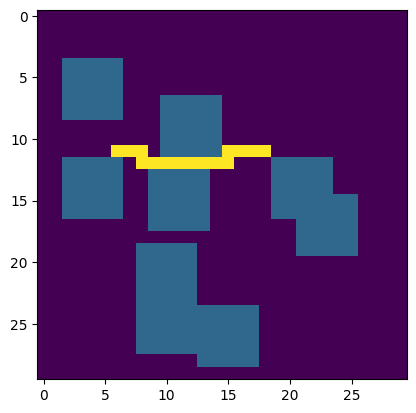

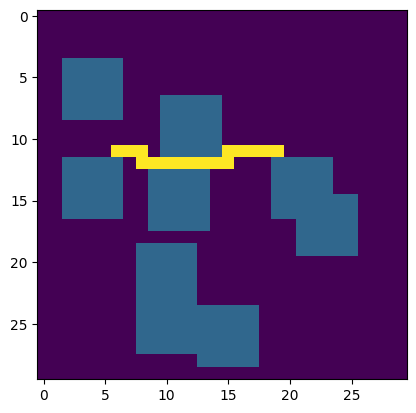

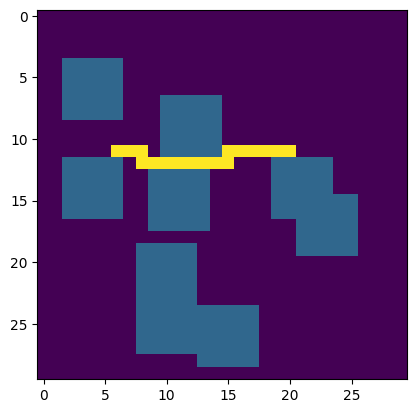

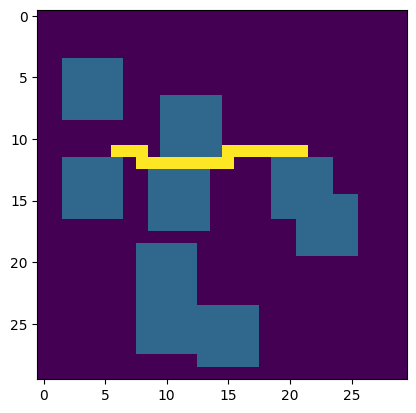

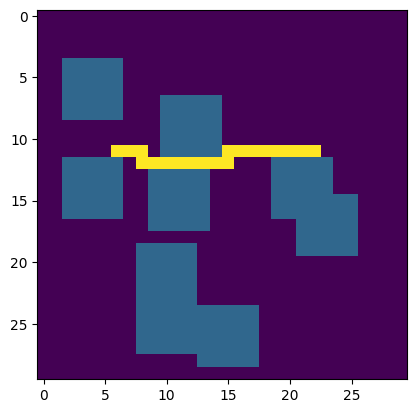

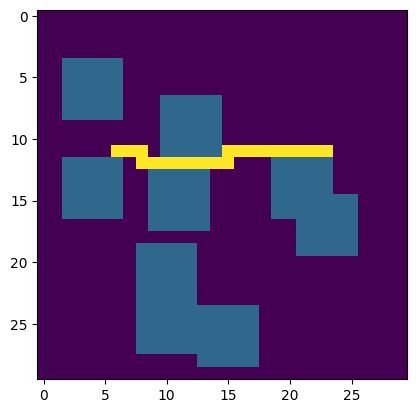

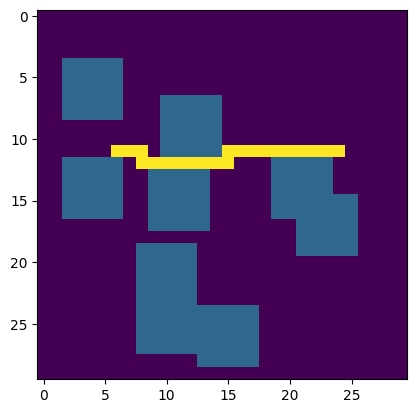

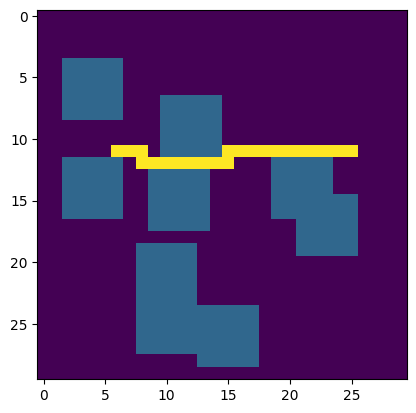

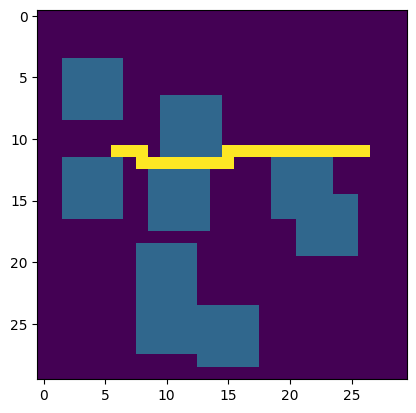

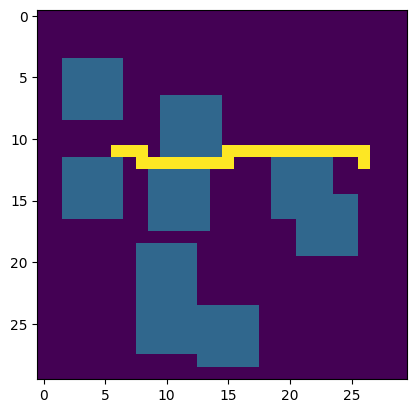

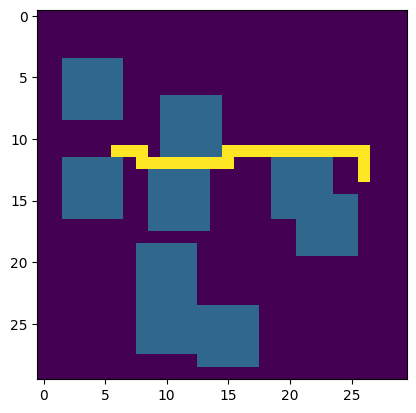

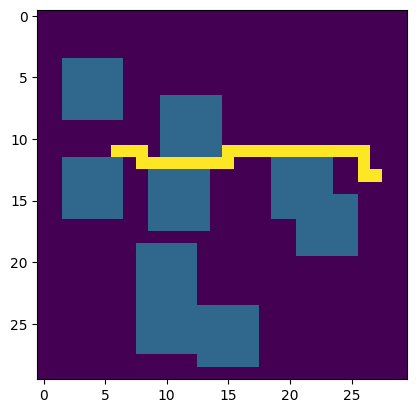

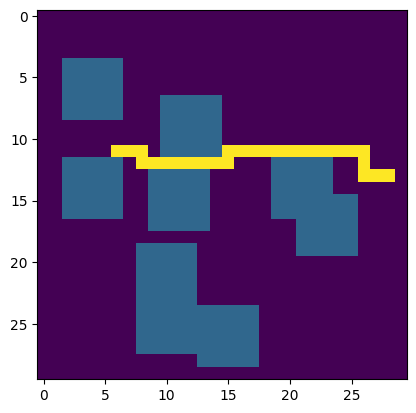

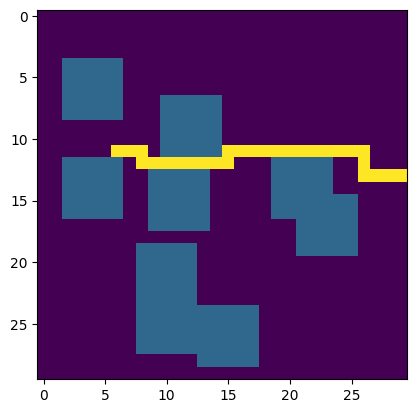

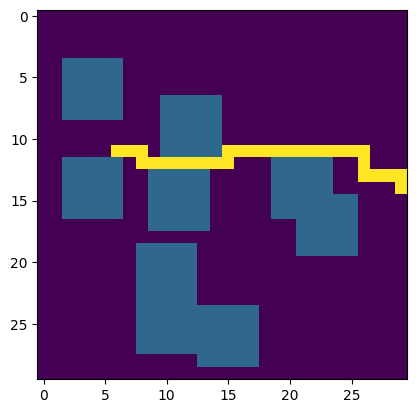

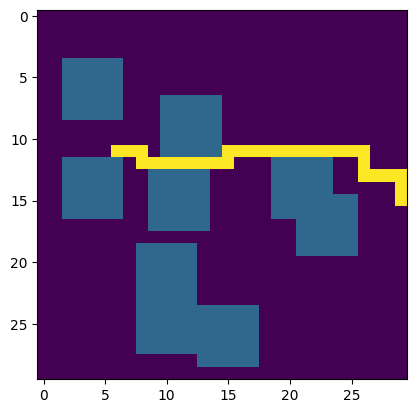

,Coordinate,Policy
0,"(14, 29)",down
1,"(15, 28)",right
2,"(16, 29)",up
3,"(16, 28)",right
4,"(17, 29)",up
...,...,...
680,"(0, 0)",right
681,"(26, 0)",up
682,"(27, 1)",down
683,"(28, 0)",right


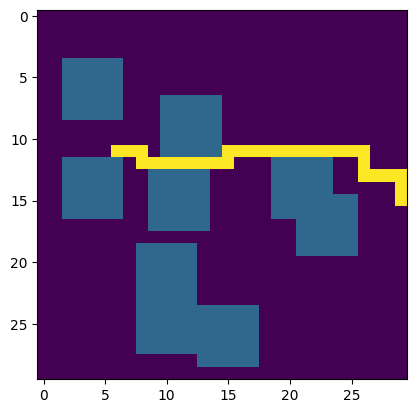

In [10]:
def criterion(x_new, u_curr, states_dict, df):
    h = action_space.index(u_curr)
          
    if h == 0:
        h = 2
    elif h == 1:
        h = 3
    elif h == 2:
        h = 0
    else:
        h = 1

    return pd.concat([df, pd.DataFrame([[x_new, states_dict[h]]], columns=df.columns)], ignore_index=True)


def VI(env, x_I, x_G, f, k):
    
    states_dict = {0: "up", 1: "left", 2: "down", 3: "right"}
    
    df = pd.DataFrame(columns=["Coordinate", "Policy"])
    
    while True:
    
        if f:
            count = 0
            
            d = {x_G: (x_G, 0)}
            new_d = d.copy()
            G = [(x_G, (x_G, 0))]
            G_old = []
            
            maps = env.copy()
            np.place(maps, maps < 1, np.inf)
            maps[list(x_G)[0]][list(x_G)[1]] = 0
            
            f = False
        
        else:
            k += 1
            new_d = dict(set(d.items()) ^ set(new_d.items())) # states for the next iteration
            
        if G_old == G: # convergence criterion
            return maps, returning(x_ini, goal, d), df
        
        G_old = G.copy()
        
        for x_curr in new_d:
            
            for u_curr in action_space:
        
                x_new, T = transition_function(env, x_curr, u_curr)
                
                if T and x_new not in d and maps[x_new[0]][x_new[1]] != 0:
                    G.append((x_new, (x_curr, k)))
                    d[x_new] = (x_curr, k)
                    maps[x_new[0]][x_new[1]] = k + 1 # +1 because obstacles are already ==1
                    
                    df = criterion(x_new, u_curr, states_dict, df)
    
    return maps, returning(x_ini, goal, d), df


def returning(x_ini, goal, G):
    s = x_ini # the first key
    if s in G:
        r = G[s][0] # the first value
        t = []
        cost = 0
    
        while True:
            for key, val in G.items():
                if s == goal:
                    t.append(r)
                    return t
                cost += 1
                t.append(s)
                s = r
                r = G[s][0]
    else:
        return list(G)

            
def final_env(environment, p):
    for i in p:
        final_map[i[0]][i[1]] = 3
        plt.imshow(final_map)
        plt.show()
    return final_map



data = np.load('data_ps3.npz')
environment = data['environment']

x_ini = (11,6)
goal = (15,29)

f = True
l = 1

new_maps, G, df = VI(environment, x_ini, goal, f, l)   

final_map = environment.copy()
final_plan = final_env(final_map, G)
    
plt.imshow(final_plan)


df

## Subtask 2 C

Due to the specific of the implementation, there is no changes in case, when the order of actions in *action_space* is changed.

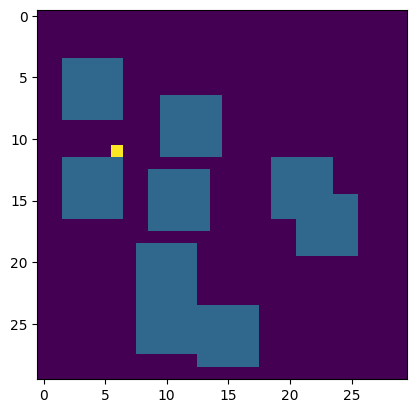

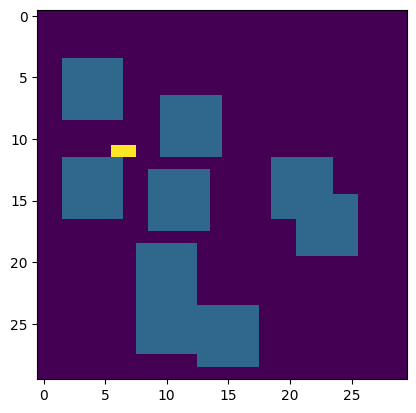

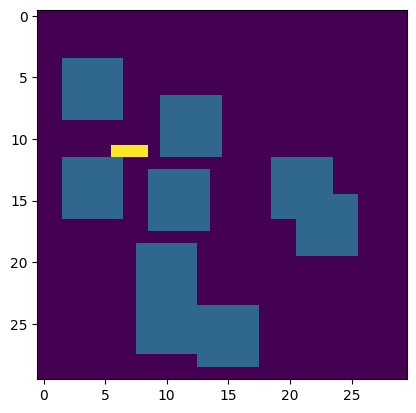

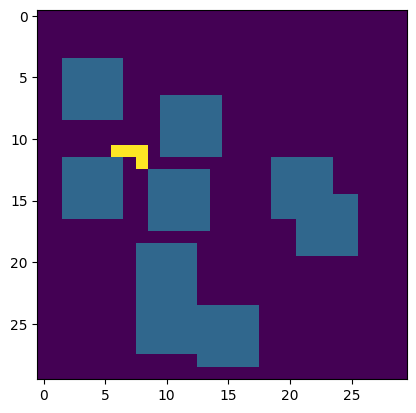

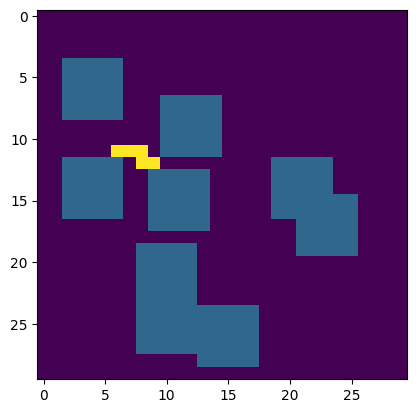

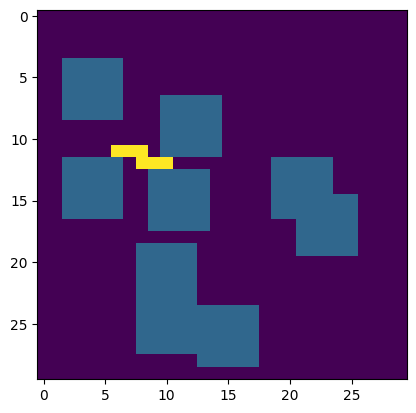

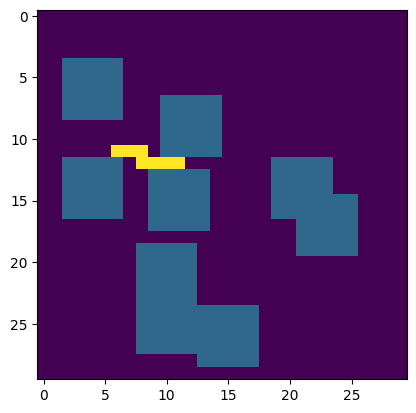

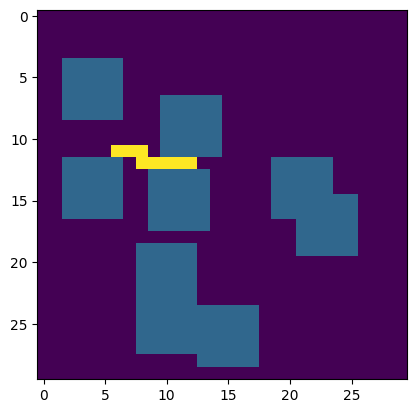

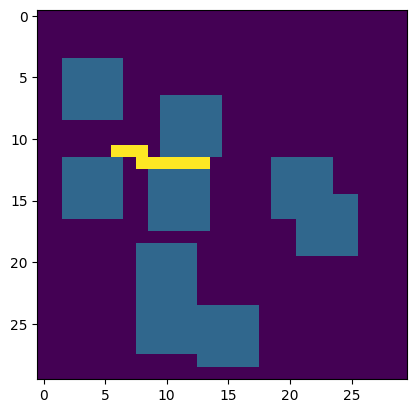

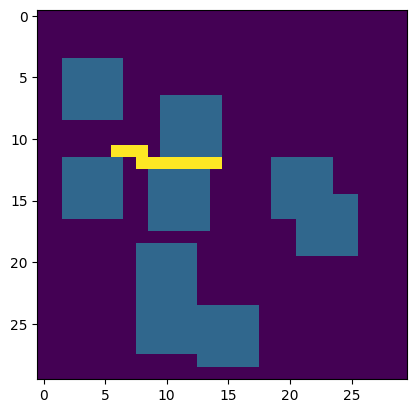

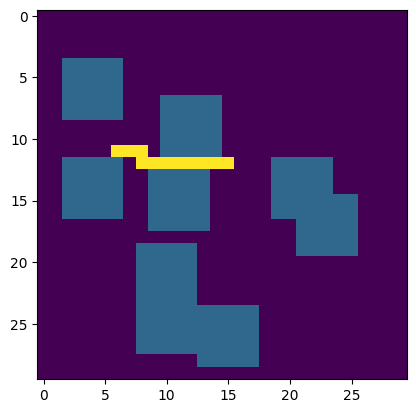

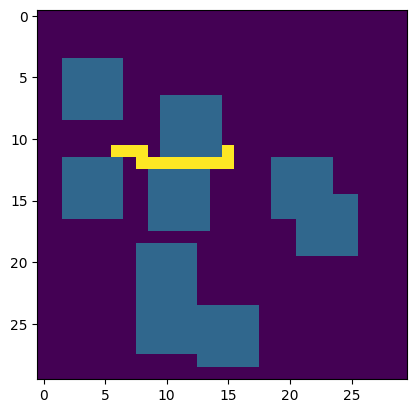

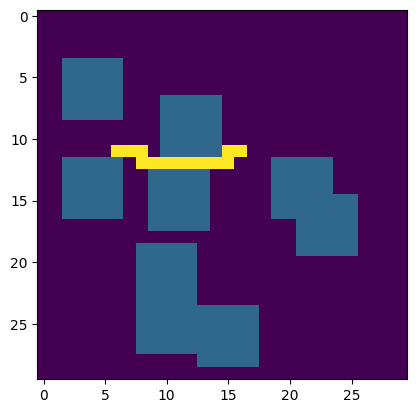

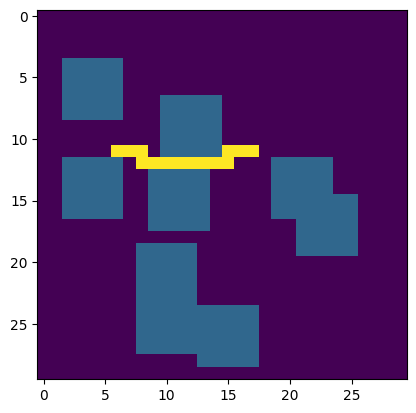

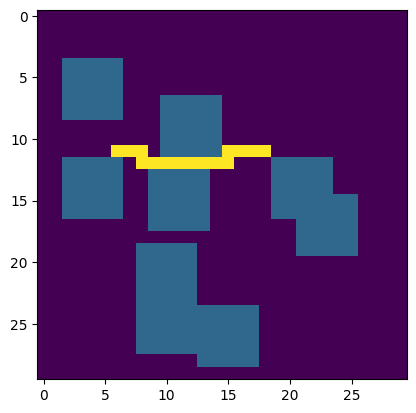

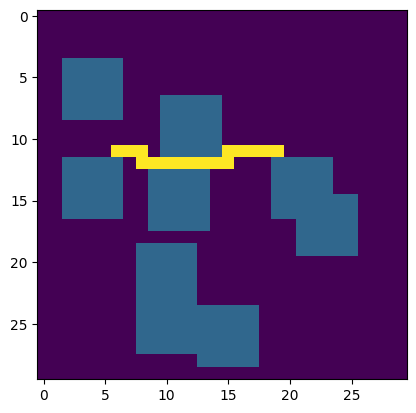

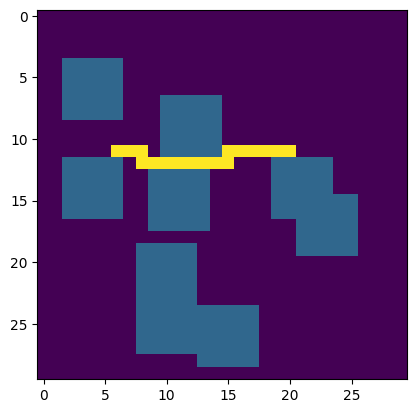

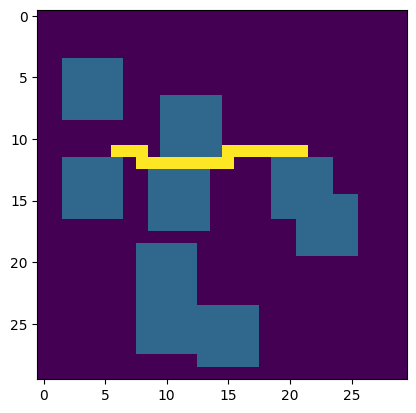

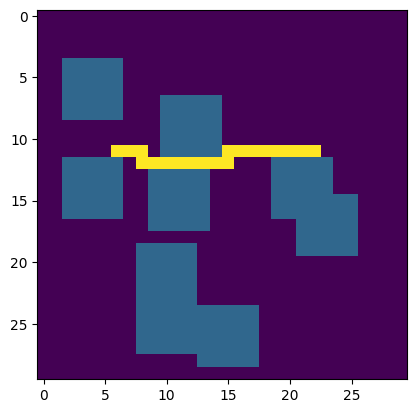

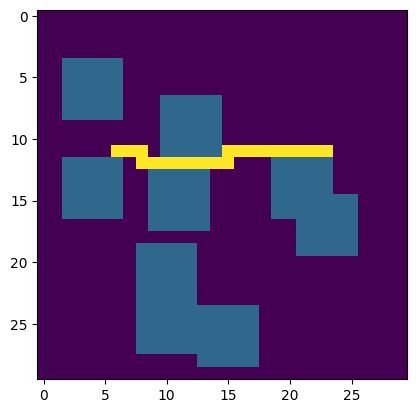

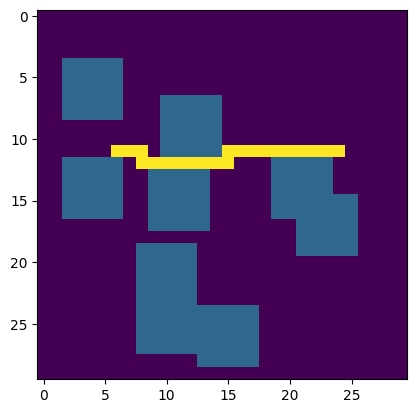

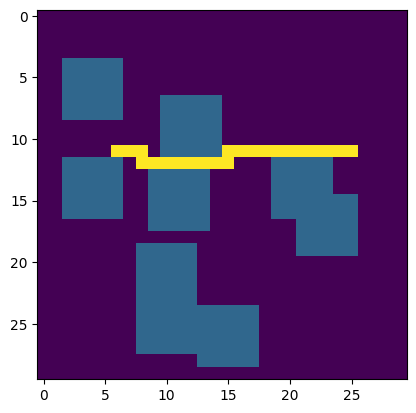

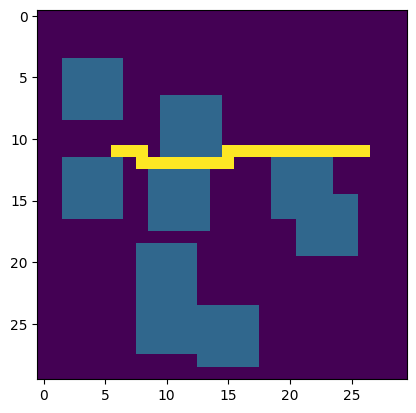

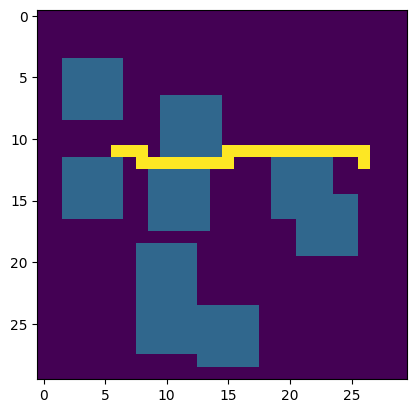

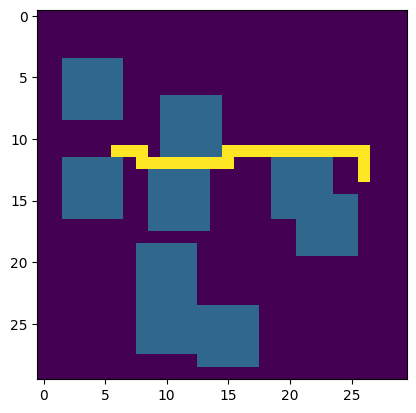

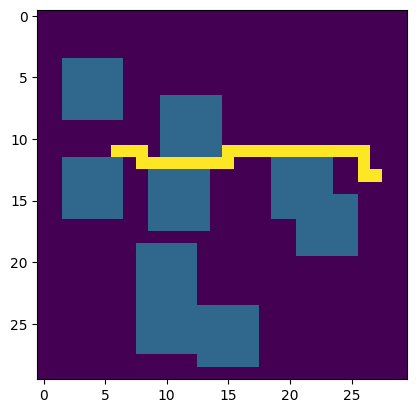

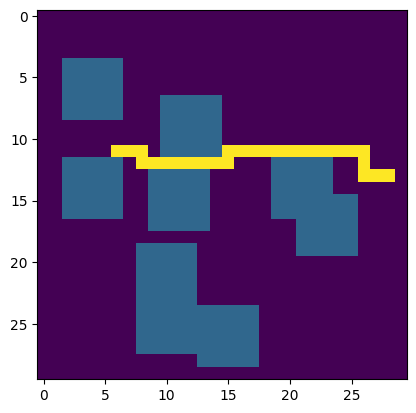

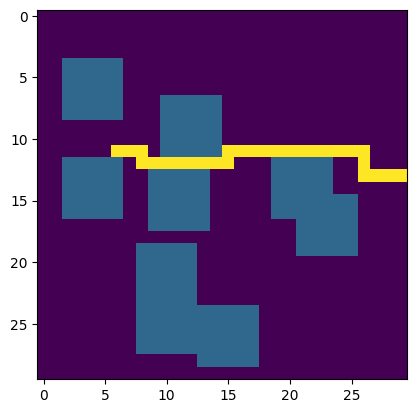

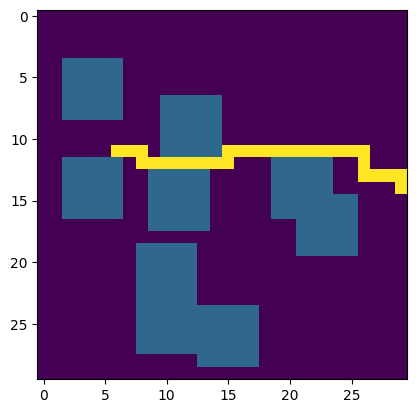

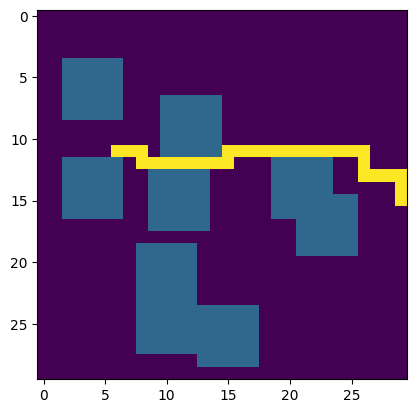

,Coordinate,Policy
0,"(0, 0)",down
1,"(0, 1)",down
2,"(0, 2)",down
3,"(0, 3)",down
4,"(0, 4)",down
...,...,...
681,"(29, 25)",right
682,"(29, 26)",right
683,"(29, 27)",right
684,"(29, 28)",right


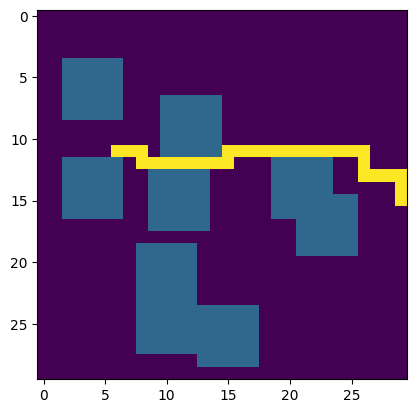

In [11]:
def VI(env, x_I, x_G, f, k):
    
    states_dict = {0: "up", 1: "left", 2: "down", 3: "right"}
    
    
    while True:
    
        if f:
            count = 0
            
            d = {x_G: (x_G, 0)}
            new_d = d.copy()
            G = [(x_G, (x_G, 0))]
            G_old = []
            
            maps = env.copy()
            np.place(maps, maps < 1, np.inf)
            maps[list(x_G)[0]][list(x_G)[1]] = 0
            
            f = False
        
        else:
            k += 1
            new_d = dict(set(d.items()) ^ set(new_d.items())) # states for the next iteration
            
        if G_old == G: # convergence criterion
            return maps, returning(x_ini, goal, d)
        
        G_old = G.copy()
        
        for x_curr in new_d:
            
            for u_curr in action_space:
        
                x_new, T = transition_function(env, x_curr, u_curr)
                
                if T and x_new not in d and maps[x_new[0]][x_new[1]] != 0:
                    G.append((x_new, (x_curr, k)))
                    d[x_new] = (x_curr, k)
                    maps[x_new[0]][x_new[1]] = k + 1 # +1 because obstacles are already ==1
                    
    
    return maps, returning(x_ini, goal, d)


def returning(x_ini, goal, G):
    s = x_ini # the first key
    if s in G:
        r = G[s][0] # the first value
        t = []
        cost = 0
    
        while True:
            for key, val in G.items():
                if s == goal:
                    t.append(r)
                    return t
                cost += 1
                t.append(s)
                s = r
                r = G[s][0]
    else:
        return list(G)

            
def final_env(environment, p):
    for i in p:
        final_map[i[0]][i[1]] = 3
        plt.imshow(final_map)
        plt.show()
    return final_map



data = np.load('data_ps3.npz')
environment = data['environment']
action_space = []
action_space.append((-1,0))
action_space.append((0,-1))
action_space.append((0,1))
action_space.append((1,0))


x_ini = (11,6)
goal = (15,29)

f = True
l = 1

new_maps, G = VI(environment, x_ini, goal, f, l)   

final_map = environment.copy()
final_plan = final_env(final_map, G)
    
plt.imshow(final_plan)



def policy(env, new_maps):
    
    d = {action_space[0]: "up", action_space[1]: "left", action_space[2]: "down", action_space[3]: "right"}
    
    df = pd.DataFrame(columns=["Coordinate", "Policy"])
    
    for i in range(new_maps.shape[0]): # rows
        for j in range(new_maps.shape[1]): # columns
            for u in action_space:
                x = tuple(np.array((i, j)) - np.array(u))
                if new_maps[i][j] != 1 and state_consistency_check(env, x):
                    if d[u] == "up":
                        s = "down"
                    elif d[u] == "down":
                        s = "up"
                    elif d[u] == "left":
                        s = "right"  
                    else:
                        s = "left"
                        
                    df = pd.concat([df, pd.DataFrame([[(i, j), s]], columns=df.columns)], ignore_index=True)
                    break
                    
    return df

df = policy(environment, new_maps)
df

# Task 3

## Subtask 3 A

$$v_{*}(x) = \max_{u \in \mathcal{U}(x)} \sum_{x',r} p(x',r|x,u) \left[ r + \gamma v_*(x')  \right]$$

## Subtask 3 B

$$u^*(x) = \max_{u} \pi_{MDP}(x,u)$$